# Set-up and pre-processing

In [1]:
##Import Libraries

#General Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import scipy

#Preprocessing Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.decomposition import PCA
from sklearn.utils.fixes import loguniform
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTENC

#Model Libraries
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
#Evaluation Metrics Libraries
from sklearn.metrics import roc_curve 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve
import sklearn.metrics as metrics

#Define the universal parameters
random_state = 14
cache_size = 3000
cv = StratifiedKFold(n_splits = 10, random_state = random_state, shuffle = True)
verbose = 0

#Load data from .csv file into Pandas dataframe
data = pd.read_csv("heart_data.csv")
data.info()
print("\nThe dataset contains", data.shape[0], "samples with", data.shape[1], "attributes\n")
print("This dataset contains {} missing values\n".format(data.isnull().sum().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  class     297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 32.6 KB

The dataset contains 297 samples with 14 attributes

This dataset contains 0 missing values



In [2]:
#Calculate descriptive statistics on dataset
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


<Figure size 1440x1440 with 0 Axes>

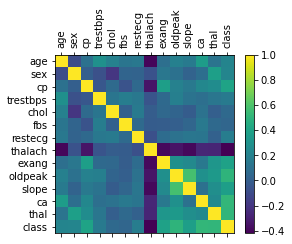

In [3]:
plt.figure(figsize = (20,20))
plt.matshow(data.corr())
plt.xticks(range(data.shape[1]), data.columns, fontsize = 10, rotation = 90)
plt.yticks(range(data.shape[1]), data.columns, fontsize = 10)
#plt.title('Correlation Matrix', fontsize = 12)
colorbar = plt.colorbar(shrink = 0.8)
colorbar.ax.tick_params(labelsize = 10)
plt.savefig('corr_matrix.png', bbox_inches = 'tight', dpi = 150)

In [4]:
#Feature encoding
#First the placeholder values in each column are replaced with the original names
data['cp'] = data['cp'].replace(1, 'typical_angina')
data['cp'] = data['cp'].replace(2, 'atypical_angina')
data['cp'] = data['cp'].replace(3, 'non_anginal_pain')
data['cp'] = data['cp'].replace(4, 'asymptomatic')
data['restecg'] = data['restecg'].replace(0, 'normal')
data['restecg'] = data['restecg'].replace(1, 'ST-T_wave_abnormality')
data['restecg'] = data['restecg'].replace(2, 'left_ventricular_hypertrophy')
data['slope'] = data['slope'].replace(1, 'up')
data['slope'] = data['slope'].replace(2, 'flat')
data['slope'] = data['slope'].replace(3, 'down')
data['thal'] = data['thal'].replace(3, 'normal')
data['thal'] = data['thal'].replace(6, 'fixed_defect')
data['thal'] = data['thal'].replace(7, 'reversable_defect')

print("Original features:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))

Original features:
 ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'class'] 

Features after get_dummies:
 ['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'ca', 'class', 'cp_asymptomatic', 'cp_atypical_angina', 'cp_non_anginal_pain', 'cp_typical_angina', 'restecg_ST-T_wave_abnormality', 'restecg_left_ventricular_hypertrophy', 'restecg_normal', 'slope_down', 'slope_flat', 'slope_up', 'thal_fixed_defect', 'thal_normal', 'thal_reversable_defect']


In [5]:
#Duplicate the dataset into binary and multi-class variants
data_multiclass = data_dummies.copy()
data_binary = data_dummies.copy()

#Summarize all nonzero values in column 'class' as 1 in data_binary
data_binary.loc[data_binary['class'] != 0, 'class'] = 1
data_binary.loc[data_binary['class'] == 0, 'class'] = 0

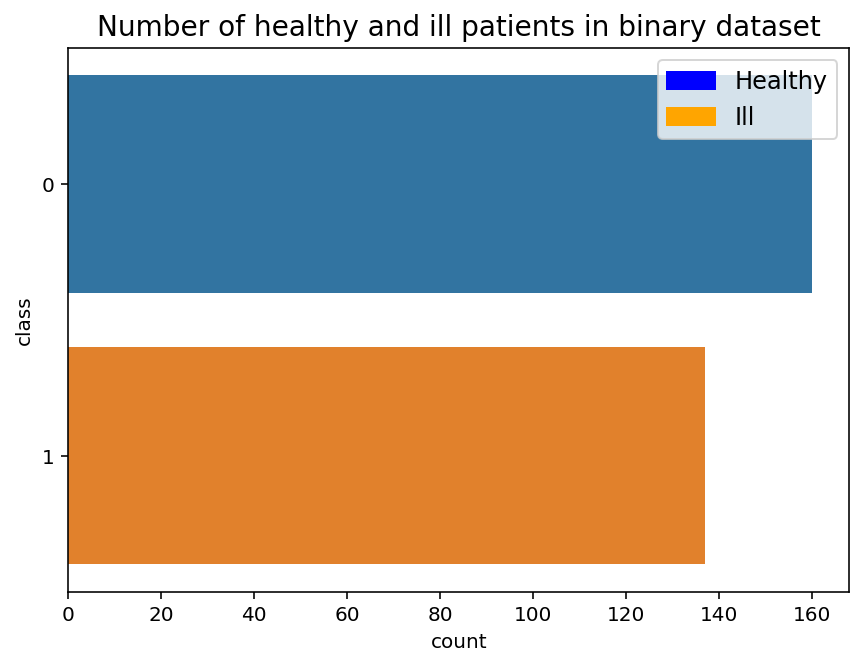

In [6]:
%config InlineBackend.figure_formats = set(['retina'])
#Visualize healthy vs. ill patients in binary dataset
blue_patch = mpatches.Patch(color = 'blue', label = 'Healthy')
orange_patch = mpatches.Patch(color = 'orange', label = 'Ill')
plt.figure(figsize=(7,5))
sns.countplot(y=data_binary['class'], data = data_binary)
plt.title("Number of healthy and ill patients in binary dataset", size = 14)
plt.legend(handles = [blue_patch, orange_patch], loc="best", fontsize = 12)
plt.savefig('dataset_distro_bin.png', bbox_inches = 'tight', dpi = 150)

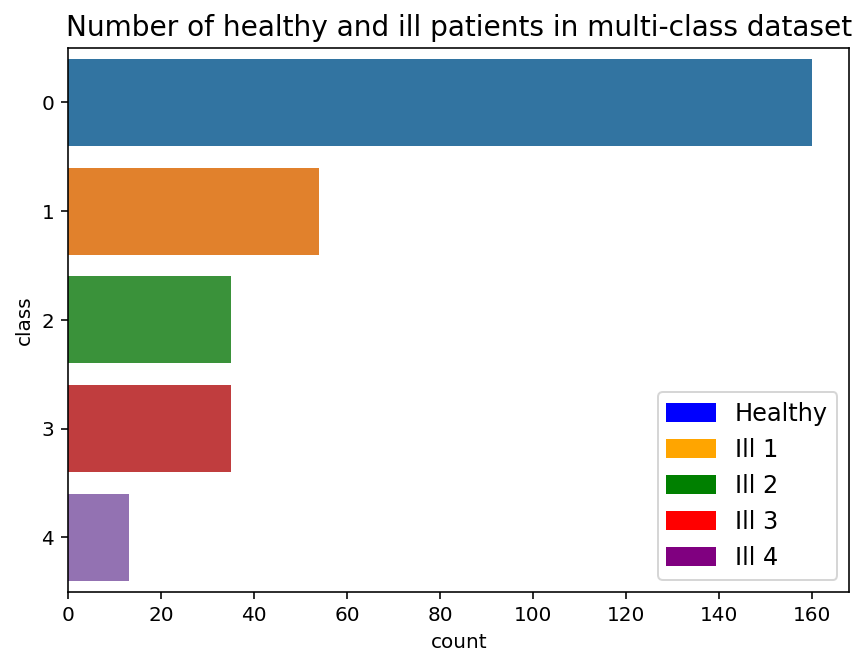

In [7]:
%config InlineBackend.figure_formats = set(['retina'])
#Visualize healthy vs. ill patients in multi-class dataset
blue_patch = mpatches.Patch(color = 'blue', label = 'Healthy')
orange_patch = mpatches.Patch(color = 'orange', label = 'Ill 1')
green_patch = mpatches.Patch(color = 'green', label = 'Ill 2')
red_patch = mpatches.Patch(color = 'red', label = 'Ill 3')
purple_patch = mpatches.Patch(color = 'purple', label = 'Ill 4')
class_balance_mc = plt.figure(figsize=(7,5))
sns.countplot(y=data_multiclass['class'], data = data_multiclass)
plt.title("Number of healthy and ill patients in multi-class dataset", size = 14)
plt.legend(handles = [blue_patch, orange_patch, green_patch, red_patch, purple_patch], loc="best", fontsize = 12)
plt.savefig('dataset_distro_multi.png', bbox_inches = 'tight', dpi = 150)

In [8]:
#Total number of healthy and ill patients in binary dataset
num_healthy_bin = len(data_binary[data_binary['class']==0])
num_ill_bin = len(data_binary[data_binary['class'] ==1])
#Percentage of healthy and ill patients in binary dataset
perc_healthy_bin = num_healthy_bin/len(data_binary['class'])*100
perc_ill_bin = num_ill_bin/len(data_binary['class'])*100

#Total number of healthy and ill patients in multi-class dataset
num_healthy_mul = len(data_multiclass[data_multiclass['class']==0])
num_ill_mul = len(data_multiclass[data_multiclass['class']!=0])
#Percentage of healthy and ill patients in multi-class dataset
perc_healthy_mul = num_healthy_mul/len(data_multiclass['class'])*100
perc_ill_mul = num_ill_mul/len(data_multiclass['class'])*100

print("The binary classification dataset contains {:.2f}% healthy and {:.2f}% ill patients".format(perc_healthy_bin, perc_ill_bin))
print("\nThe multi-class classification dataset contains {:.2f}% healthy and {:.2f}% ill patients".format(perc_healthy_mul,perc_ill_mul))

if perc_healthy_bin == perc_healthy_mul and perc_ill_bin == perc_ill_mul:
        print("\nSplitting the dataset into a binary classification and multi-class classification dataset has not distorted the data")
else:
    print("\nSplitting the data into a binary classification and multi-class classification dataset has somehow distorted the data")

The binary classification dataset contains 53.87% healthy and 46.13% ill patients

The multi-class classification dataset contains 53.87% healthy and 46.13% ill patients

Splitting the dataset into a binary classification and multi-class classification dataset has not distorted the data


In [9]:
#Create testing, training and validation datasets
train_ratio = 0.7
valid_ratio = 0.1
test_ratio = 0.2

heart_data_bin = data_binary.drop(['class'], axis = 1)
heart_target_bin = data_binary['class']

heart_data_mul = data_multiclass.drop(['class'], axis = 1)
heart_target_mul = data_multiclass['class']

#Split data into train+validation set and test set
x_trainval_bin, x_test_bin, y_trainval_bin, y_test_bin = train_test_split(heart_data_bin, heart_target_bin, test_size = 1 - train_ratio, stratify = heart_target_bin, random_state = random_state)
#Split train+validation set into training set and validation set
x_train_bin, x_valid_bin, y_train_bin, y_valid_bin = train_test_split(x_trainval_bin, y_trainval_bin, test_size = test_ratio/(test_ratio + valid_ratio), stratify = y_trainval_bin, random_state = random_state)
#Converting y_ datasets to pd.DataFrame
y_test_bin_df = pd.DataFrame(y_test_bin)
y_trainval_bin_df = pd.DataFrame(y_trainval_bin)

#Multi-class dataset
#Split data into train+validation set and test set
x_trainval_mul, x_test_mul, y_trainval_mul, y_test_mul = train_test_split(heart_data_mul, heart_target_mul, test_size = 1 - train_ratio, stratify = heart_target_mul, random_state = random_state)
#Split train+validation set into training set and validation set
x_train_mul, x_valid_mul, y_train_mul, y_valid_mul = train_test_split(x_trainval_mul, y_trainval_mul, test_size = test_ratio/(test_ratio + valid_ratio), stratify = y_trainval_mul, random_state = random_state)
#Converting y_ datasets to pd.DataFrame
y_test_mul_df = pd.DataFrame(y_test_mul)
y_trainval_mul_df = pd.DataFrame(y_trainval_mul)

In [10]:
minmax = MinMaxScaler()

#Binary Classification Dataset
x_test_bin_norm = minmax.fit_transform(x_test_bin)
x_train_bin_norm = minmax.fit_transform(x_train_bin)
x_valid_bin_norm = minmax.fit_transform(x_valid_bin)
x_trainval_bin_norm = minmax.fit_transform(x_trainval_bin)

#Multi-class Classification Dataset
x_test_mul_norm = minmax.fit_transform(x_test_mul)
x_train_mul_norm = minmax.fit_transform(x_train_mul)
x_valid_mul_norm = minmax.fit_transform(x_valid_mul)
x_trainval_mul_norm = minmax.fit_transform(x_trainval_mul)
#Converting x_ datasets into pd.DataFrames
x_trainval_mul_norm_df = pd.DataFrame(x_trainval_mul_norm)

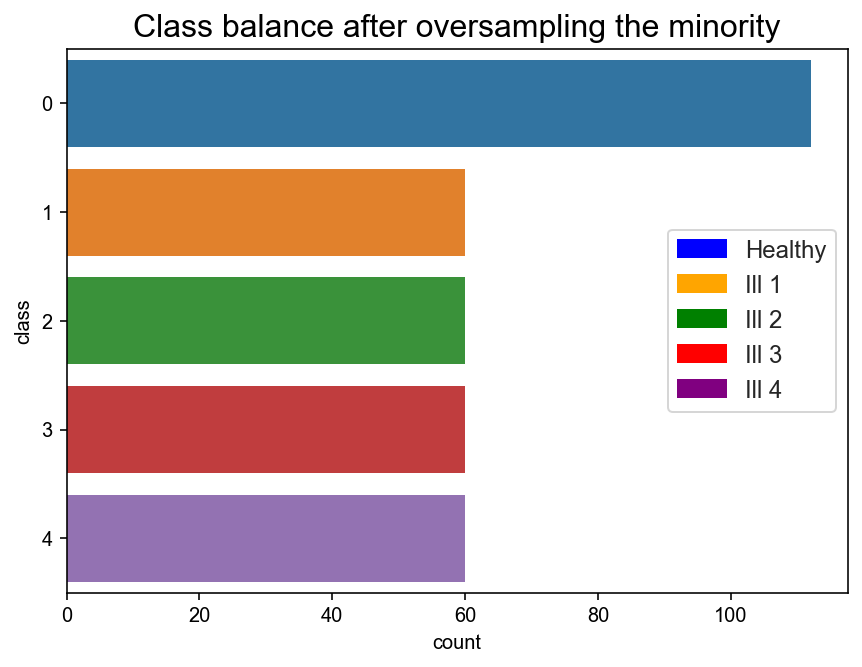

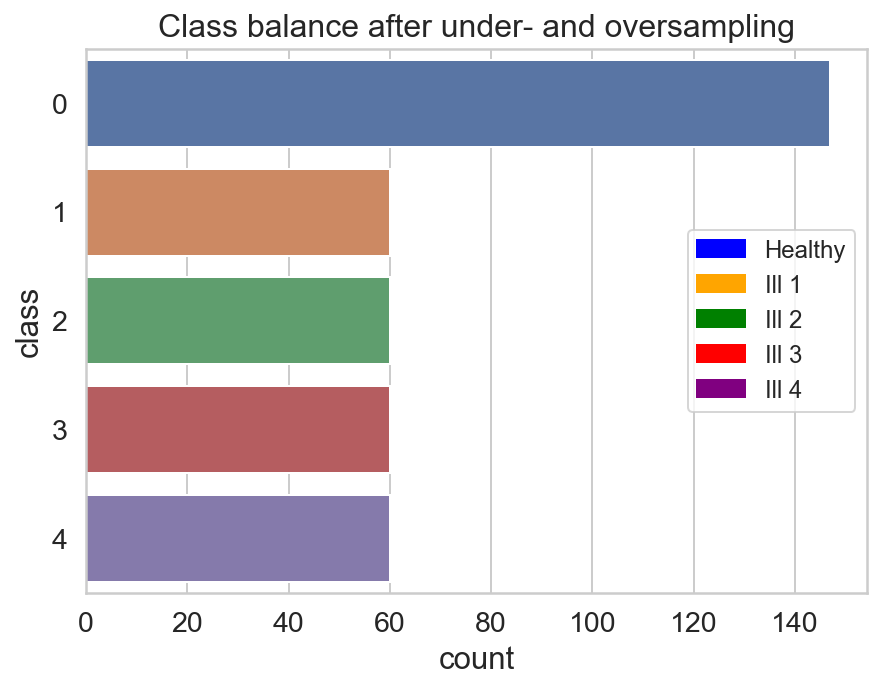

In [11]:
%config InlineBackend.figure_formats = set(['retina'])
#Resampling Process

#1: define the oversampler
#oversampling the classes 1-4 using the imblearn.over_sampling.SMOTENC function
categorical_features = [1, 4, 6, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
sampling_strategy = {1: 60, 2: 60, 3: 60, 4: 60}
oversampler = SMOTENC(categorical_features = categorical_features, random_state = random_state, sampling_strategy = sampling_strategy, n_jobs = -1)
#apply the oversampler to the x/y_trainval datasets
x_trainval_oversample, y_trainval_oversample  = oversampler.fit_resample(x_trainval_mul_norm_df, y_trainval_mul_df)
y_trainval_oversample = pd.DataFrame(y_trainval_oversample)
#Visualize the result of the over_sampling
class_balance_oversampler = plt.figure(figsize=(7,5))
sns.countplot(y=y_trainval_oversample['class'], data = y_trainval_oversample)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.3)
plt.title("Class balance after oversampling the minority", size = 16)
plt.legend(handles = [blue_patch, orange_patch, green_patch, red_patch, purple_patch], loc="right", fontsize = 12)
plt.savefig('class_balance_oversampling.png', bbox_inches = 'tight')

#2: define undersampler
#undersampling class 0 using the imblearn.under_sampling.OneSidedSelection() function
#OSS is preferrable to other functions available for under sampling in imblearn because it combines the use of 1-NN with TomekLinks.
#OSS is therefore not as susceptible to noise (TomekLinks removes noisy samples)

undersampler = OneSidedSelection(sampling_strategy = 'majority', n_jobs = -1, random_state = random_state, n_seeds_S=150)
x_trainval_resample, y_trainval_resample = undersampler.fit_resample(x_trainval_oversample, y_trainval_oversample)

#Visualize the result of the under_sampling
class_balance_resample = plt.figure(figsize=(7,5))
sns.countplot(y = y_trainval_resample['class'], data = y_trainval_resample)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.3)
plt.title("Class balance after under- and oversampling", size = 16)
plt.legend(handles = [blue_patch, orange_patch, green_patch, red_patch, purple_patch], loc="right", fontsize = 12)
plt.savefig('class_balance_underoversampling.png', bbox_inches = 'tight')

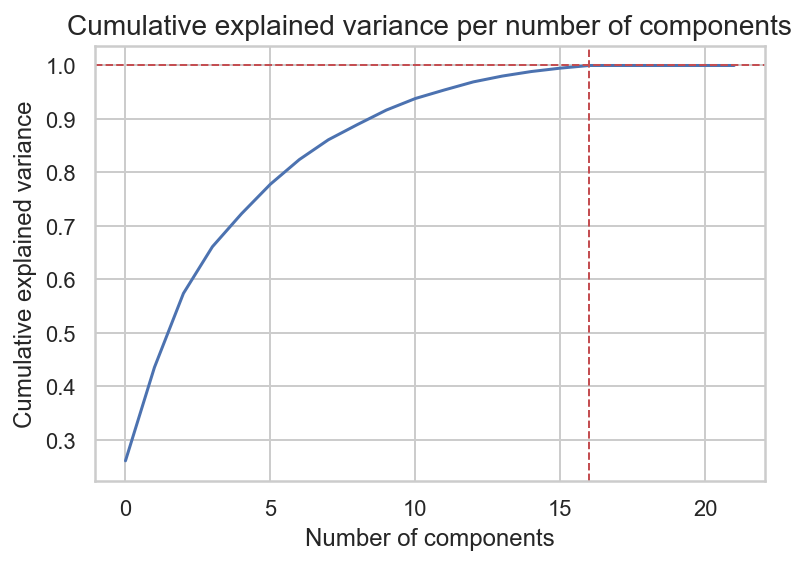

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.260624,0.260624
1,0.435430,0.174807
2,0.573794,0.138363
3,0.661091,0.087298
4,0.722529,0.061438
5,0.778001,0.055472
6,0.824110,0.046109
7,0.861082,0.036972
8,0.889455,0.028373
9,0.916617,0.027163


In [12]:
%config InlineBackend.figure_formats = set(['retina'])
pca_test = PCA(n_components=22)
pca_test.fit(x_train_bin_norm)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.title("Cumulative explained variance per number of components", size = 14)
plt.xlabel('Number of components', size = 12)
plt.ylabel('Cumulative explained variance', size = 12)
plt.axvline(linewidth = 1, color = 'r', linestyle = '--', x = 16, ymin = 0, ymax = 1)
plt.axhline(linewidth = 1, color = 'r', linestyle = '--', xmin = 0, y = 1)
plt.savefig('PCA_cumulative_comp.png')
plt.show()

evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(17))

In [13]:
#Initializing the function
pca = PCA(n_components = 16, random_state = random_state)
pca_mc = PCA(n_components = 16, random_state = random_state)
#Fit the model with x_train dataset
pca.fit(x_train_bin_norm)
pca_mc.fit(x_train_mul_norm)
#Apply the dimensionality reduction on x_ datasets
#Binary classifiaction datasets
x_train_bin_norm_pca = pca.transform(x_train_bin_norm)
x_test_bin_norm_pca = pca.transform(x_test_bin_norm)
x_valid_bin_norm_pca = pca.transform(x_valid_bin_norm)
x_trainval_bin_norm_pca = pca.transform(x_trainval_bin_norm)
#Multiclass classification datasets
x_train_mul_norm_pca = pca_mc.transform(x_train_mul_norm)
x_test_mul_norm_pca = pca_mc.transform(x_test_mul_norm)
x_valid_mul_norm_pca = pca_mc.transform(x_valid_mul_norm)
x_trainval_mul_norm_pca = pca_mc.transform(x_trainval_mul_norm)
x_trainval_resample_pca = pca_mc.transform(x_trainval_resample)

In [14]:
#Baseline binary SVM
#Calculation Time: 1sec
y_pred_svm_bin_base = SVC(random_state = random_state, cache_size = cache_size, kernel = 'linear').fit(x_trainval_bin_norm, y_trainval_bin).predict(x_test_bin_norm)

In [15]:
#binary SVM with Parameter Tuning
%config InlineBackend.figure_formats = set(['retina'])
#Set up for RandomizedSearchCV, which is used to identify relevant ranges for each parameter
#Calculation Time: 5.4min
kernel = ['linear', 'rbf', 'sigmoid', 'poly']
C = 10. ** np.arange(-4,5)
gamma = 10. ** np.arange(-4,5)
degree = [2,3,4,5,6]

svm_bin_tune = SVC(random_state = random_state, cache_size = cache_size)

param_grid_svm_bin_tune = {'kernel': kernel, 'C': C, 'gamma': gamma, 'degree': degree}

randomsearch_svm_bin_tune = RandomizedSearchCV(svm_bin_tune, param_grid_svm_bin_tune, n_iter = 1000, cv = cv, verbose = verbose, n_jobs = -1, random_state = random_state, scoring = 'recall', pre_dispatch = '2*n_jobs').fit(x_trainval_bin_norm, y_trainval_bin)                            

In [37]:
randomsearch_svm_bin_tune.best_estimator_

SVC(cache_size=3000, degree=2, gamma=0.1, kernel='sigmoid', random_state=14)

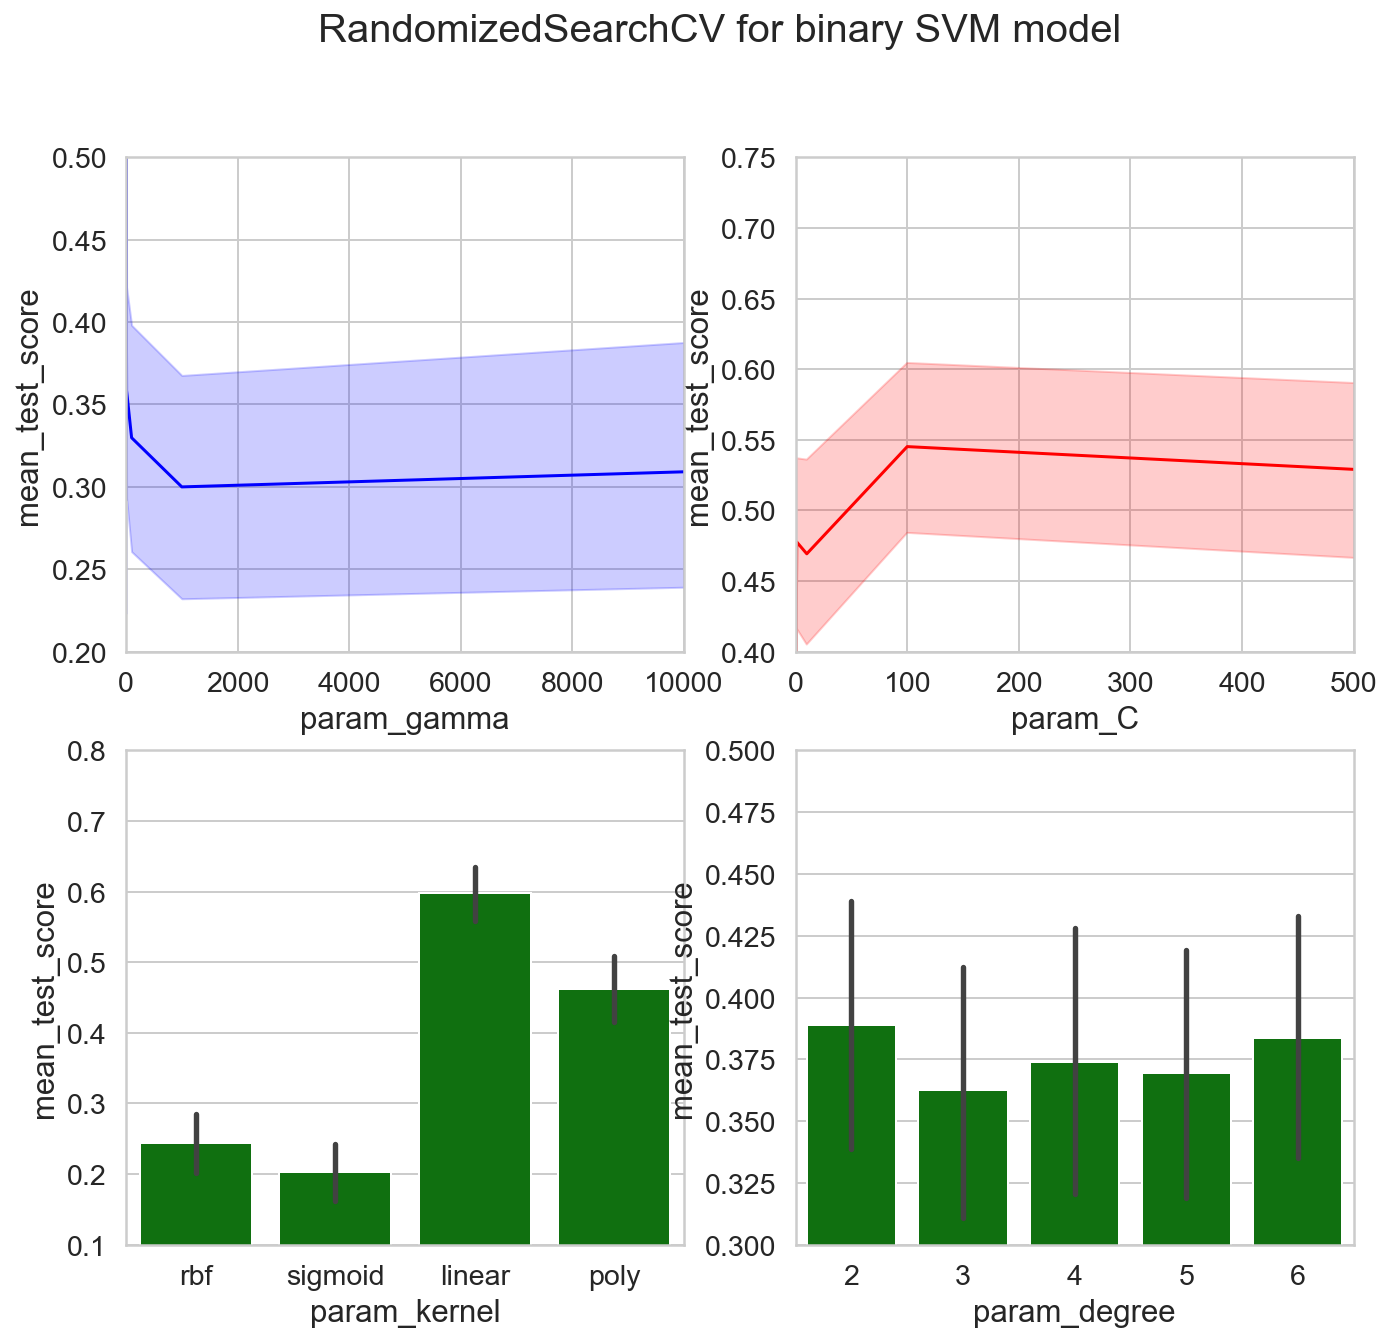

In [24]:
#Create pd.DataFrame to store test results for each parameter
randomsearch_svm_bin_tune_df = pd.DataFrame(randomsearch_svm_bin_tune.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
#Visualize test results 
fig, axs = plt.subplots(ncols=2, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.3)
fig.set_size_inches(11,10)
fig.suptitle('RandomizedSearchCV for binary SVM model', size = 20)

sns.lineplot(x = 'param_C', y = 'mean_test_score', data = randomsearch_svm_bin_tune_df, ax = axs[0,1],color='red')
axs[0,1].set_ylim([.40,.75])
axs[0,1].set_xlim([0, 500])

sns.lineplot(x = 'param_gamma', y = 'mean_test_score', data = randomsearch_svm_bin_tune_df, ax = axs[0,0],color='blue')
axs[0,0].set_ylim([.20, .50])
axs[0,0].set_xlim([0, 10000])

sns.barplot(x = 'param_kernel', y = 'mean_test_score', data = randomsearch_svm_bin_tune_df, ax = axs[1,0],color='green')
axs[1,0].set_ylim([.10, .80])

sns.barplot(x = 'param_degree', y = 'mean_test_score', data = randomsearch_svm_bin_tune_df, ax = axs[1,1],color='green')
axs[1,1].set_ylim([.30, .50])
plt.savefig('svm_bin_tune.png')
plt.show()

In [25]:
#Set-up for GridSearchCV
#Calculation Time: 2.1min
kernel = ['linear', 'poly']
C = np.arange(100,200,1)
gamma = 10. ** np.arange(-7,1)
degree = [2,6]
param_grid_svm_bin_tune = {'kernel': kernel, 'C': C, 'gamma': gamma, 'degree': degree}
#Run GridSearchCV to find best parameter values
gridsearch_svm_bin_tune = GridSearchCV(svm_bin_tune, param_grid_svm_bin_tune, cv = cv, scoring = 'recall', n_jobs = -1, verbose = verbose).fit(x_trainval_bin_norm, y_trainval_bin)
#Create a new SVM estimator with the best parameter values found through GridSearchSCV
svm_bin_tune = gridsearch_svm_bin_tune.best_estimator_
#Make predictions with the new estimator
y_pred_svm_bin_tune = svm_bin_tune.predict(x_test_bin_norm)

In [35]:
gridsearch_svm_bin_tune.best_estimator_

SVC(C=160, cache_size=3000, degree=2, gamma=0.01, kernel='poly',
    random_state=14)

In [18]:
#Baseline SVM with PCA
#Calculation Time: 1sec
y_pred_svm_bin_pca = SVC(random_state = random_state, cache_size = cache_size, kernel = 'linear').fit(x_trainval_bin_norm_pca, y_trainval_bin).predict(x_test_bin_norm_pca)

In [19]:
#SVM model with parameter tuning and PCA reduced dimensionality
%config InlineBackend.figure_formats = set(['retina'])
#Set up for RandomizedSearchCV, which is used to identify relevant ranges for each parameter
#Calculation Time: 5.7min
kernel = ['linear', 'rbf', 'sigmoid', 'poly']
C = 10. ** np.arange(-4,5)
gamma = 10. ** np.arange(-4,5)
degree = [2,3,4,5,6]
svm_bin_tune_pca = SVC(random_state = random_state, cache_size = cache_size)
param_grid_svm_bin_tune_pca = {'kernel': kernel, 'C': C, 'gamma': gamma, 'degree': degree}
#Execute RandomizedSearchCV
randomsearch_svm_bin_tune_pca = RandomizedSearchCV(svm_bin_tune_pca, param_grid_svm_bin_tune_pca, n_iter = 1000, cv = cv, verbose = verbose, n_jobs = -1, random_state = random_state, scoring = 'recall').fit(x_trainval_bin_norm_pca, y_trainval_bin)                              

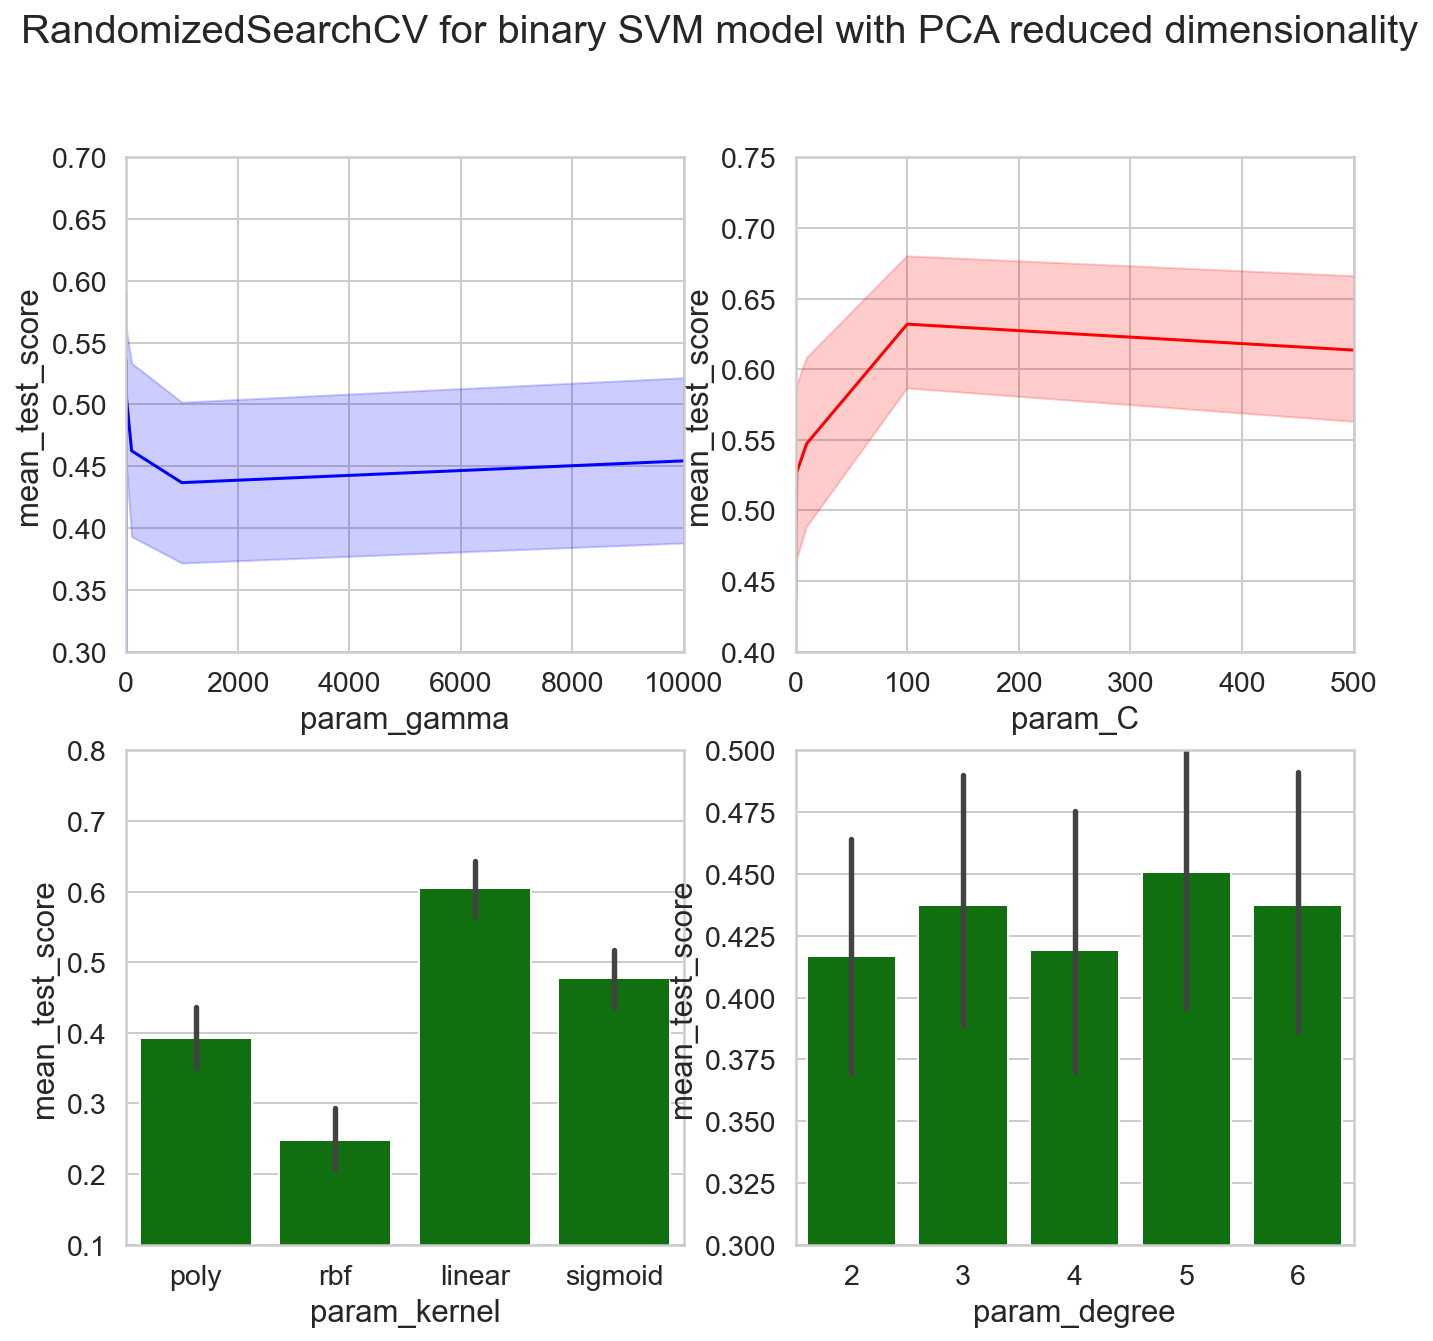

In [36]:
#Create pd.DataFrame to store test results for each parameter
randomsearch_svm_bin_tune_pca_df = pd.DataFrame(randomsearch_svm_bin_tune_pca.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
#Visualize test results 
fig, axs = plt.subplots(ncols=2, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.3)
fig.set_size_inches(11,10)
fig.suptitle('RandomizedSearchCV for binary SVM model with PCA reduced dimensionality', size = 20)

sns.lineplot(x = 'param_C', y = 'mean_test_score', data = randomsearch_svm_bin_tune_pca_df, ax = axs[0,1],color='red')
axs[0,1].set_ylim([.40,.75])
axs[0,1].set_xlim([0, 500])

sns.lineplot(x = 'param_gamma', y = 'mean_test_score', data = randomsearch_svm_bin_tune_pca_df, ax = axs[0,0],color='blue')
axs[0,0].set_ylim([.30, .70])
axs[0,0].set_xlim([0, 10000])

sns.barplot(x = 'param_kernel', y = 'mean_test_score', data = randomsearch_svm_bin_tune_pca_df, ax = axs[1,0],color='green')
axs[1,0].set_ylim([.10, .80])

sns.barplot(x = 'param_degree', y = 'mean_test_score', data = randomsearch_svm_bin_tune_pca_df, ax = axs[1,1],color='green')
axs[1,1].set_ylim([.30, .50])

plt.savefig('svm_bin_tune_pca.png')
plt.show()

In [27]:
#GridSearchCV
#Calculation Time: 2.8min
#Set-up for GridSearchCV. An exhaustive search over speciied parameter values for the SVM estimator.
kernel = ['linear', 'sigmoid']
C = np.arange(80,180,1)
gamma = 10. ** np.arange(-7,1)
degree = [3,5,6]
param_grid_svm_bin_tune_pca = {'kernel': kernel, 'C': C, 'gamma': gamma, 'degree': degree}
#Execute GridSearchCV with the parameters defined above to find best estimators
gridsearch_svm_bin_tune_pca = GridSearchCV(svm_bin_tune_pca, param_grid_svm_bin_tune_pca, cv = cv, scoring = 'recall', verbose = verbose, n_jobs = -1).fit(x_trainval_bin_norm_pca, y_trainval_bin)
#Create new SVM estimator with best estimators and create predictions on x_test
svm_bin_tune_pca = gridsearch_svm_bin_tune_pca.best_estimator_
y_pred_svm_bin_tune_pca = svm_bin_tune_pca.predict(x_test_bin_norm_pca)

In [28]:
#Performance Metrix´cs: SVM for binary Classification
#Confusion matrices
conf_matrix_svm_bin_base = pd.DataFrame(confusion_matrix(y_test_bin, y_pred_svm_bin_base), index = ['actually healthy', 'actually ill'], columns = ['predicted as healthy', 'predicted as ill'])
conf_matrix_svm_bin_tune = pd.DataFrame(confusion_matrix(y_test_bin, y_pred_svm_bin_tune), index = ['actually healthy', 'actually ill'], columns = ['predicted as healthy', 'predicted as ill'])
conf_matrix_svm_bin_pca = pd.DataFrame(confusion_matrix(y_test_bin, y_pred_svm_bin_pca), index = ['actually healthy', 'actually ill'], columns = ['predicted as healthy', 'predicted as ill'])
conf_matrix_svm_bin_tune_pca = pd.DataFrame(confusion_matrix(y_test_bin, y_pred_svm_bin_tune_pca), index = ['actually healthy', 'actually ill'], columns = ['predicted as healthy', 'predicted as ill'])
#classification Reports
class_report_svm_bin_base = metrics.classification_report(y_test_bin, y_pred_svm_bin_base, zero_division = 0)
class_report_svm_bin_tune = metrics.classification_report(y_test_bin, y_pred_svm_bin_tune, zero_division = 0)
class_report_svm_bin_pca = metrics.classification_report(y_test_bin, y_pred_svm_bin_pca, zero_division = 0)
class_report_svm_bin_tune_pca = metrics.classification_report(y_test_bin, y_pred_svm_bin_tune_pca, zero_division = 0)
#Recall scores
recall_svm_bin_base = metrics.recall_score(y_test_bin, y_pred_svm_bin_base)
recall_svm_bin_tune = metrics.recall_score(y_test_bin, y_pred_svm_bin_tune)
recall_svm_bin_pca = metrics.recall_score(y_test_bin, y_pred_svm_bin_pca)
recall_svm_bin_tune_pca = metrics.recall_score(y_test_bin, y_pred_svm_bin_tune_pca)
#Precision scores
precision_svm_bin_base = metrics.precision_score(y_test_bin, y_pred_svm_bin_base)
precision_svm_bin_tune = metrics.precision_score(y_test_bin, y_pred_svm_bin_tune)
precision_svm_bin_pca = metrics.precision_score(y_test_bin, y_pred_svm_bin_pca)
precision_svm_bin_tune_pca = metrics.precision_score(y_test_bin, y_pred_svm_bin_tune_pca)
#F-Scores
fscore_svm_bin_base = metrics.f1_score(y_test_bin, y_pred_svm_bin_base)
fscore_svm_bin_tune = metrics.f1_score(y_test_bin, y_pred_svm_bin_tune)
fscore_svm_bin_pca = metrics.f1_score(y_test_bin, y_pred_svm_bin_pca)
fscore_svm_bin_tune_pca = metrics.f1_score(y_test_bin, y_pred_svm_bin_tune_pca)

In [29]:
print("Baseline SVM Recall Score: {:.2f}%".format(recall_svm_bin_base*100))
print("Baseline SVM with PCA reduced dimensionality: {:.2f}%".format(recall_svm_bin_pca*100))
print("SVM with parameter tuning: {:.2f}%".format(recall_svm_bin_tune*100))
print("SVM with parameter tuning and PCA reduced dimensionality: {:.2f}%".format(recall_svm_bin_tune_pca*100))

Baseline SVM Recall Score: 76.19%
Baseline SVM with PCA reduced dimensionality: 76.19%
SVM with parameter tuning: 71.43%
SVM with parameter tuning and PCA reduced dimensionality: 71.43%


In [33]:
print("Confusion Matrix: baseline SVM")
display(conf_matrix_svm_bin_base)
print(class_report_svm_bin_base)
print("Confusion Matrix: baseline SVM with PCA reduced dimensionality")
display(conf_matrix_svm_bin_pca)
print(class_report_svm_bin_pca)
print("Confusion Matrix: SVM with parameter tuning")
display(conf_matrix_svm_bin_tune)
print(class_report_svm_bin_tune)
print("Confusion Matrix: SVM with parameter tuning and PCA reduced dimensionality")
display(conf_matrix_svm_bin_tune_pca)
print(class_report_svm_bin_tune_pca)

Confusion Matrix: baseline SVM


,predicted as healthy,predicted as ill
actually healthy,48,0
actually ill,10,32


              precision    recall  f1-score   support

           0       0.83      1.00      0.91        48
           1       1.00      0.76      0.86        42

    accuracy                           0.89        90
   macro avg       0.91      0.88      0.89        90
weighted avg       0.91      0.89      0.89        90

Confusion Matrix: baseline SVM with PCA reduced dimensionality


,predicted as healthy,predicted as ill
actually healthy,47,1
actually ill,10,32


              precision    recall  f1-score   support

           0       0.82      0.98      0.90        48
           1       0.97      0.76      0.85        42

    accuracy                           0.88        90
   macro avg       0.90      0.87      0.87        90
weighted avg       0.89      0.88      0.88        90

Confusion Matrix: SVM with parameter tuning


,predicted as healthy,predicted as ill
actually healthy,46,2
actually ill,12,30


              precision    recall  f1-score   support

           0       0.79      0.96      0.87        48
           1       0.94      0.71      0.81        42

    accuracy                           0.84        90
   macro avg       0.87      0.84      0.84        90
weighted avg       0.86      0.84      0.84        90

Confusion Matrix: SVM with parameter tuning and PCA reduced dimensionality


,predicted as healthy,predicted as ill
actually healthy,41,7
actually ill,12,30


              precision    recall  f1-score   support

           0       0.77      0.85      0.81        48
           1       0.81      0.71      0.76        42

    accuracy                           0.79        90
   macro avg       0.79      0.78      0.79        90
weighted avg       0.79      0.79      0.79        90



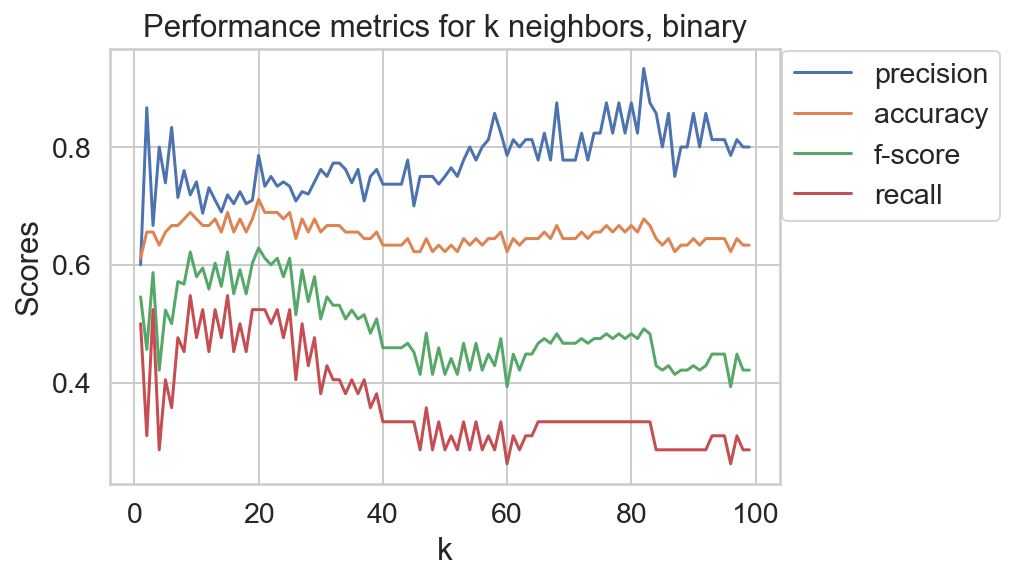

In [174]:
%config InlineBackend.figure_formats = set(['retina'])
k_range = range(1,100)

precision_scores = {}
precision_scores_list = []
recall_scores = {}
recall_scores_list = []
f1_scores = {}
f1_scores_list = []
accuracy_scores = {}
accuracy_scores_list = []

for k in k_range:
    knn_test = KNeighborsClassifier(n_neighbors = k)
    knn_test.fit(x_trainval_bin, y_trainval_bin)
    y_pred = knn_test.predict(x_test_bin)
    precision_scores[k] = metrics.precision_score(y_test_bin, y_pred)
    precision_scores_list.append(metrics.precision_score(y_test_bin, y_pred))
    recall_scores[k] = metrics.recall_score(y_test_bin, y_pred)
    recall_scores_list.append(metrics.recall_score(y_test_bin, y_pred))
    f1_scores[k] = metrics.f1_score(y_test_bin, y_pred)
    f1_scores_list.append(metrics.f1_score(y_test_bin, y_pred))
    accuracy_scores[k] = metrics.accuracy_score(y_test_bin, y_pred)
    accuracy_scores_list.append(metrics.accuracy_score(y_test_bin, y_pred))

plt.plot(k_range, precision_scores_list, label = 'precision')
plt.plot(k_range, accuracy_scores_list, label = 'accuracy')
plt.plot(k_range, f1_scores_list, label = 'f-score')
plt.plot(k_range, recall_scores_list, label = 'recall')
plt.legend(loc = 'right', bbox_to_anchor = (1.35, 0.8))
plt.title('Performance metrics for k neighbors, binary')
plt.xlabel('k')
plt.ylabel('Scores')
plt.savefig('knn_bin_test.png', bbox_inches = 'tight')

### Baseline KNN model

In [38]:
#Calculation Time: 1sec
y_pred_knn_bin_base = KNeighborsClassifier(n_jobs = -1).fit(x_trainval_bin_norm, y_trainval_bin).predict(x_test_bin_norm)

### KNN model with parameter tuning

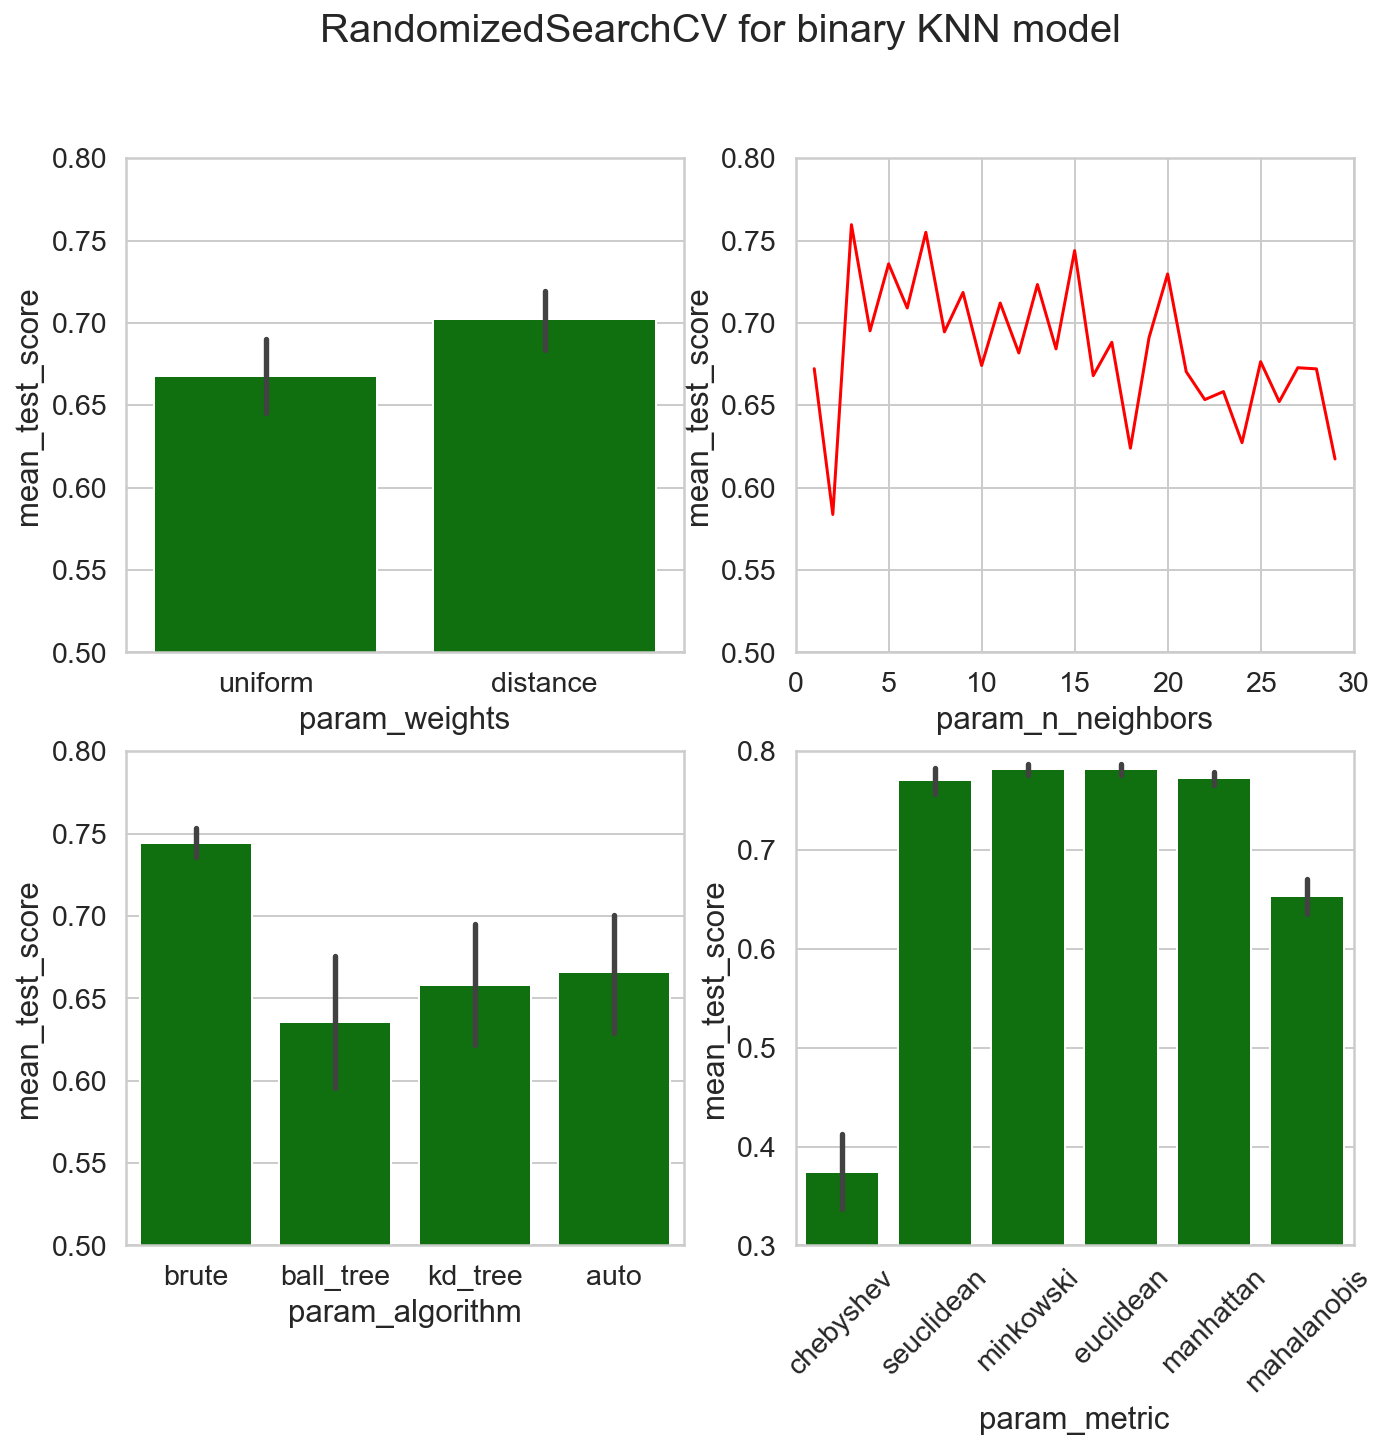

In [39]:
%config InlineBackend.figure_formats = set(['retina'])
#RandomSearchCV Set-up
#Calculation Time: 15.8sec
n_neighbors = np.arange(1,30,1)
weights = ["uniform", "distance"]
algorithm = ["auto", "ball_tree", "kd_tree", "brute"]
metric = ["euclidean", "manhattan", "chebyshev", "minkowski", "seuclidean", "mahalanobis"]
knn_bin_tune = KNeighborsClassifier()
param_grid_knn_bin_tune = {'n_neighbors': n_neighbors, 'weights': weights, 'algorithm': algorithm, 'metric': metric}
#Execute RandomizedSearchCV
randomsearch_knn_bin_tune = RandomizedSearchCV(knn_bin_tune, param_grid_knn_bin_tune, n_iter = 1000, cv = cv, verbose = verbose, n_jobs = -1, random_state = random_state, scoring = 'recall').fit(x_trainval_bin_norm, y_trainval_bin)
#save randomsearch results to pd.DataFrame for future use
randomsearch_knn_bin_tune_df = pd.DataFrame(randomsearch_knn_bin_tune.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
#Visualize results
fig, axs = plt.subplots(ncols=2, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.3)
fig.set_size_inches(11,10)
fig.suptitle('RandomizedSearchCV for binary KNN model', size = 20)

sns.barplot(x = 'param_weights', y = 'mean_test_score', data = randomsearch_knn_bin_tune_df, ax = axs[0,0],color='green')
axs[0,0].set_ylim([.50, .80])

sns.lineplot(x = 'param_n_neighbors', y = 'mean_test_score', data = randomsearch_knn_bin_tune_df, ax = axs[0,1],color='red')
axs[0,1].set_ylim([.50,.80])
axs[0,1].set_xlim([0, 30])

sns.barplot(x = 'param_algorithm', y = 'mean_test_score', data = randomsearch_knn_bin_tune_df, ax = axs[1,0],color='green')
axs[1,0].set_ylim([.50, .80])

b = sns.barplot(x = 'param_metric', y = 'mean_test_score', data = randomsearch_knn_bin_tune_df, ax = axs[1,1],color='green')
b.set_xticklabels(b.get_xticklabels(), rotation = 45)
axs[1,1].set_ylim([.30, .80])
plt.savefig('knn_bin_tune.png', bbox_inches = 'tight')
plt.show()

In [42]:
#Set up for gridSearchCV
#Calculation Time: 3.6sec
n_neighbors = np.arange(0,10,1)
weights = ["distance"]
algorithm = ["kd_tree", "brute", "auto"]
metric = ["seuclidean", "euclidean", "minkowski", "manhattan"]
knn_bin_tune = KNeighborsClassifier()
param_grid_knn_bin_tune = {'n_neighbors': n_neighbors, 'weights': weights, 'algorithm': algorithm, 'metric': metric}
#Execute GridSearchCV
gridsearch_knn_bin_tune = GridSearchCV(knn_bin_tune, param_grid_knn_bin_tune, cv = cv, n_jobs = -1, verbose = verbose, scoring = 'recall')
#Create new SVM estimator with best estimators and create predictions on x_test
gridsearch_knn_bin_tune.fit(x_trainval_bin_norm, y_trainval_bin)
knn_bin_tune = gridsearch_knn_bin_tune.best_estimator_
y_pred_knn_bin_tune = knn_bin_tune.predict(x_test_bin_norm)

In [43]:
gridsearch_knn_bin_tune.best_estimator_

KNeighborsClassifier(algorithm='kd_tree', metric='euclidean', n_neighbors=8,
                     weights='distance')

### Baseline KNN model with PCA reduced dimensionality

In [44]:
#Calculation Time: 1sec
y_pred_knn_bin_pca = KNeighborsClassifier().fit(x_trainval_bin_norm_pca, y_trainval_bin).predict(x_test_bin_norm_pca)

### KNN model with parameter tuning and PCA reduced dimensionality

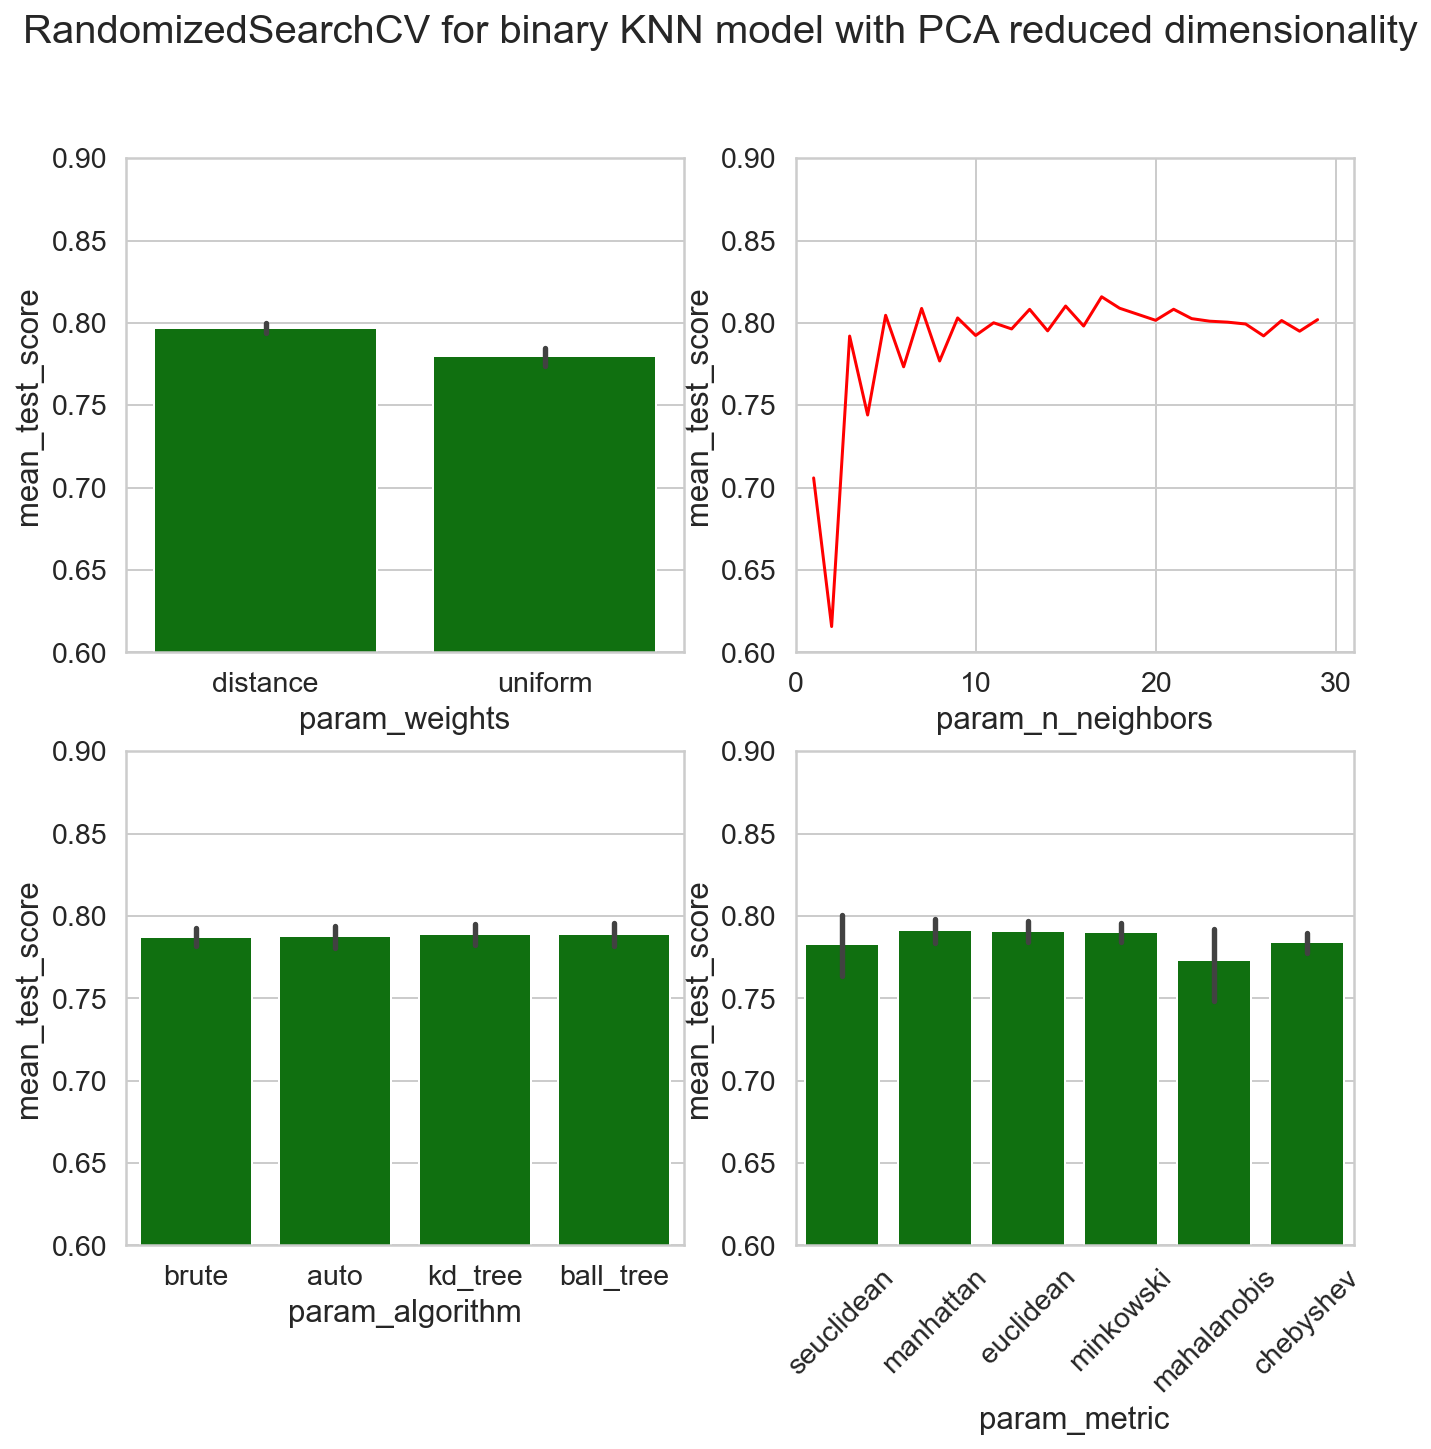

In [45]:
%config InlineBackend.figure_formats = set(['retina'])
#RandomSearchCV Set-up
#Calculation Time: 9.2sec
n_neighbors = np.arange(1,30,1)
weights = ["uniform", "distance"]
algorithm = ["auto", "ball_tree", "kd_tree", "brute"]
metric = ["euclidean", "manhattan", "chebyshev", "minkowski", "seuclidean", "mahalanobis"]
knn_bin_tune_pca = KNeighborsClassifier()
param_grid_knn_bin_tune_pca = {'n_neighbors': n_neighbors, 'weights': weights, 'algorithm': algorithm, 'metric': metric}
#Execute RandomizedSearchCV
randomsearch_knn_bin_tune_pca = RandomizedSearchCV(knn_bin_tune_pca, param_grid_knn_bin_tune_pca, n_iter = 1000, cv = cv, verbose = verbose, n_jobs = -1, random_state = random_state, scoring = 'recall').fit(x_trainval_bin_norm_pca, y_trainval_bin)
#save randomsearch results to pd.DataFrame for future use
randomsearch_knn_bin_tune_pca_df = pd.DataFrame(randomsearch_knn_bin_tune_pca.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
#Visualize results
fig, axs = plt.subplots(ncols=2, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.3)
fig.set_size_inches(11,10)
fig.suptitle('RandomizedSearchCV for binary KNN model with PCA reduced dimensionality', size = 20)

sns.barplot(x = 'param_weights', y = 'mean_test_score', data = randomsearch_knn_bin_tune_pca_df, ax = axs[0,0],color='green')
axs[0,0].set_ylim([.60, .90])

sns.lineplot(x = 'param_n_neighbors', y = 'mean_test_score', data = randomsearch_knn_bin_tune_pca_df, ax = axs[0,1],color='red')
axs[0,1].set_ylim([.60,.90])
axs[0,1].set_xlim([0, 31])

sns.barplot(x = 'param_algorithm', y = 'mean_test_score', data = randomsearch_knn_bin_tune_pca_df, ax = axs[1,0],color='green')
axs[1,0].set_ylim([.60, .90])

b = sns.barplot(x = 'param_metric', y = 'mean_test_score', data = randomsearch_knn_bin_tune_pca_df, ax = axs[1,1],color='green')
b.set_xticklabels(b.get_xticklabels(), rotation = 45)
axs[1,1].set_ylim([.60, .90])

plt.savefig('knn_bin_tune_pca.png', bbox_inches = 'tight')
plt.show()

In [46]:
#GridSearchCV Set-up
#Calculation Time: 18.5sec
n_neighbors = np.arange(10,30,1)
weights = ["distance", "uniform"]
algorithm = ["auto", "kd_tree", "ball_tree", "brute"]
metric = ["euclidean", "manhattan", "chebyshev", "minkowski", "seuclidean", "mahalanobis"]
knn_bin_tune_pca = KNeighborsClassifier()
param_grid_knn_bin_tune_pca = {'n_neighbors': n_neighbors, 'weights': weights, 'algorithm': algorithm, 'metric': metric}
#Execute GridSearchCV
gridsearch_knn_bin_tune_pca = GridSearchCV(knn_bin_tune_pca,param_grid_knn_bin_tune_pca, cv = cv, n_jobs = -1, scoring = 'recall', verbose = verbose).fit(x_trainval_bin_norm_pca, y_trainval_bin)
#Create new estimator with best parameters from gridSearchCV
knn_bin_tune_pca = gridsearch_knn_bin_tune_pca.best_estimator_
#Calculate predictions on x_test data
y_pred_knn_bin_tune_pca = knn_bin_tune_pca.predict(x_test_bin_norm_pca)

C:\Users\maxhe\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1453: FutureWarning: from version 0.25, pairwise_distances for metric='seuclidean' will require V to be specified if Y is passed.
  "specified if Y is passed.", FutureWarning)


In [47]:
gridsearch_knn_bin_tune_pca.best_estimator_

KNeighborsClassifier(algorithm='brute', metric='seuclidean', n_neighbors=21,
                     weights='distance')

### Performance Metrics: KNN for binary classification

In [48]:
#Create the Confusion matrices
conf_matrix_knn_bin_base = pd.DataFrame(confusion_matrix(y_test_bin, y_pred_knn_bin_base), index = ['actually healthy', 'actually ill'], columns = ['predicted as healthy', 'predicted as ill'])
conf_matrix_knn_bin_tune = pd.DataFrame(confusion_matrix(y_test_bin, y_pred_knn_bin_tune), index = ['actually healthy', 'actually ill'], columns = ['predicted as healthy', 'predicted as ill'])
conf_matrix_knn_bin_pca = pd.DataFrame(confusion_matrix(y_test_bin, y_pred_knn_bin_pca), index = ['actually healthy', 'actually ill'], columns = ['predicted as healthy', 'predicted as ill'])
conf_matrix_knn_bin_tune_pca = pd.DataFrame(confusion_matrix(y_test_bin, y_pred_knn_bin_tune_pca), index = ['actually healthy', 'actually ill'], columns = ['predicted as healthy', 'predicted as ill'])
#Create Classification reports
class_report_knn_bin_base = metrics.classification_report(y_test_bin, y_pred_knn_bin_base, zero_division = 0)
class_report_knn_bin_tune = metrics.classification_report(y_test_bin, y_pred_knn_bin_tune, zero_division = 0)
class_report_knn_bin_pca = metrics.classification_report(y_test_bin, y_pred_knn_bin_pca, zero_division = 0)
class_report_knn_bin_tune_pca = metrics.classification_report(y_test_bin, y_pred_knn_bin_tune_pca, zero_division = 0)
#Calculate recall scores
recall_knn_bin_base = metrics.recall_score(y_test_bin, y_pred_knn_bin_base)
recall_knn_bin_tune = metrics.recall_score(y_test_bin, y_pred_knn_bin_tune)
recall_knn_bin_pca = metrics.recall_score(y_test_bin, y_pred_knn_bin_pca)
recall_knn_bin_tune_pca = metrics.recall_score(y_test_bin, y_pred_knn_bin_tune_pca)
#Calculate precision scores
precision_knn_bin_base = metrics.precision_score(y_test_bin, y_pred_knn_bin_base)
precision_knn_bin_tune = metrics.precision_score(y_test_bin, y_pred_knn_bin_tune)
precision_knn_bin_pca = metrics.precision_score(y_test_bin, y_pred_knn_bin_pca)
precision_knn_bin_tune_pca = metrics.precision_score(y_test_bin, y_pred_knn_bin_tune_pca)
#Calculate f-scores for each model
fscore_knn_bin_base = metrics.f1_score(y_test_bin, y_pred_knn_bin_base)
fscore_knn_bin_tune = metrics.f1_score(y_test_bin, y_pred_knn_bin_tune)
fscore_knn_bin_pca = metrics.f1_score(y_test_bin, y_pred_knn_bin_pca)
fscore_knn_bin_tune_pca = metrics.f1_score(y_test_bin, y_pred_knn_bin_tune_pca)

In [49]:
print("Recall scores:")
print("Baseline KNN model: {:.2f}%".format(recall_knn_bin_base*100))
print("Baseline KNN model with PCA reduced dimensionality: {:.2f}%".format(recall_knn_bin_pca*100))
print("KNN model with parameter tuning: {:.2f}%".format(recall_knn_bin_tune*100))
print("KNN model with paramenter tuning and PCA reduced dimensionality: {:.2f}%".format(recall_knn_bin_tune_pca*100))

Recall scores:
Baseline KNN model: 76.19%
Baseline KNN model with PCA reduced dimensionality: 78.57%
KNN model with parameter tuning: 76.19%
KNN model with paramenter tuning and PCA reduced dimensionality: 80.95%


In [54]:
print("Confusion Matrix:")
print("Baseline KNN:")
display(conf_matrix_knn_bin_base)
print(class_report_knn_bin_base)
print("Baseline KNN with PCA reduced dimensionality:")
display(conf_matrix_knn_bin_pca)
print(class_report_knn_bin_pca)
print("KNN with parameter tuning:")
display(conf_matrix_knn_bin_tune)
print(class_report_knn_bin_tune)
print("KNN with parameter tuning and PCA reduced dimensionality:")
display(conf_matrix_knn_bin_tune_pca)
print(class_report_knn_bin_tune_pca)

Confusion Matrix:
Baseline KNN:


,predicted as healthy,predicted as ill
actually healthy,43,5
actually ill,10,32


              precision    recall  f1-score   support

           0       0.81      0.90      0.85        48
           1       0.86      0.76      0.81        42

    accuracy                           0.83        90
   macro avg       0.84      0.83      0.83        90
weighted avg       0.84      0.83      0.83        90

Baseline KNN with PCA reduced dimensionality:


,predicted as healthy,predicted as ill
actually healthy,41,7
actually ill,9,33


              precision    recall  f1-score   support

           0       0.82      0.85      0.84        48
           1       0.82      0.79      0.80        42

    accuracy                           0.82        90
   macro avg       0.82      0.82      0.82        90
weighted avg       0.82      0.82      0.82        90

KNN with parameter tuning:


,predicted as healthy,predicted as ill
actually healthy,43,5
actually ill,10,32


              precision    recall  f1-score   support

           0       0.81      0.90      0.85        48
           1       0.86      0.76      0.81        42

    accuracy                           0.83        90
   macro avg       0.84      0.83      0.83        90
weighted avg       0.84      0.83      0.83        90

KNN with parameter tuning and PCA reduced dimensionality:


,predicted as healthy,predicted as ill
actually healthy,44,4
actually ill,8,34


              precision    recall  f1-score   support

           0       0.85      0.92      0.88        48
           1       0.89      0.81      0.85        42

    accuracy                           0.87        90
   macro avg       0.87      0.86      0.86        90
weighted avg       0.87      0.87      0.87        90



### Baseline Random Forest model

In [55]:
#Baseline Binary Random Forest model
#Calculation Time: 1sec
y_pred_rf_bin_base = RandomForestClassifier(random_state = random_state).fit(x_trainval_bin_norm, y_trainval_bin).predict(x_test_bin_norm)

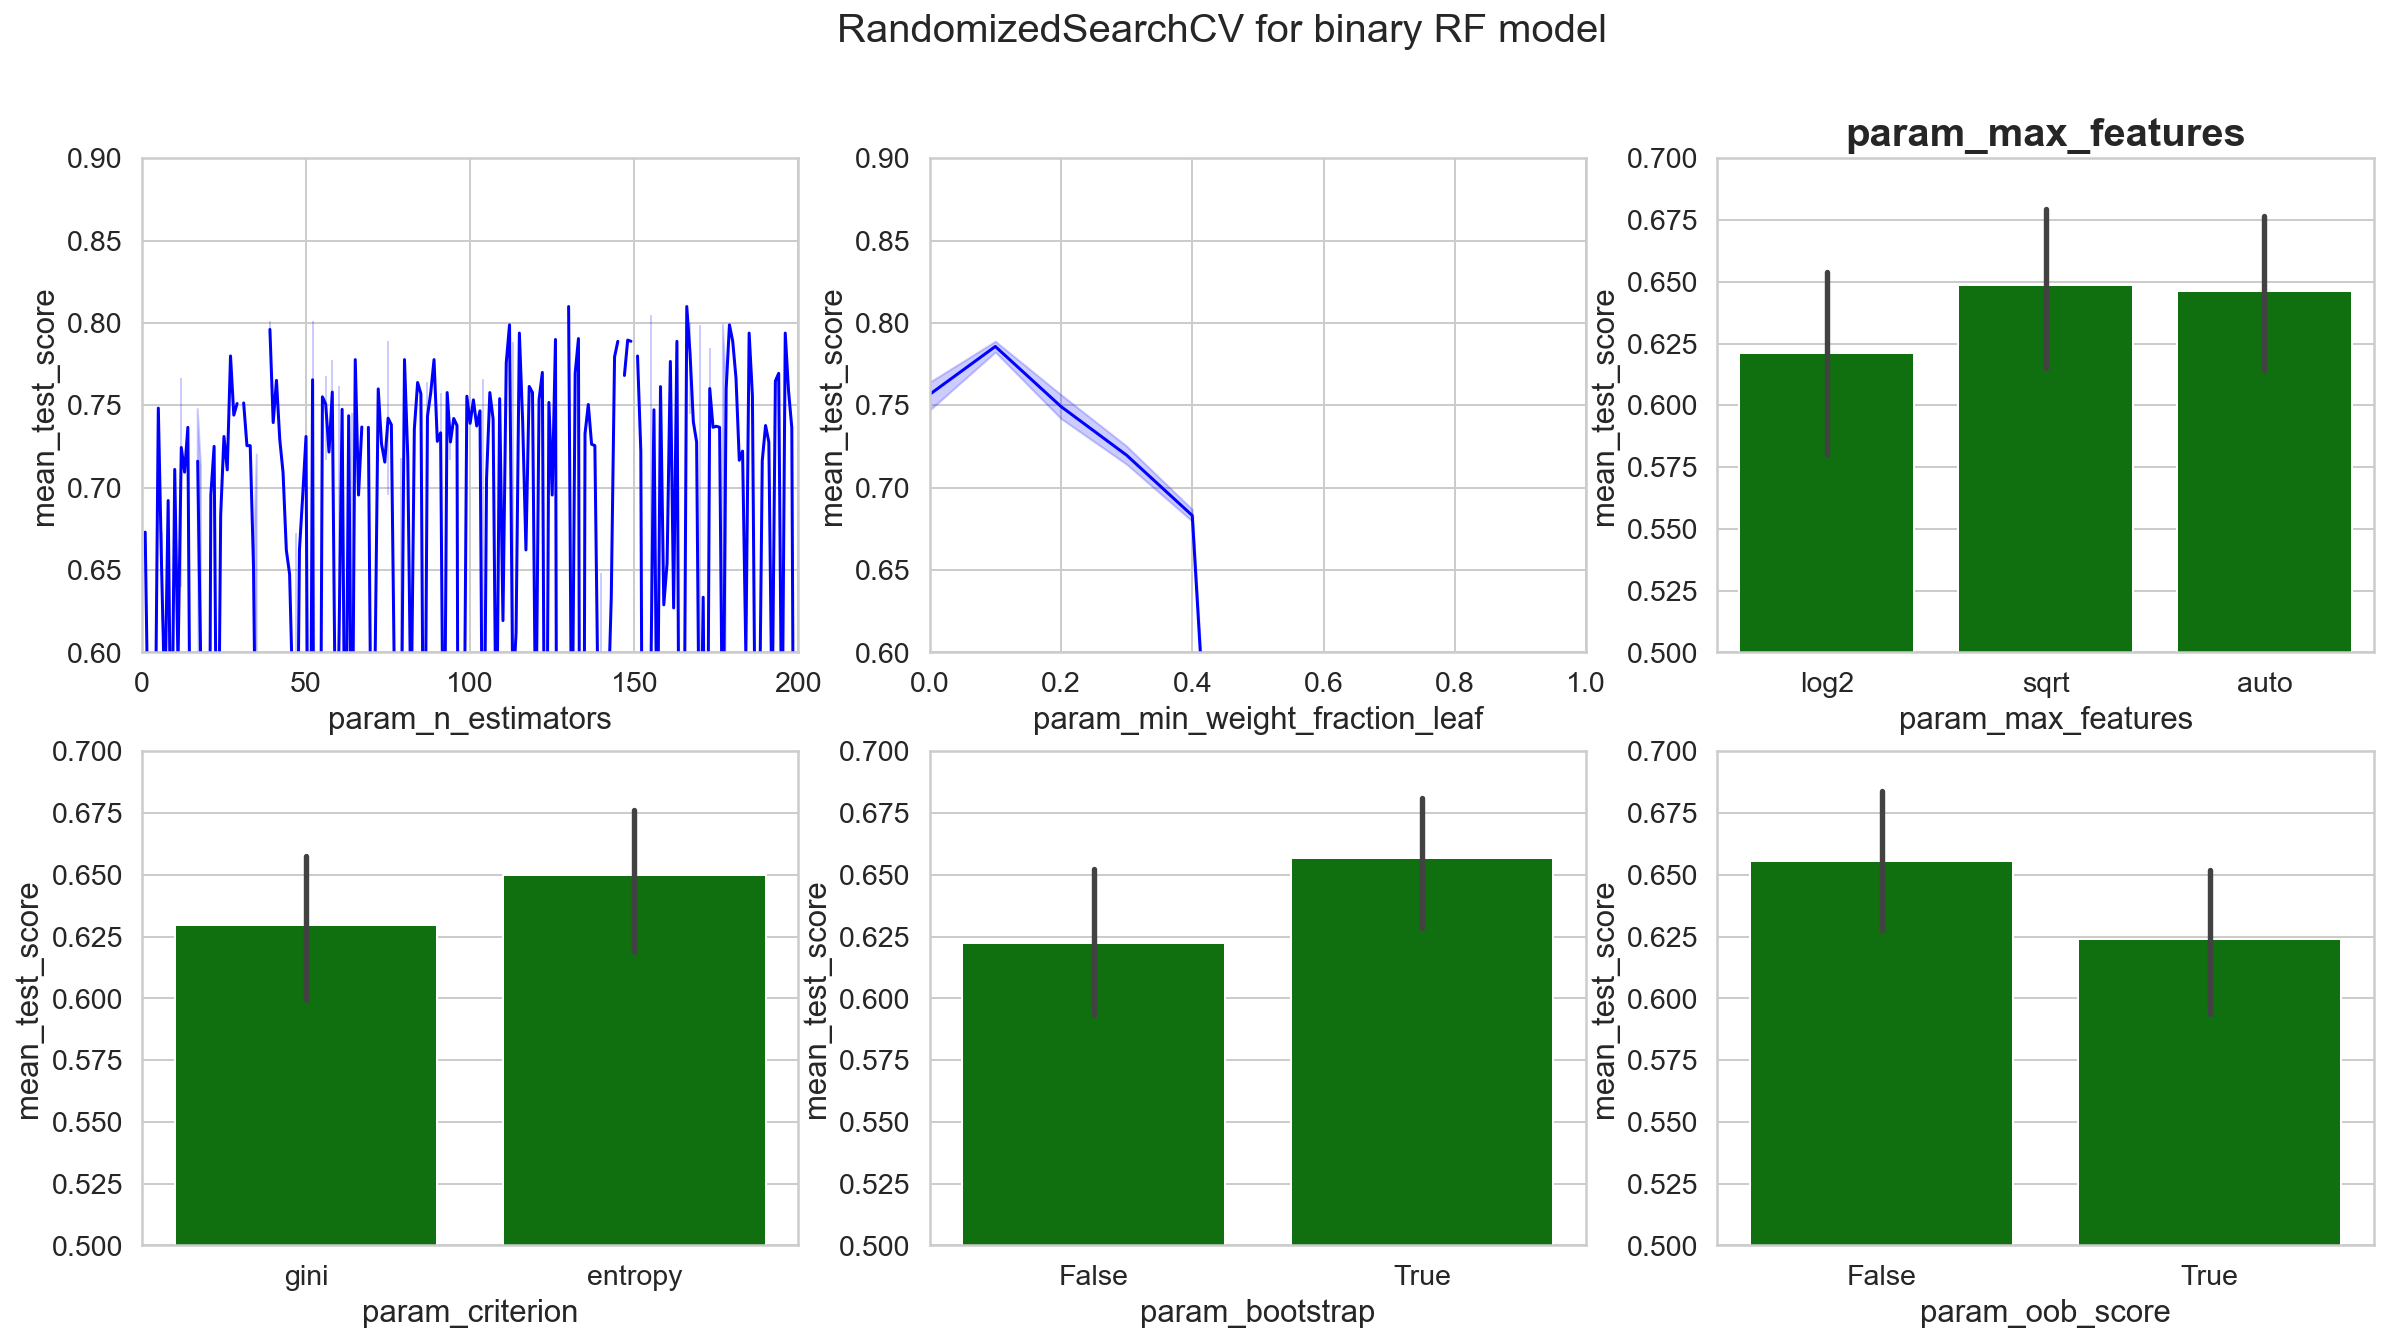

In [59]:
#Binary Random Forest with parameter tuning
%config InlineBackend.figure_formats = set(['retina'])
#RandomizedSearchCV Set-up
#Calculation Time: 5.8min
n_estimators = np.arange(1,200,1)
criterion = ["gini", "entropy"]
min_weight_fraction_leaf = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
max_features = ["auto", "sqrt", "log2"]
bootstrap = ["True","False"]
oob_score = ["True", "False"]
rf_bin_tune = RandomForestClassifier(random_state = random_state)
param_grid_rf_bin_tune = {'n_estimators': n_estimators, 'criterion': criterion, 'min_weight_fraction_leaf': min_weight_fraction_leaf, 'max_features': max_features, 'bootstrap': bootstrap, 'oob_score': oob_score}
#Execute RandomizedSearchCV
randomsearch_rf_bin_tune = RandomizedSearchCV(rf_bin_tune, param_grid_rf_bin_tune, n_iter = 1000, cv = cv, verbose = verbose, n_jobs = -1, random_state = random_state, scoring = 'recall').fit(x_trainval_bin_norm, y_trainval_bin)
#save results to pd.DataFrame for future use
randomsearch_rf_bin_tune_df = pd.DataFrame(randomsearch_rf_bin_tune.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
#Visualize results
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.3)
fig.set_size_inches(20,10)
fig.suptitle('RandomizedSearchCV for binary RF model', size = 20)

sns.lineplot(x = 'param_n_estimators', y = 'mean_test_score', data = randomsearch_rf_bin_tune_df, ax = axs[0,0], color = 'blue')
axs[0,0].set_ylim([.60,.90])
axs[0,0].set_xlim([0, 200])

sns.lineplot(x = 'param_min_weight_fraction_leaf', y = 'mean_test_score', data = randomsearch_rf_bin_tune_df, ax = axs[0,1], color='blue')
axs[0,1].set_ylim([.60, .90])
axs[0,1].set_xlim([0, 1])

sns.barplot(x = 'param_max_features', y = 'mean_test_score', data = randomsearch_rf_bin_tune_df, ax = axs[0,2], color='green')
axs[0,2].set_ylim([.50, .70])
axs[0,2].set_title(label = 'param_max_features', size=20, weight='bold')

sns.barplot(x = 'param_criterion', y = 'mean_test_score', data = randomsearch_rf_bin_tune_df, ax = axs[1,0], color = 'green')
axs[1,0].set_ylim([.50, .70])

sns.barplot(x = 'param_bootstrap', y = 'mean_test_score', data = randomsearch_rf_bin_tune_df, ax = axs[1,1], color = 'green')
axs[1,1].set_ylim([.50, .70])

sns.barplot(x = 'param_oob_score', y = 'mean_test_score', data = randomsearch_rf_bin_tune_df, ax = axs[1,2], color = 'green')
axs[1,2].set_ylim([.50, .70])

plt.savefig('rf_bin_tune.png', bbox_inches = 'tight')
plt.show()

In [64]:
#GridSearchCV Set-up
#Calculation Time: 1m
n_estimators = np.arange(120,200,1)
min_weight_fraction_leaf = np.arange(0.1,0.2)
max_features = ["sqrt"]
criterion = ["entropy"]
bootstrap = ["True"]
oob_score = ["False"]
rf_bin_tune = RandomForestClassifier(random_state = random_state)
param_grid_rf_bin_tune = {'n_estimators': n_estimators, 'criterion': criterion, 'min_weight_fraction_leaf': min_weight_fraction_leaf, 'max_features': max_features, 'bootstrap': bootstrap, 'oob_score': oob_score}
#Execute GridSearchCv
gridsearch_rf_bin_tune = GridSearchCV(rf_bin_tune, param_grid_rf_bin_tune, cv = cv, verbose = verbose, n_jobs = -1, scoring = 'recall').fit(x_trainval_bin_norm, y_trainval_bin)
#Create new RandomForest estimator with best parameters foound in GridSearchCV
rf_bin_tune = gridsearch_rf_bin_tune.best_estimator_
#Make predictions using the new rf estimator
y_pred_rf_bin_tune = rf_bin_tune.predict(x_test_bin_norm)

In [65]:
gridsearch_rf_bin_tune.best_estimator_

RandomForestClassifier(bootstrap='True', criterion='entropy',
                       max_features='sqrt', min_weight_fraction_leaf=0.1,
                       n_estimators=132, oob_score='False', random_state=14)

### Baseline Random Forest model with PCA reduced dimensionality

In [67]:
#Calculation Time: 1sec
y_pred_rf_bin_pca = RandomForestClassifier(random_state = random_state).fit(x_trainval_bin_norm_pca, y_trainval_bin).predict(x_test_bin_norm_pca)

### Random Forest model with parameter tuning and PCA reduced dimensionality

C:\Users\maxhe\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\maxhe\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


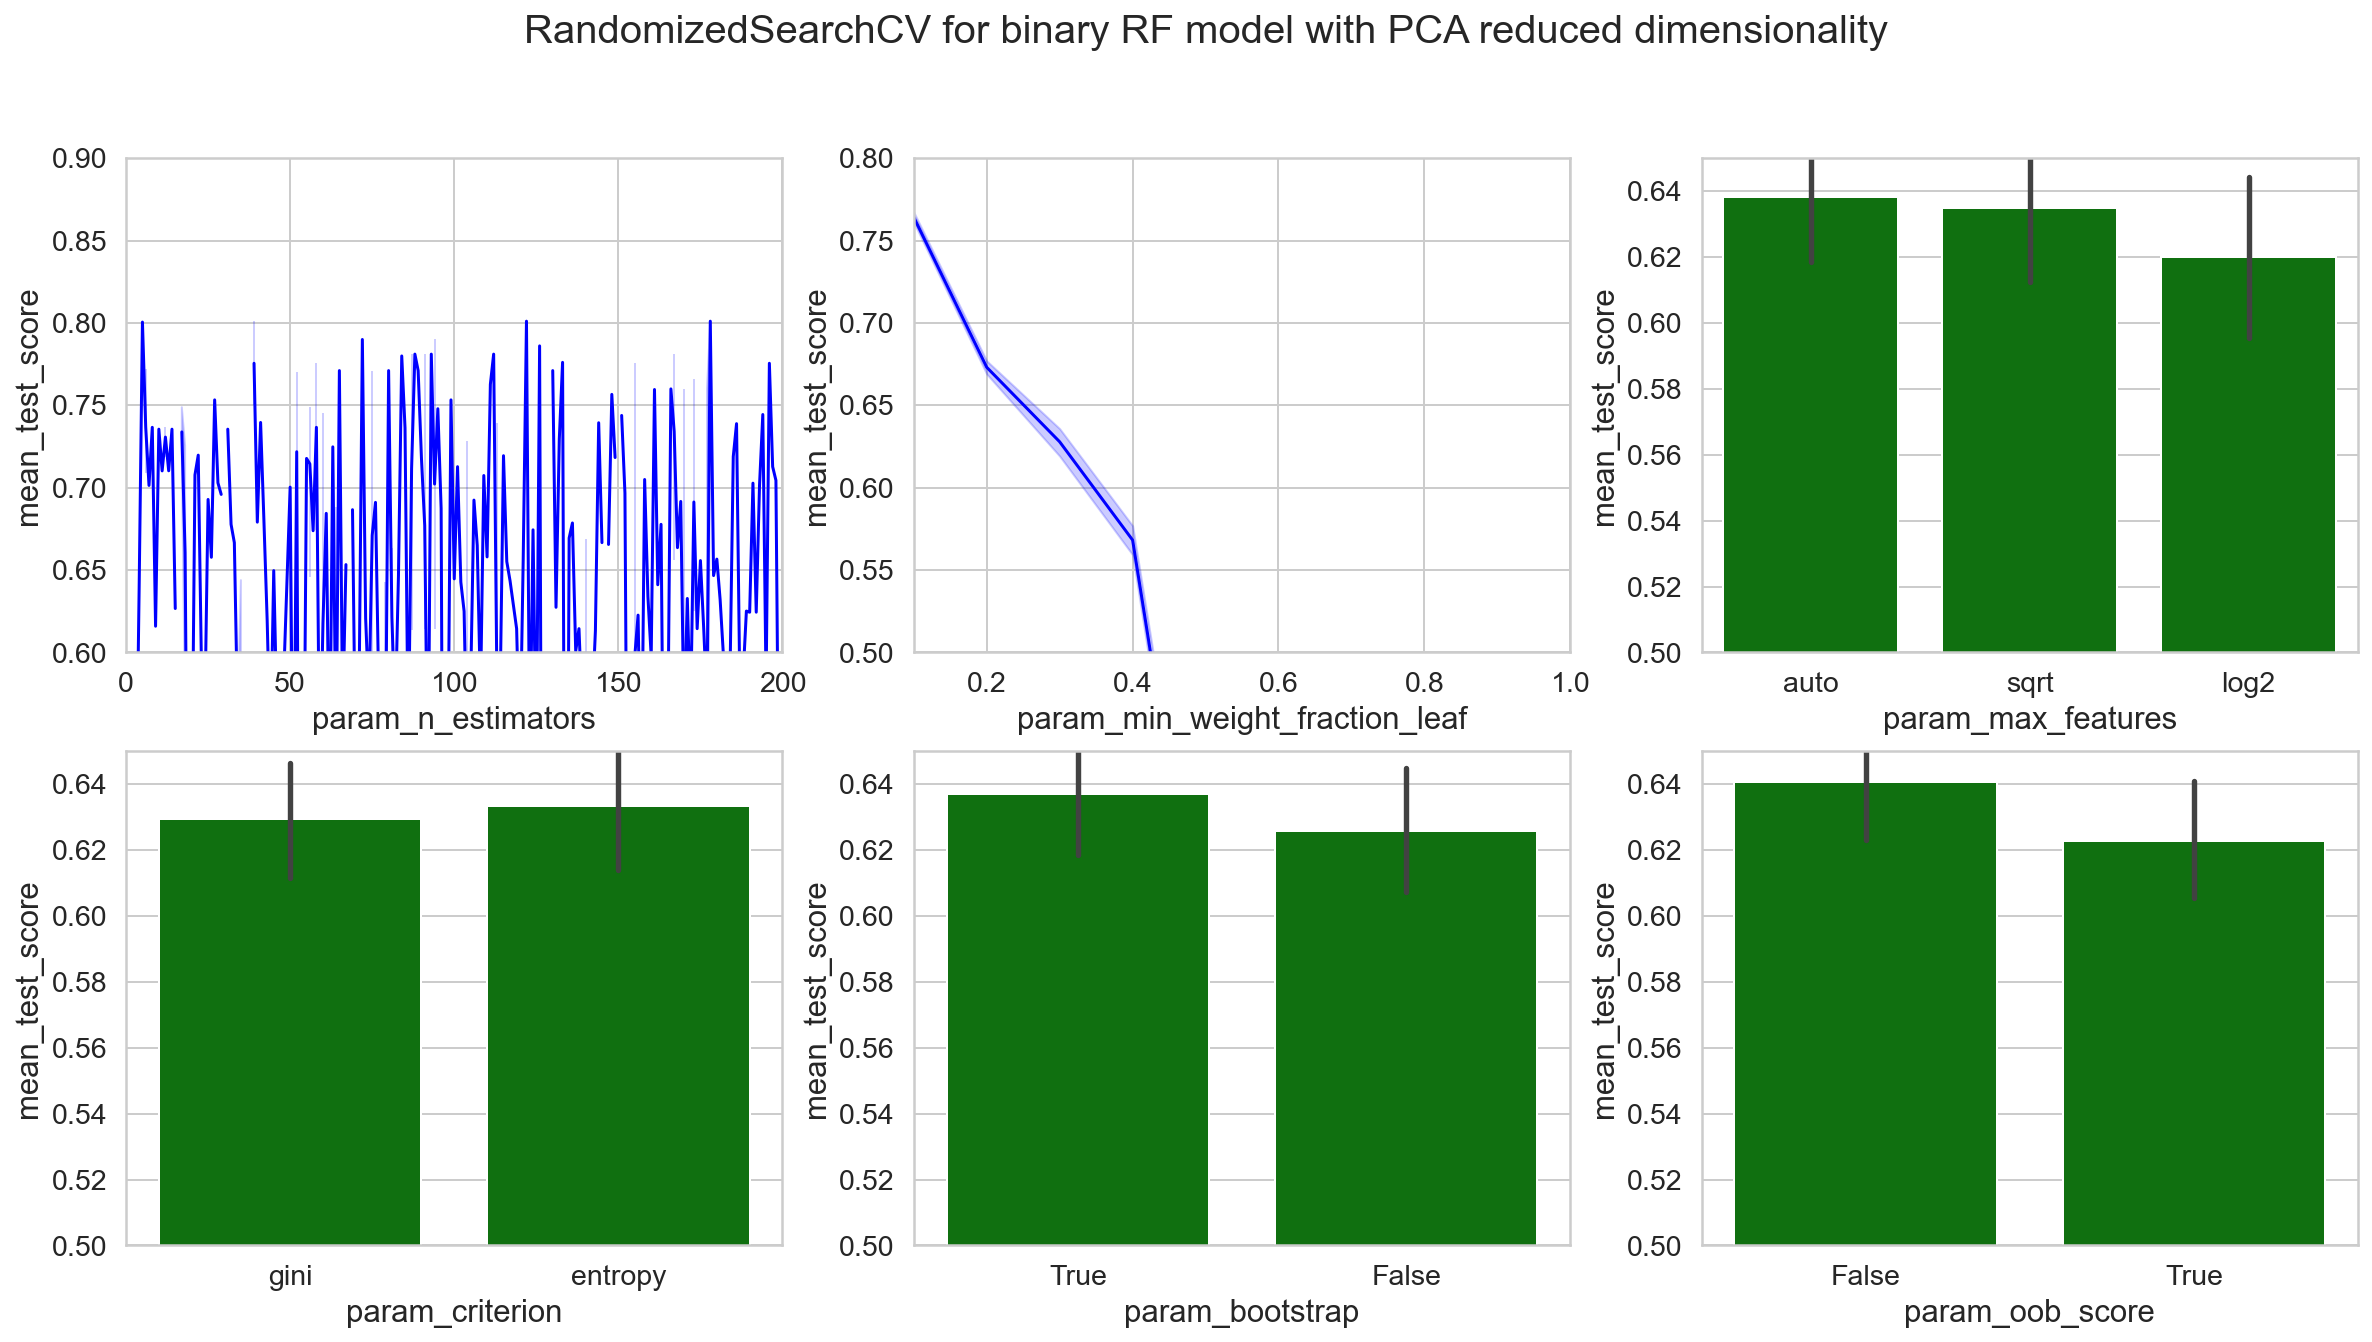

In [68]:
%config InlineBackend.figure_formats = set(['retina'])
#RandomizedSearchCV Set-up
#Calculation Time: 4.7min
n_estimators = np.arange(1,200,1)
criterion = ["gini", "entropy"]
min_weight_fraction_leaf = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
max_features = ["auto", "sqrt", "log2"]
bootstrap = ["True","False"]
oob_score = ["True", "False"]
rf_bin_pca_tune = RandomForestClassifier(random_state = random_state)
param_grid_rf_bin_pca_tune = {'n_estimators': n_estimators, 'criterion': criterion, 'min_weight_fraction_leaf': min_weight_fraction_leaf, 'max_features': max_features, 'bootstrap': bootstrap, 'oob_score': oob_score}
#Execute RandomizedSearchCV
randomsearch_rf_bin_pca_tune = RandomizedSearchCV(rf_bin_pca_tune, param_grid_rf_bin_pca_tune, n_iter = 1000, cv = cv, verbose = verbose, n_jobs = -1, random_state = random_state, scoring = 'recall').fit(x_trainval_bin_norm_pca, y_trainval_bin)
#save results to pd.DataFrame for future use
randomsearch_rf_bin_pca_tune_df = pd.DataFrame(randomsearch_rf_bin_pca_tune.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
#Visualize results
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.3)
fig.set_size_inches(20,10)
fig.suptitle('RandomizedSearchCV for binary RF model with PCA reduced dimensionality', size = 20)

sns.lineplot(x = 'param_n_estimators', y = 'mean_test_score', data = randomsearch_rf_bin_pca_tune_df, ax = axs[0,0], color = 'blue')
axs[0,0].set_ylim([.60,.90])
axs[0,0].set_xlim([0, 200])

sns.lineplot(x = 'param_min_weight_fraction_leaf', y = 'mean_test_score', data = randomsearch_rf_bin_pca_tune_df, ax = axs[0,1], color='blue')
axs[0,1].set_ylim([.50, .80])
axs[0,1].set_xlim([0.1, 1])

sns.barplot(x = 'param_max_features', y = 'mean_test_score', data = randomsearch_rf_bin_pca_tune_df, ax = axs[0,2], color='green')
axs[0,2].set_ylim([.50, .65])

sns.barplot(x = 'param_criterion', y = 'mean_test_score', data = randomsearch_rf_bin_pca_tune_df, ax = axs[1,0], color = 'green')
axs[1,0].set_ylim([.50, .65])

sns.barplot(x = 'param_bootstrap', y = 'mean_test_score', data = randomsearch_rf_bin_pca_tune_df, ax = axs[1,1], color = 'green')
axs[1,1].set_ylim([.50, .65])

sns.barplot(x = 'param_oob_score', y = 'mean_test_score', data = randomsearch_rf_bin_pca_tune_df, ax = axs[1,2], color = 'green')
axs[1,2].set_ylim([.50, .65])

plt.savefig('rf_bin_pca_tune.png', bbox_inches = 'tight')
plt.show()

In [70]:
#GridSearchCV Set-up
#Calculation Time: 2.4min
n_estimators = np.arange(60,130,1)
min_weight_fraction_leaf = [0.1, 0.2]
max_features = ["sqrt"]
criterion = ["entropy"]
bootstrap = ["True"]
oob_score = ["False"]
rf_bin_pca_tune = RandomForestClassifier(random_state = random_state)
param_grid_rf_bin_pca_tune = {'n_estimators': n_estimators, 'criterion': criterion, 'min_weight_fraction_leaf': min_weight_fraction_leaf, 'max_features': max_features, 'bootstrap': bootstrap, 'oob_score': oob_score}
#Execute GridSearchCv
gridsearch_rf_bin_pca_tune = GridSearchCV(rf_bin_pca_tune, param_grid_rf_bin_pca_tune, cv = cv, verbose = verbose, n_jobs = -1, scoring = 'recall').fit(x_trainval_bin_norm_pca, y_trainval_bin)
#Create new RandomForest estimator with best parameters found in GridSearchCV
rf_bin_pca_tune = gridsearch_rf_bin_pca_tune.best_estimator_
#Make predictions using the new rf estimator
y_pred_rf_bin_pca_tune = rf_bin_pca_tune.predict(x_test_bin_norm_pca)

In [71]:
gridsearch_rf_bin_pca_tune.best_estimator_

RandomForestClassifier(bootstrap='True', criterion='entropy',
                       max_features='sqrt', min_weight_fraction_leaf=0.1,
                       n_estimators=62, oob_score='False', random_state=14)

### Performance Metrics: Random Forest Classifier for binary classification

In [72]:
#Confusion matrices
conf_matrix_rf_bin_base = pd.DataFrame(confusion_matrix(y_test_bin, y_pred_rf_bin_base), index = ['actually healthy', 'actually ill'], columns = ['predicted as healthy', 'predicted as ill'])
conf_matrix_rf_bin_tune = pd.DataFrame(confusion_matrix(y_test_bin, y_pred_rf_bin_tune), index = ['actually healthy', 'actually ill'], columns = ['predicted as healthy', 'predicted as ill'])
conf_matrix_rf_bin_pca = pd.DataFrame(confusion_matrix(y_test_bin, y_pred_rf_bin_pca), index = ['actually healthy', 'actually ill'], columns = ['predicted as healthy', 'predicted as ill'])
conf_matrix_rf_bin_pca_tune = pd.DataFrame(confusion_matrix(y_test_bin, y_pred_rf_bin_pca_tune), index = ['actually healthy', 'actually ill'], columns = ['predicted as healthy', 'predicted as ill'])
#Classification report
class_report_rf_bin_base = metrics.classification_report(y_test_bin, y_pred_rf_bin_base, zero_division = 0)
class_report_rf_bin_tune = metrics.classification_report(y_test_bin, y_pred_rf_bin_tune, zero_division = 0)
class_report_rf_bin_pca = metrics.classification_report(y_test_bin, y_pred_rf_bin_pca, zero_division = 0)
class_report_rf_bin_pca_tune = metrics.classification_report(y_test_bin, y_pred_rf_bin_pca_tune, zero_division = 0)
#Calculate recall scores for each model
recall_rf_bin_base = metrics.recall_score(y_test_bin, y_pred_rf_bin_base)
recall_rf_bin_tune = metrics.recall_score(y_test_bin, y_pred_rf_bin_tune)
recall_rf_bin_pca = metrics.recall_score(y_test_bin, y_pred_rf_bin_pca)
recall_rf_bin_pca_tune = metrics.recall_score(y_test_bin, y_pred_rf_bin_pca_tune)
#Calculate precision scores for each model
precision_rf_bin_base = metrics.precision_score(y_test_bin, y_pred_rf_bin_base)
precision_rf_bin_tune = metrics.precision_score(y_test_bin, y_pred_rf_bin_tune)
precision_rf_bin_pca = metrics.precision_score(y_test_bin, y_pred_rf_bin_pca)
precision_rf_bin_pca_tune = metrics.precision_score(y_test_bin, y_pred_rf_bin_pca_tune)
#Calculate f-scores for each model
fscore_rf_bin_base = metrics.f1_score(y_test_bin, y_pred_rf_bin_base)
fscore_rf_bin_tune = metrics.f1_score(y_test_bin, y_pred_rf_bin_tune)
fscore_rf_bin_pca = metrics.f1_score(y_test_bin, y_pred_rf_bin_pca)
fscore_rf_bin_pca_tune = metrics.f1_score(y_test_bin, y_pred_rf_bin_pca_tune)

In [73]:
print("Recall Scores:")
print("Baseline Random Forest model: {:.2f}%".format(recall_rf_bin_base*100))
print("Baseline Random Forest model with PCA reduced dimensionality: {:.2f}%".format(recall_rf_bin_pca*100))
print("Random Forest model with parameter tuning: {:.2f}%".format(recall_rf_bin_tune*100))
print("Random Forest model with parameter tuning and PCA reduced dimensionality: {:.2f}%".format(recall_rf_bin_pca_tune*100))

Recall Scores:
Baseline Random Forest model: 78.57%
Baseline Random Forest model with PCA reduced dimensionality: 78.57%
Random Forest model with parameter tuning: 76.19%
Random Forest model with parameter tuning and PCA reduced dimensionality: 73.81%


In [74]:
print("Confusion Matrix:")
print("Baseline Random Forest:")
display(conf_matrix_rf_bin_base)
print(class_report_rf_bin_base)
print("Baseline Random Forest with PCA reduced dimensionality:")
display(conf_matrix_rf_bin_pca)
print(class_report_rf_bin_pca)
print("Random Forest model with parameter tuning:")
display(conf_matrix_rf_bin_tune)
print(class_report_rf_bin_tune)
print("Random Forest model with parameter tuning and PCA reduced dimensionality:")
display(conf_matrix_rf_bin_pca_tune)
print(class_report_rf_bin_pca_tune)

Confusion Matrix:
Baseline Random Forest:


,predicted as healthy,predicted as ill
actually healthy,43,5
actually ill,9,33


              precision    recall  f1-score   support

           0       0.83      0.90      0.86        48
           1       0.87      0.79      0.82        42

    accuracy                           0.84        90
   macro avg       0.85      0.84      0.84        90
weighted avg       0.85      0.84      0.84        90

Baseline Random Forest with PCA reduced dimensionality:


,predicted as healthy,predicted as ill
actually healthy,43,5
actually ill,9,33


              precision    recall  f1-score   support

           0       0.83      0.90      0.86        48
           1       0.87      0.79      0.82        42

    accuracy                           0.84        90
   macro avg       0.85      0.84      0.84        90
weighted avg       0.85      0.84      0.84        90

Random Forest model with parameter tuning:


,predicted as healthy,predicted as ill
actually healthy,43,5
actually ill,10,32


              precision    recall  f1-score   support

           0       0.81      0.90      0.85        48
           1       0.86      0.76      0.81        42

    accuracy                           0.83        90
   macro avg       0.84      0.83      0.83        90
weighted avg       0.84      0.83      0.83        90

Random Forest model with parameter tuning and PCA reduced dimensionality:


,predicted as healthy,predicted as ill
actually healthy,43,5
actually ill,11,31


              precision    recall  f1-score   support

           0       0.80      0.90      0.84        48
           1       0.86      0.74      0.79        42

    accuracy                           0.82        90
   macro avg       0.83      0.82      0.82        90
weighted avg       0.83      0.82      0.82        90



# Multiclass Classification

## Support Vector Machine (SVM)

### Baseline SVM model

In [77]:
#Calculation Time: 1sec
y_trainval_resample_arr = np.array(y_trainval_resample).ravel()
y_pred_svm_mul_base = SVC(random_state = random_state, cache_size = cache_size, decision_function_shape = 'ovr', class_weight = 'balanced').fit(x_trainval_resample, y_trainval_resample_arr.ravel()).predict(x_test_mul_norm)

### SVM model with parameter tuning

In [89]:
%config InlineBackend.figure_formats = set(['retina'])
#Set up for RandomizedSearchCV, which is used to identify relevant ranges for each parameter
#Calculation Time: 5.5min
kernel = ['linear', 'rbf', 'sigmoid', 'poly']
C = 10. ** np.arange(-4,5)
gamma = 10. ** np.arange(-4,5)
degree = [2,3,4,5,6]

svm_mul_tune = SVC(random_state = random_state, cache_size = cache_size, decision_function_shape = 'ovr', class_weight = 'balanced')
param_grid_svm_mul_tune = {'kernel': kernel, 'C': C, 'gamma': gamma, 'degree': degree}
#Execute RandomizedSearchCV
randomsearch_svm_mul_tune = RandomizedSearchCV(svm_mul_tune, param_grid_svm_mul_tune, n_iter = 1000, cv = cv, verbose = verbose, n_jobs = -1, random_state = random_state, scoring = 'recall_weighted').fit(x_trainval_resample, y_trainval_resample_arr)                              

In [138]:
randomsearch_svm_mul_tune_df = pd.DataFrame(randomsearch_svm_mul_tune.cv_results_).sort_values('rank_test_score').reset_index(drop=True)

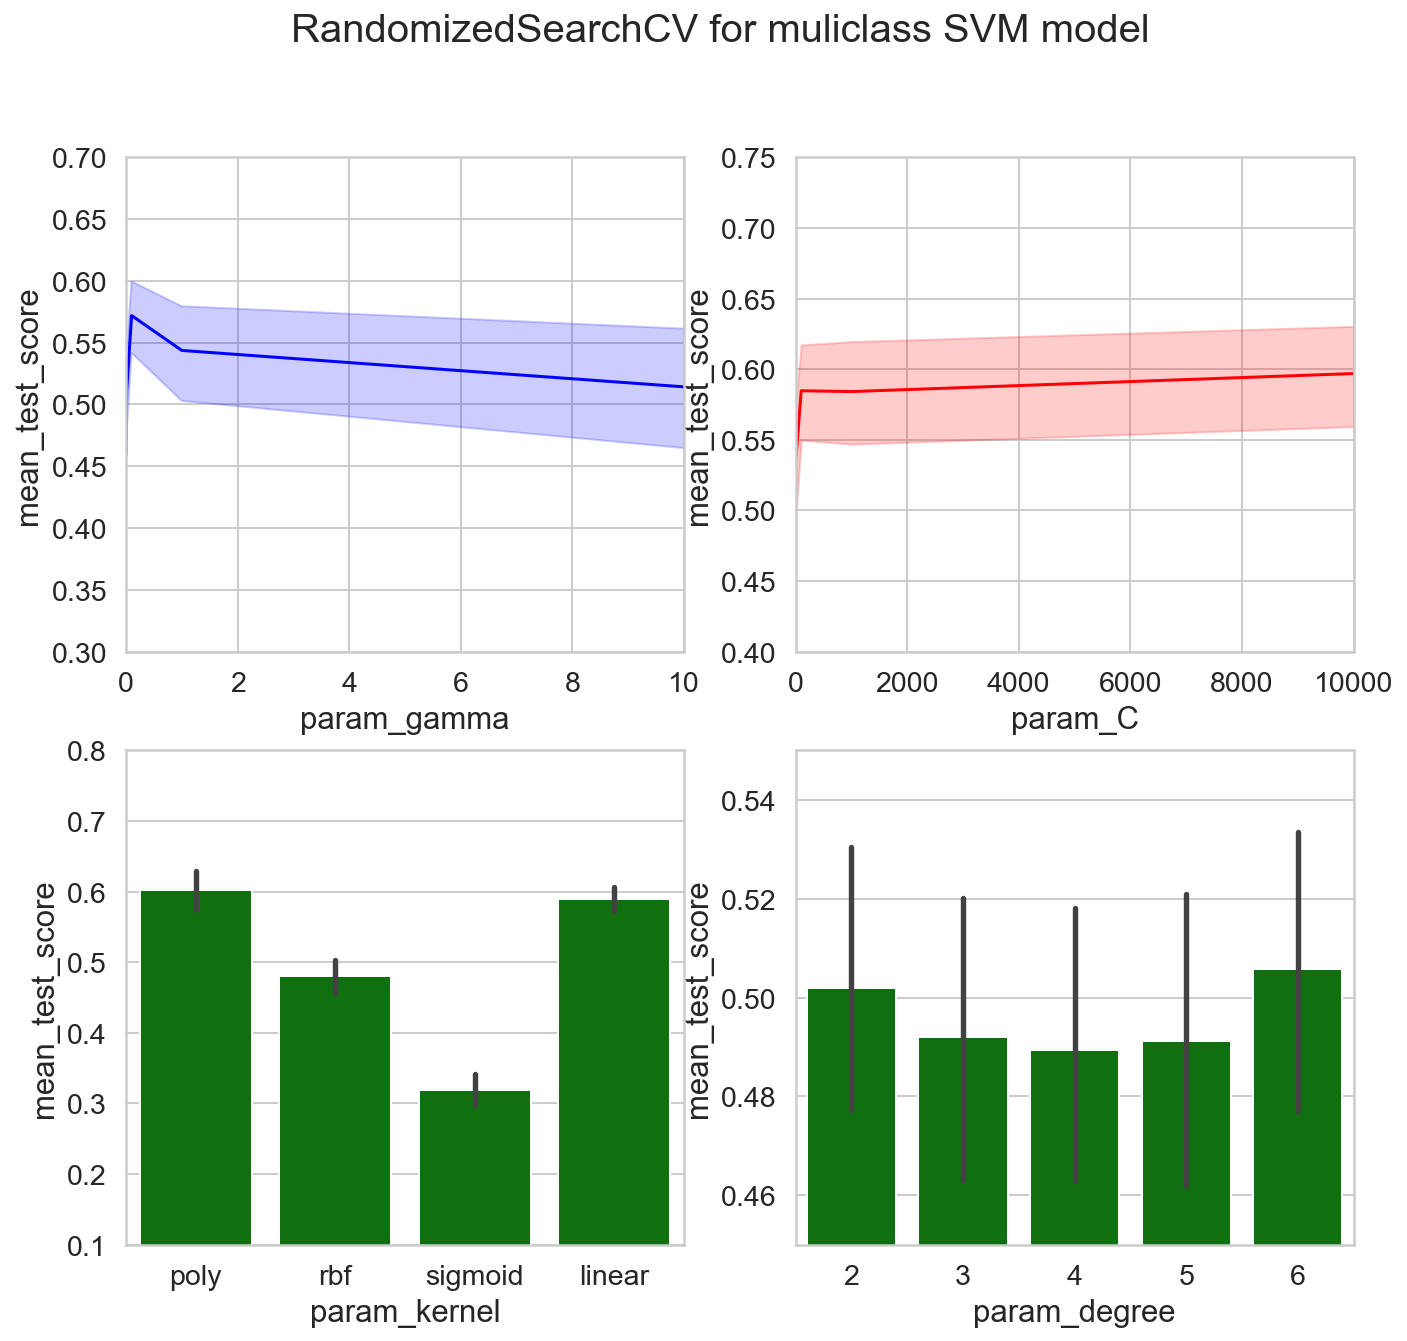

In [111]:
#Create pd.DataFrame to store test results for each parameter
randomsearch_svm_mul_tune_df = pd.DataFrame(randomsearch_svm_mul_tune.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
#Visualize test results 
fig, axs = plt.subplots(ncols=2, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.3)
fig.set_size_inches(11,10)
fig.suptitle('RandomizedSearchCV for muliclass SVM model', size = 20)

sns.lineplot(x = 'param_C', y = 'mean_test_score', data = randomsearch_svm_mul_tune_df, ax = axs[0,1],color='red')
axs[0,1].set_ylim([.40,.75])
axs[0,1].set_xlim([0, 10000])

sns.lineplot(x = 'param_gamma', y = 'mean_test_score', data = randomsearch_svm_mul_tune_df, ax = axs[0,0],color='blue')
axs[0,0].set_ylim([.30, .70])
axs[0,0].set_xlim([0, 10])

sns.barplot(x = 'param_kernel', y = 'mean_test_score', data = randomsearch_svm_mul_tune_df, ax = axs[1,0],color='green')
axs[1,0].set_ylim([.10, .80])

sns.barplot(x = 'param_degree', y = 'mean_test_score', data = randomsearch_svm_mul_tune_df, ax = axs[1,1],color='green')
axs[1,1].set_ylim([.45, .55])

plt.savefig('svm_mul_tune.png', bbox_inches = 'tight')
plt.show()

In [119]:
#Calculation Time: 12sec
#Set-up for GridSearchCV.
kernel = ['poly']
C = np.arange(9900,10000,10)
gamma = [0.0001, 0.001, 0.01, 0.1, 1, 2]
degree = [2,3,6]
param_grid_svm_mul_tune = {'kernel': kernel, 'C': C, 'gamma': gamma, 'degree': degree}
#Execute GridSearchCV with the parameters defined above to find best estimators
gridsearch_svm_mul_tune = GridSearchCV(svm_mul_tune, param_grid_svm_mul_tune, cv = cv, scoring = 'recall_weighted', verbose = verbose, n_jobs = -1).fit(x_trainval_resample, y_trainval_resample_arr.ravel())
#Create new SVM estimator with best estimators and create predictions on x_test
svm_mul_tune = gridsearch_svm_mul_tune.best_estimator_
y_pred_svm_mul_tune = svm_mul_tune.predict(x_test_mul_norm)

In [116]:
gridsearch_svm_mul_tune.best_estimator_

SVC(C=9900, cache_size=3000, class_weight='balanced', degree=6, gamma=0.1,
    kernel='poly', random_state=14)

### Baseline SVM model with PCA reduced dimensionality

In [117]:
#Calculation Time: 1sec
y_pred_svm_mul_pca = SVC(random_state = random_state, cache_size = cache_size, decision_function_shape = 'ovr', class_weight = 'balanced').fit(x_trainval_resample_pca, y_trainval_resample_arr).predict(x_test_mul_norm_pca)

### SVM model with parameter tuning and PCA reduced dimensionality

In [122]:
%config InlineBackend.figure_formats = set(['retina'])
#Set up for RandomizedSearchCV, which is used to identify relevant ranges for each parameter
#Calculation Time: 15min
kernel = ['linear', 'rbf', 'sigmoid', 'poly']
C = 10. ** np.arange(-4,5)
gamma = 10. ** np.arange(-4,5)
degree = [2,3,4,5,6]

svm_mul_tune_pca = SVC(random_state = random_state, cache_size = cache_size, decision_function_shape = 'ovr', class_weight = 'balanced')
param_grid_svm_mul_tune_pca = {'kernel': kernel, 'C': C, 'gamma': gamma, 'degree': degree}
#Execute RandomizedSearchCV
randomsearch_svm_mul_tune_pca = RandomizedSearchCV(svm_mul_tune_pca, param_grid_svm_mul_tune_pca, n_iter = 1000, cv = cv, verbose = verbose, n_jobs = -1, random_state = random_state, scoring = 'recall_weighted').fit(x_trainval_resample_pca, y_trainval_resample_arr)                              

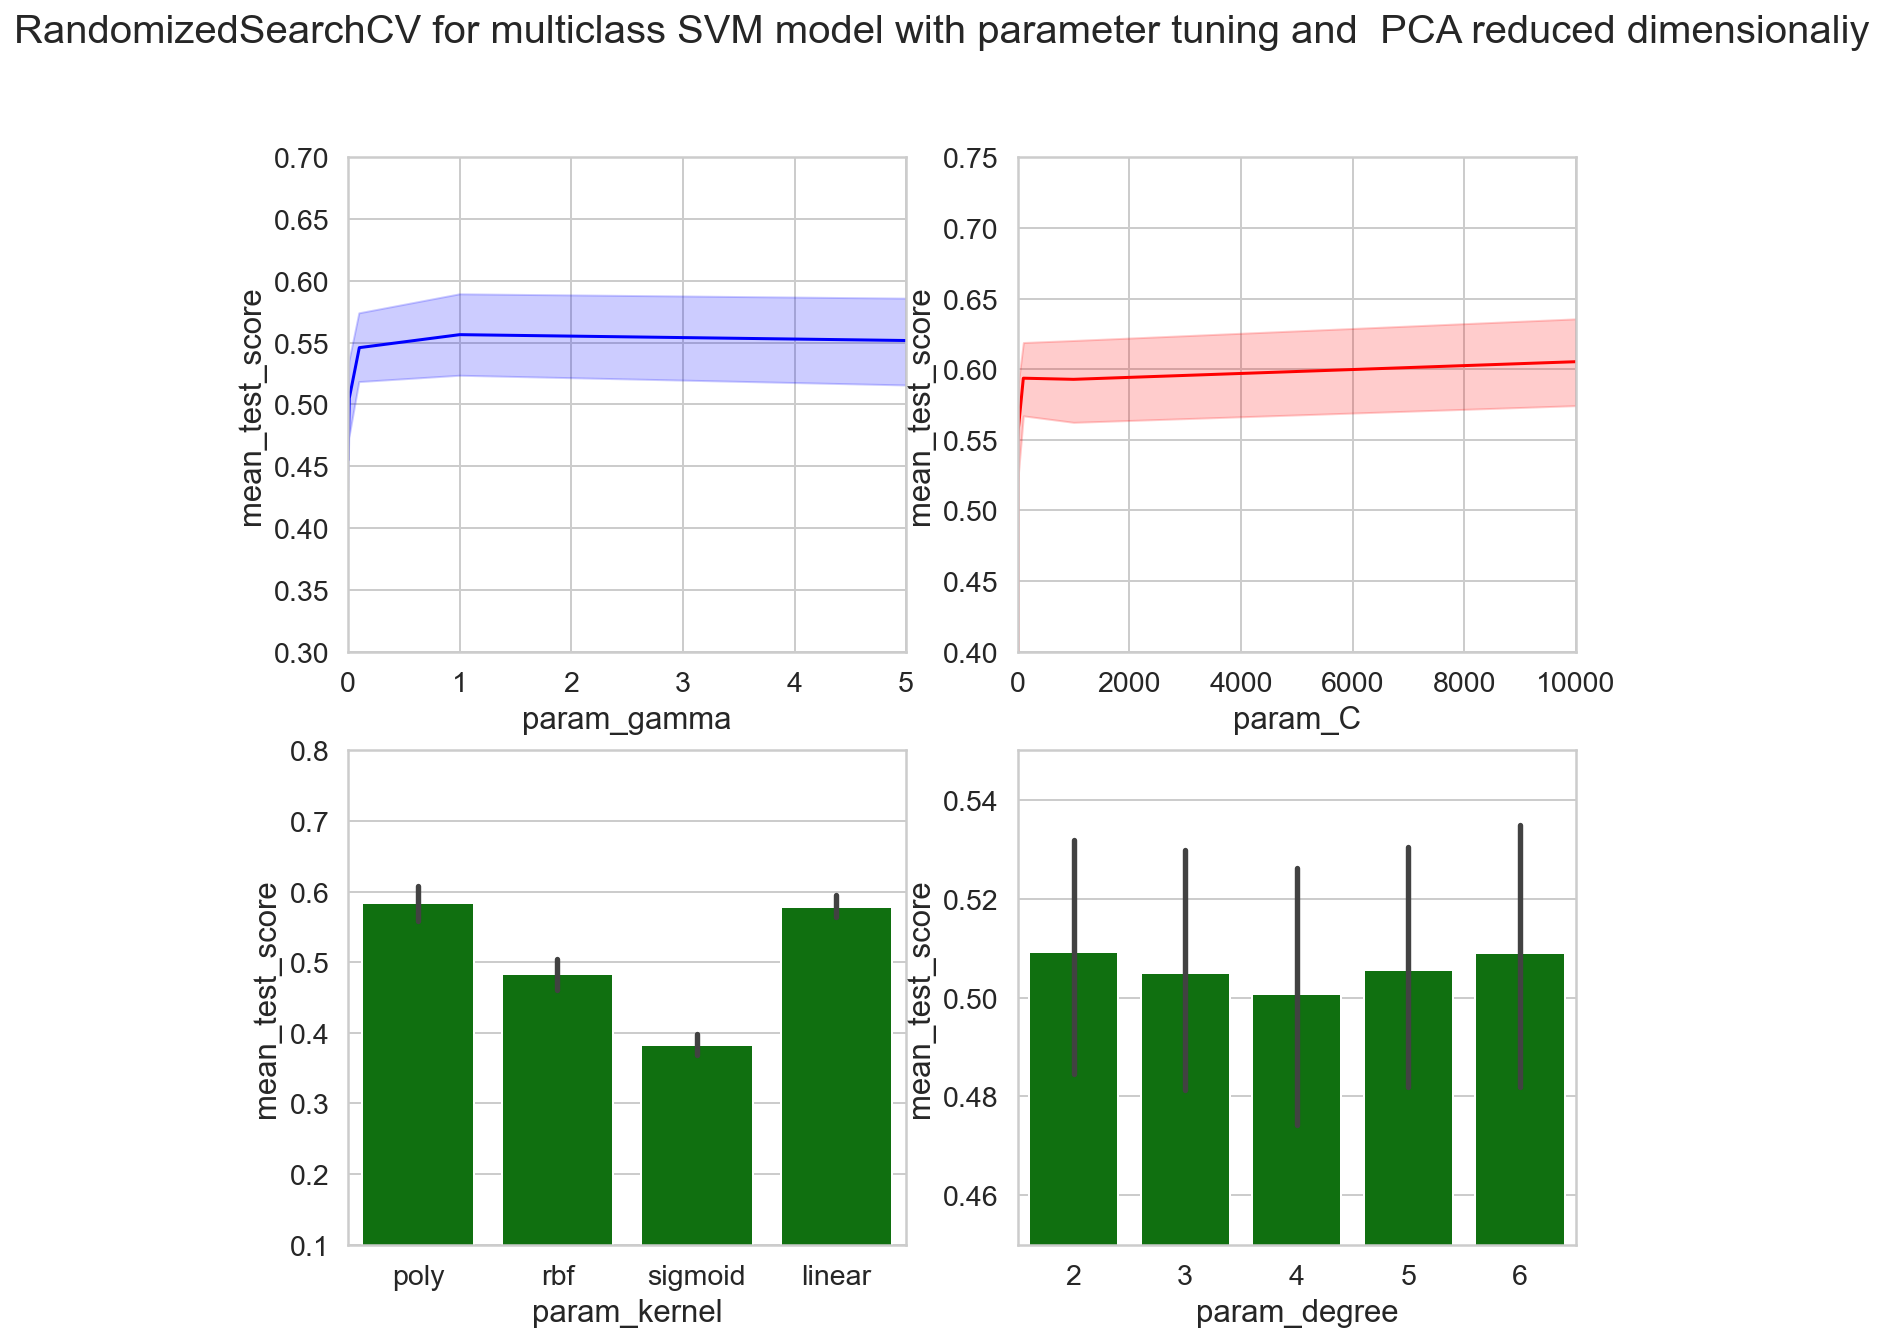

In [128]:
#Create pd.DataFrame to store test results for each parameter
randomsearch_svm_mul_tune_pca_df = pd.DataFrame(randomsearch_svm_mul_tune_pca.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
#Visualize test results 
fig, axs = plt.subplots(ncols=2, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.3)
fig.set_size_inches(11,10)
fig.suptitle('RandomizedSearchCV for multiclass SVM model with parameter tuning and  PCA reduced dimensionaliy', size = 20)

sns.lineplot(x = 'param_C', y = 'mean_test_score', data = randomsearch_svm_mul_tune_pca_df, ax = axs[0,1],color='red')
axs[0,1].set_ylim([.40,.75])
axs[0,1].set_xlim([0, 10000])

sns.lineplot(x = 'param_gamma', y = 'mean_test_score', data = randomsearch_svm_mul_tune_pca_df, ax = axs[0,0],color='blue')
axs[0,0].set_ylim([.30, .70])
axs[0,0].set_xlim([0, 5])

sns.barplot(x = 'param_kernel', y = 'mean_test_score', data = randomsearch_svm_mul_tune_pca_df, ax = axs[1,0],color='green')
axs[1,0].set_ylim([.10, .80])

sns.barplot(x = 'param_degree', y = 'mean_test_score', data = randomsearch_svm_mul_tune_pca_df, ax = axs[1,1],color='green')
axs[1,1].set_ylim([.45, .55])

plt.savefig('svm_mul_tune_pca.png', bbox_inches = 'tight')
plt.show()

In [131]:
#GridSearchCV Set-up
#Calculation Time: 1min
kernel = ['poly']
C = np.arange(9900,10000,10)
gamma = np.arange(1,5,0.1)
degree = [2,6]
param_grid_svm_mul_tune = {'kernel': kernel, 'C': C, 'gamma': gamma, 'degree': degree}
#Execute GridSearchCV with the parameters defined above to find best estimators
gridsearch_svm_mul_tune_pca = GridSearchCV(svm_mul_tune_pca, param_grid_svm_mul_tune, cv = cv, scoring = 'recall_weighted', verbose = verbose, n_jobs = -1).fit(x_trainval_resample_pca, y_trainval_resample_arr)
#Create new SVM estimator with best estimators and create predictions on x_test
svm_mul_tune_pca = gridsearch_svm_mul_tune_pca.best_estimator_
y_pred_svm_mul_tune_pca = svm_mul_tune_pca.predict(x_test_mul_norm_pca)

In [132]:
gridsearch_svm_mul_tune_pca.best_estimator_

SVC(C=9900, cache_size=3000, class_weight='balanced', degree=6, gamma=1.0,
    kernel='poly', random_state=14)

### Performance Metrics: SVM for multiclass classification

In [133]:
#Confusion matrix
conf_matrix_svm_mul_base = pd.DataFrame(confusion_matrix(y_test_mul, y_pred_svm_mul_base), index = ['actually healthy 0', 'actually ill 1', 'actually ill 2', 'actually ill 3', 'actually ill 4'], columns = ['predicted as healthy 0', 'predicted as ill 1', 'actually ill 2', 'actually ill 3', 'actually ill 4'])
conf_matrix_svm_mul_tune = pd.DataFrame(confusion_matrix(y_test_mul, y_pred_svm_mul_tune), index = ['actually healthy 0', 'actually ill 1', 'actually ill 2', 'actually ill 3', 'actually ill 4'], columns = ['predicted as healthy 0', 'predicted as ill 1', 'actually ill 2', 'actually ill 3', 'actually ill 4'])
conf_matrix_svm_mul_pca = pd.DataFrame(confusion_matrix(y_test_mul, y_pred_svm_mul_pca), index = ['actually healthy 0', 'actually ill 1', 'actually ill 2', 'actually ill 3', 'actually ill 4'], columns = ['predicted as healthy 0', 'predicted as ill 1', 'actually ill 2', 'actually ill 3', 'actually ill 4'])
conf_matrix_svm_mul_tune_pca = pd.DataFrame(confusion_matrix(y_test_mul, y_pred_svm_mul_tune_pca), index = ['actually healthy 0', 'actually ill 1', 'actually ill 2', 'actually ill 3', 'actually ill 4'], columns = ['predicted as healthy 0', 'predicted as ill 1', 'actually ill 2', 'actually ill 3', 'actually ill 4'])
#Classification report
class_report_svm_mul_base = metrics.classification_report(y_test_mul, y_pred_svm_mul_base, zero_division = 0)
class_report_svm_mul_tune = metrics.classification_report(y_test_mul, y_pred_svm_mul_tune, zero_division = 0)
class_report_svm_mul_pca = metrics.classification_report(y_test_mul, y_pred_svm_mul_pca, zero_division = 0)
class_report_svm_mul_tune_pca = metrics.classification_report(y_test_mul, y_pred_svm_mul_tune_pca, zero_division = 0)
#recall score
recall_svm_mul_base = metrics.recall_score(y_test_mul, y_pred_svm_mul_base, average = 'weighted')
recall_svm_mul_tune = metrics.recall_score(y_test_mul, y_pred_svm_mul_tune, average = 'weighted')
recall_svm_mul_pca = metrics.recall_score(y_test_mul, y_pred_svm_mul_pca, average = 'weighted')
recall_svm_mul_tune_pca = metrics.recall_score(y_test_mul, y_pred_svm_mul_tune_pca, average = 'weighted')
#precision score
precision_svm_mul_base = metrics.precision_score(y_test_mul, y_pred_svm_mul_base, average = 'weighted')
precision_svm_mul_tune = metrics.precision_score(y_test_mul, y_pred_svm_mul_tune, average = 'weighted')
precision_svm_mul_pca = metrics.precision_score(y_test_mul, y_pred_svm_mul_pca, average = 'weighted')
precision_svm_mul_tune_pca = metrics.precision_score(y_test_mul, y_pred_svm_mul_tune_pca, average = 'weighted')
#fscore
fscore_svm_mul_base = metrics.f1_score(y_test_mul, y_pred_svm_mul_base, average = 'weighted')
fscore_svm_mul_tune = metrics.f1_score(y_test_mul, y_pred_svm_mul_tune, average = 'weighted')
fscore_svm_mul_pca = metrics.f1_score(y_test_mul, y_pred_svm_mul_tune, average = 'weighted')
fscore_svm_mul_tune_pca = metrics.f1_score(y_test_mul, y_pred_svm_mul_tune, average = 'weighted')

C:\Users\maxhe\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [137]:
print("Recall scores:")
print("Baseline SVM: {:.2f}%".format(recall_svm_mul_base*100))
print("Baseline SVM with PCA reduced dimensionality: {:.2f}%".format(recall_svm_mul_pca*100))
print("SVM with parameter tuning: {:.2f}%".format(recall_svm_mul_tune*100))
print("SVM with parameter tuning and PCA reduced dimensionality: {:.2f}%".format(recall_svm_mul_tune_pca*100))

Recall scores:
Baseline SVM: 42.22%
Baseline SVM with PCA reduced dimensionality: 43.33%
SVM with parameter tuning: 50.00%
SVM with parameter tuning and PCA reduced dimensionality: 40.00%


In [136]:
print("Confusion Matrix:")
print("Baseline SVM:")
display(conf_matrix_svm_mul_base)
print(class_report_svm_mul_base)
print("Baseline SVM with PCA reduced dimensionality:")
display(conf_matrix_svm_mul_pca)
print(class_report_svm_mul_pca)
print("SVM with parameter tuning:")
display(conf_matrix_svm_mul_tune)
print(class_report_svm_mul_tune)
print("SVM with parameter tuning and PCA reduced dimensionality:")
display(conf_matrix_svm_mul_tune_pca)
print(class_report_svm_mul_tune_pca)

Confusion Matrix:
Baseline SVM:


,predicted as healthy 0,predicted as ill 1,actually ill 2,actually ill 3,actually ill 4
actually healthy 0,34,13,1,0,0
actually ill 1,4,2,8,2,0
actually ill 2,3,3,2,2,1
actually ill 3,2,2,6,0,1
actually ill 4,0,1,0,3,0


              precision    recall  f1-score   support

           0       0.79      0.71      0.75        48
           1       0.10      0.12      0.11        16
           2       0.12      0.18      0.14        11
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         4

    accuracy                           0.42        90
   macro avg       0.20      0.20      0.20        90
weighted avg       0.45      0.42      0.44        90

Baseline SVM with PCA reduced dimensionality:


,predicted as healthy 0,predicted as ill 1,actually ill 2,actually ill 3,actually ill 4
actually healthy 0,32,15,1,0,0
actually ill 1,4,2,8,2,0
actually ill 2,3,2,2,3,1
actually ill 3,1,2,5,2,1
actually ill 4,0,1,0,2,1


              precision    recall  f1-score   support

           0       0.80      0.67      0.73        48
           1       0.09      0.12      0.11        16
           2       0.12      0.18      0.15        11
           3       0.22      0.18      0.20        11
           4       0.33      0.25      0.29         4

    accuracy                           0.43        90
   macro avg       0.31      0.28      0.29        90
weighted avg       0.50      0.43      0.46        90

SVM with parameter tuning:


,predicted as healthy 0,predicted as ill 1,actually ill 2,actually ill 3,actually ill 4
actually healthy 0,33,14,1,0,0
actually ill 1,1,9,5,1,0
actually ill 2,5,3,2,1,0
actually ill 3,4,3,3,1,0
actually ill 4,0,3,0,1,0


              precision    recall  f1-score   support

           0       0.77      0.69      0.73        48
           1       0.28      0.56      0.38        16
           2       0.18      0.18      0.18        11
           3       0.25      0.09      0.13        11
           4       0.00      0.00      0.00         4

    accuracy                           0.50        90
   macro avg       0.30      0.30      0.28        90
weighted avg       0.51      0.50      0.49        90

SVM with parameter tuning and PCA reduced dimensionality:


,predicted as healthy 0,predicted as ill 1,actually ill 2,actually ill 3,actually ill 4
actually healthy 0,27,19,2,0,0
actually ill 1,3,5,6,2,0
actually ill 2,2,5,2,2,0
actually ill 3,2,5,2,2,0
actually ill 4,1,2,1,0,0


              precision    recall  f1-score   support

           0       0.77      0.56      0.65        48
           1       0.14      0.31      0.19        16
           2       0.15      0.18      0.17        11
           3       0.33      0.18      0.24        11
           4       0.00      0.00      0.00         4

    accuracy                           0.40        90
   macro avg       0.28      0.25      0.25        90
weighted avg       0.50      0.40      0.43        90



In [45]:
print("Classification Report:")
print("Baseline SVM:")
print(class_report_svm_mul_base)
print("Baseline SVM with PCA reduced dimensionality:")
print(class_report_svm_mul_pca)
print("SVM with parameter tuning:")
print(class_report_svm_mul_tune)
print("SVM with parameter tuning and PCA reduced dimensionality:")
print(class_report_svm_mul_tune_pca)

Classification Report:
Baseline SVM:
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        48
           1       0.15      0.19      0.17        16
           2       0.12      0.18      0.14        11
           3       0.00      0.00      0.00        11
           4       0.33      0.25      0.29         4

    accuracy                           0.46        90
   macro avg       0.28      0.27      0.27        90
weighted avg       0.48      0.46      0.47        90

Baseline SVM with PCA reduced dimensionality:
              precision    recall  f1-score   support

           0       0.78      0.75      0.77        48
           1       0.11      0.12      0.12        16
           2       0.12      0.18      0.15        11
           3       0.00      0.00      0.00        11
           4       0.33      0.25      0.29         4

    accuracy                           0.46        90
   macro avg       0.27      0.26      0.26     

## K-Nearest Neighbor (KNN)

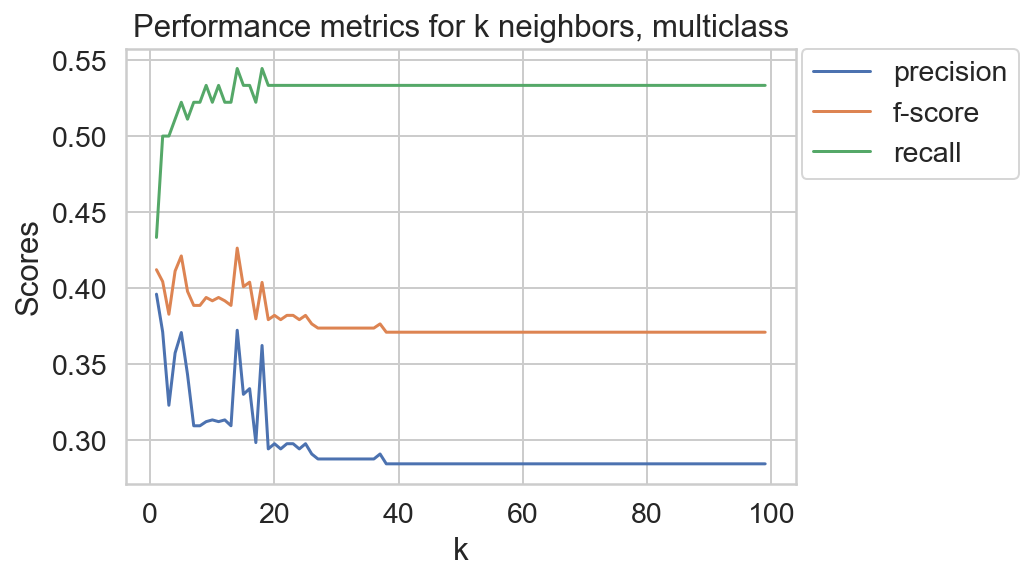

In [170]:
%config InlineBackend.figure_formats = set(['retina'])

k_range = range(1,100)

precision_scores = {}
precision_scores_list = []
recall_scores = {}
recall_scores_list = []
f1_scores = {}
f1_scores_list = []
accuracy_scores = {}
accuracy_scores_list = []

for k in k_range:
    knn_test = KNeighborsClassifier(n_neighbors = k)
    knn_test.fit(x_trainval_mul, y_trainval_mul)
    y_pred = knn_test.predict(x_test_mul)
    precision_scores[k] = metrics.precision_score(y_test_mul, y_pred, average = 'weighted', zero_division = 0)
    precision_scores_list.append(metrics.precision_score(y_test_mul, y_pred, average = 'weighted', zero_division = 0))
    recall_scores[k] = metrics.recall_score(y_test_mul, y_pred, average = 'weighted', zero_division = 0)
    recall_scores_list.append(metrics.recall_score(y_test_mul, y_pred, average = 'weighted', zero_division = 0))
    f1_scores[k] = metrics.f1_score(y_test_mul, y_pred, average = 'weighted', zero_division = 0)
    f1_scores_list.append(metrics.f1_score(y_test_mul, y_pred, average = 'weighted', zero_division = 0))
   

plt.plot(k_range, precision_scores_list, label='precision')
plt.plot(k_range, f1_scores_list, label='f-score')
plt.plot(k_range, recall_scores_list, label='recall')
plt.legend(loc = 'right', bbox_to_anchor = (1.355, 0.85))
plt.title('Performance metrics for k neighbors, multiclass')
plt.xlabel('k')
plt.ylabel('Scores')
plt.savefig('knn_mul_test.png', bbox_inches = 'tight')

### Baseline KNN model

In [139]:
#Calculation Time: 1sec
y_pred_knn_mul_base = KNeighborsClassifier(n_jobs = -1).fit(x_trainval_resample, y_trainval_resample_arr).predict(x_test_mul_norm)

### KNN model with parameter tuning

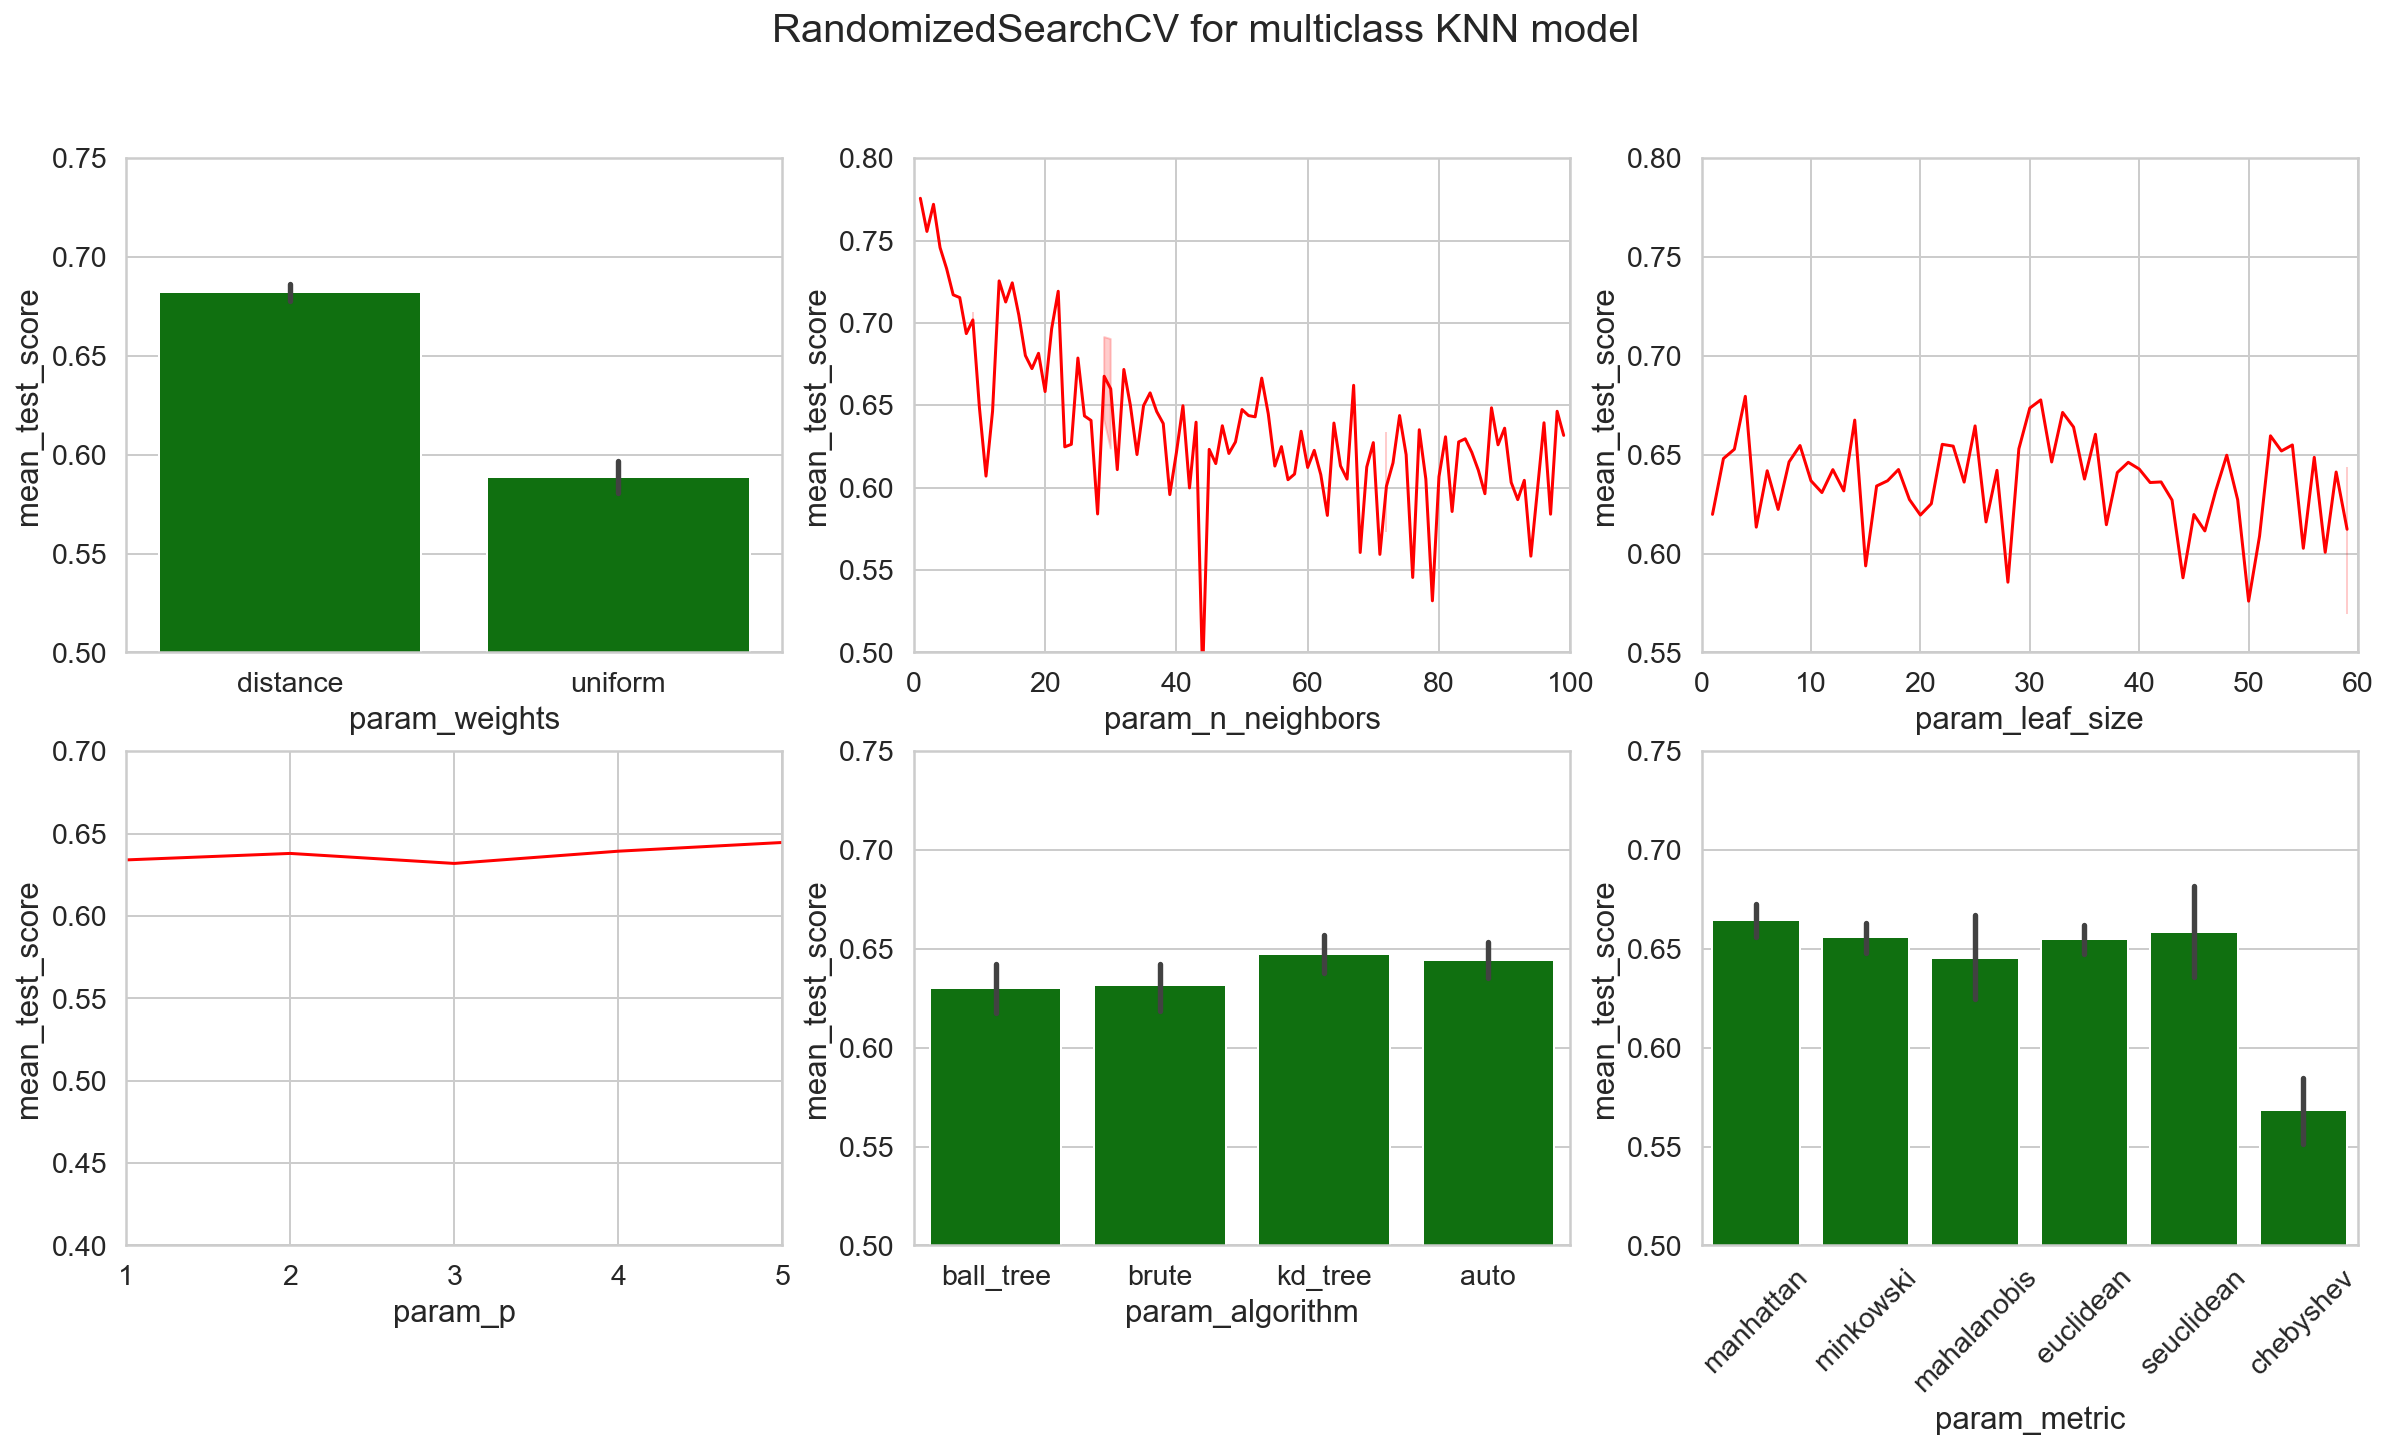

In [147]:
%config InlineBackend.figure_formats = set(['retina'])
#RandomSearchCV Set-up
#Calculation Time: 74.3sec
n_neighbors = np.arange(1,100,1)
leaf_size = np.arange(1,60,1)
p = np.arange (1,6,1)
weights = ["distance", "uniform"]
algorithm = ["auto", "ball_tree", "kd_tree", "brute"]
metric = ["euclidean", "manhattan", "chebyshev", "minkowski", "seuclidean", "mahalanobis"]

knn_mul_tune = KNeighborsClassifier()
param_grid_knn_mul_tune = {'n_neighbors': n_neighbors, 'weights': weights, 'algorithm': algorithm, 'metric': metric, 'p': p, 'leaf_size': leaf_size}
#Execute RandomizedSearchCV
randomsearch_knn_mul_tune = RandomizedSearchCV(knn_mul_tune, param_grid_knn_mul_tune, n_iter = 1000, cv = cv, verbose = verbose, n_jobs = -1, random_state = random_state, scoring = 'recall_weighted').fit(x_trainval_resample, y_trainval_resample_arr)
#save randomsearch results to pd.DataFrame for future use
randomsearch_knn_mul_tune_df = pd.DataFrame(randomsearch_knn_mul_tune.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
#Visualize results
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.3)
fig.set_size_inches(20,10)
fig.suptitle('RandomizedSearchCV for multiclass KNN model', size = 20)

sns.barplot(x = 'param_weights', y = 'mean_test_score', data = randomsearch_knn_mul_tune_df, ax = axs[0,0],color='green')
axs[0,0].set_ylim([.50, .75])

sns.lineplot(x = 'param_n_neighbors', y = 'mean_test_score', data = randomsearch_knn_mul_tune_df, ax = axs[0,1],color='red')
axs[0,1].set_ylim([.50,.80])
axs[0,1].set_xlim([0, 100])

sns.lineplot(x = 'param_leaf_size', y = 'mean_test_score', data = randomsearch_knn_mul_tune_df, ax = axs[0,2],color='red')
axs[0,2].set_ylim([.55,.80])
axs[0,2].set_xlim([0, 60])

sns.lineplot(x = 'param_p', y = 'mean_test_score', data = randomsearch_knn_mul_tune_df, ax = axs[1,0],color='red')
axs[1,0].set_ylim([.4,.7])
axs[1,0].set_xlim([1, 5])

sns.barplot(x = 'param_algorithm', y = 'mean_test_score', data = randomsearch_knn_mul_tune_df, ax = axs[1,1],color='green')
axs[1,1].set_ylim([.50, .75])

b = sns.barplot(x = 'param_metric', y = 'mean_test_score', data = randomsearch_knn_mul_tune_df, ax = axs[1,2],color='green')
b.set_xticklabels(b.get_xticklabels(), rotation = 45)
axs[1,2].set_ylim([.50, .75])

plt.savefig('knn_mul_tune.png', bbox_inches = 'tight')
plt.show()

In [158]:
#Set up for gridSearchCV
#Calculation Time: 16sec
n_neighbors = np.arange(0,20,1)
leaf_size = np.arange(31,40,1)
p = [2] #2 is the default value
weights = ["distance"]
algorithm = ["auto", "kd_tree"]
metric = ["manhattan", "seuclidean", "minkowski"]
knn_mul_tune = KNeighborsClassifier()
param_grid_knn_mul_tune = {'n_neighbors': n_neighbors, 'weights': weights, 'algorithm': algorithm, 'metric': metric, 'p': p, 'leaf_size': leaf_size}
#Execute GridSearchCV
gridsearch_knn_mul_tune = GridSearchCV(knn_mul_tune, param_grid_knn_mul_tune, cv = cv, n_jobs = -1, verbose = verbose, scoring = 'recall_weighted')
#Create new SVM estimator with best estimators and create predictions on x_test
gridsearch_knn_mul_tune.fit(x_trainval_resample, y_trainval_resample_arr)
knn_mul_tune_be = gridsearch_knn_mul_tune.best_estimator_
y_pred_knn_mul_tune = knn_mul_tune_be.predict(x_test_mul_norm)

In [150]:
gridsearch_knn_mul_tune.best_estimator_

KNeighborsClassifier(leaf_size=31, metric='manhattan', n_neighbors=3,
                     weights='distance')

### Baseline KNN model with PCA reduced dimensionality

In [151]:
#Calculation Time: 1sec
y_pred_knn_mul_pca = KNeighborsClassifier(n_jobs = -1).fit(x_trainval_resample_pca, y_trainval_resample_arr).predict(x_test_mul_norm_pca)

### KNN model with parameter tuning and PCA reduced dimensionality

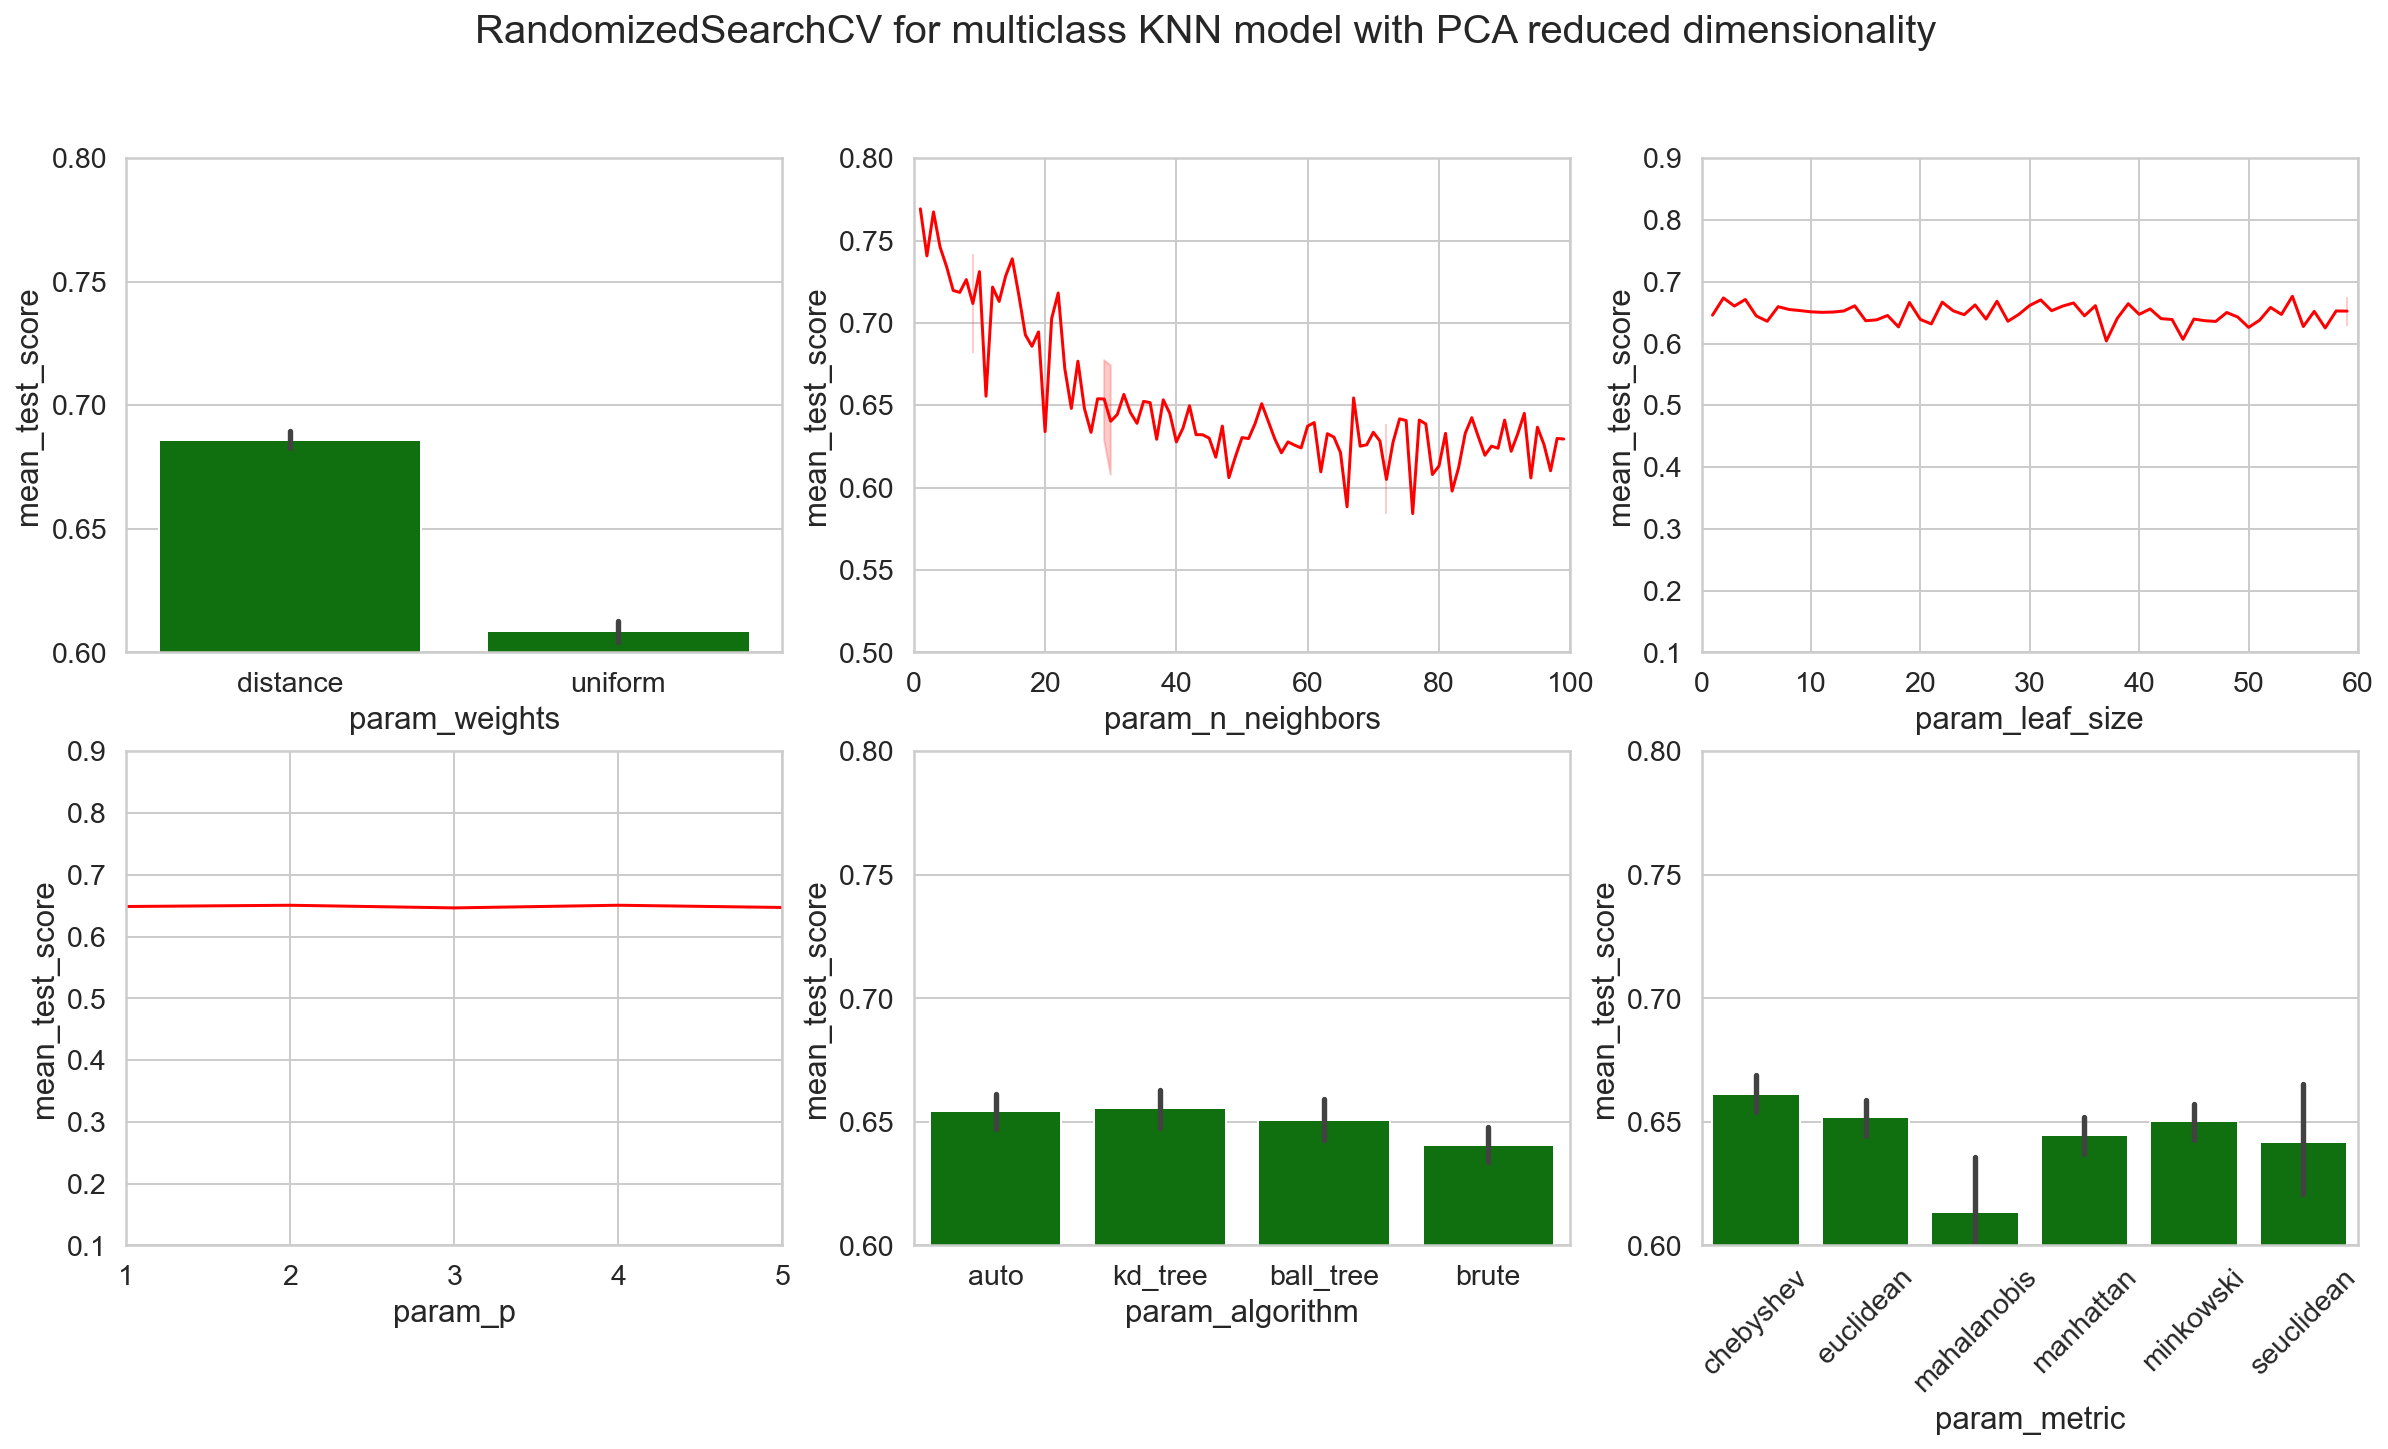

In [154]:
%config InlineBackend.figure_formats = set(['retina'])
#RandomSearchCV Set-up
#Calculation Time: 74.3sec
n_neighbors = np.arange(1,100,1)
leaf_size = np.arange(1,60,1)
p = np.arange (1,6,1)
weights = ["distance", "uniform"]
algorithm = ["auto", "ball_tree", "kd_tree", "brute"]
metric = ["euclidean", "manhattan", "chebyshev", "minkowski", "seuclidean", "mahalanobis"]

knn_mul_tune_pca = KNeighborsClassifier()
param_grid_knn_mul_tune_pca = {'n_neighbors': n_neighbors, 'weights': weights, 'algorithm': algorithm, 'metric': metric, 'p': p, 'leaf_size': leaf_size}
#Execute RandomizedSearchCV
randomsearch_knn_mul_tune_pca = RandomizedSearchCV(knn_mul_tune_pca, param_grid_knn_mul_tune_pca, n_iter = 1000, cv = cv, verbose = verbose, n_jobs = -1, random_state = random_state, scoring = 'recall_weighted').fit(x_trainval_resample_pca, y_trainval_resample_arr)
#save randomsearch results to pd.DataFrame for future use
randomsearch_knn_mul_tune_pca_df = pd.DataFrame(randomsearch_knn_mul_tune_pca.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
#Visualize results
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.3)
fig.set_size_inches(20,10)
fig.suptitle('RandomizedSearchCV for multiclass KNN model with PCA reduced dimensionality', size = 20)

sns.barplot(x = 'param_weights', y = 'mean_test_score', data = randomsearch_knn_mul_tune_pca_df, ax = axs[0,0],color='green')
axs[0,0].set_ylim([.60, .80])

sns.lineplot(x = 'param_n_neighbors', y = 'mean_test_score', data = randomsearch_knn_mul_tune_pca_df, ax = axs[0,1],color='red')
axs[0,1].set_ylim([.50,.80])
axs[0,1].set_xlim([0, 100])

sns.lineplot(x = 'param_leaf_size', y = 'mean_test_score', data = randomsearch_knn_mul_tune_pca_df, ax = axs[0,2],color='red')
axs[0,2].set_ylim([.10,.90])
axs[0,2].set_xlim([0, 60])

sns.lineplot(x = 'param_p', y = 'mean_test_score', data = randomsearch_knn_mul_tune_pca_df, ax = axs[1,0],color='red')
axs[1,0].set_ylim([.10,.90])
axs[1,0].set_xlim([1, 5])

sns.barplot(x = 'param_algorithm', y = 'mean_test_score', data = randomsearch_knn_mul_tune_pca_df, ax = axs[1,1],color='green')
axs[1,1].set_ylim([.60, .80])

b = sns.barplot(x = 'param_metric', y = 'mean_test_score', data = randomsearch_knn_mul_tune_pca_df, ax = axs[1,2],color='green')
b.set_xticklabels(b.get_xticklabels(), rotation = 45)
axs[1,2].set_ylim([.60, .80])

plt.savefig('knn_mul_tune_pca.png', bbox_inches = 'tight')
plt.show()

In [156]:
#Set up for gridSearchCV
#Calculation Time: 11sec
n_neighbors = np.arange(0,20,1)
weights = ["distance"]
algorithm = ["ball_tree", "kd_tree"]
metric = ["euclidean", "minkowski", "chebyshev"]
leaf_size = np.arange(10,20,1)
p = [2] #default value
knn_mul_tune_pca = KNeighborsClassifier()
param_grid_knn_mul_tune_pca = {'n_neighbors': n_neighbors, 'weights': weights, 'algorithm': algorithm, 'metric': metric, 'p': p, 'leaf_size': leaf_size}
#Execute GridSearchCV
gridsearch_knn_mul_tune_pca = GridSearchCV(knn_mul_tune_pca, param_grid_knn_mul_tune_pca, cv = cv, n_jobs = -1, verbose = verbose, scoring = 'recall_weighted').fit(x_trainval_resample_pca, y_trainval_resample_arr)
#Create new SVM estimator with best estimators and create predictions on x_test
knn_mul_tune_pca = gridsearch_knn_mul_tune_pca.best_estimator_
y_pred_knn_mul_tune_pca = knn_mul_tune_pca.predict(x_test_mul_norm_pca)

In [157]:
gridsearch_knn_mul_tune_pca.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, metric='chebyshev',
                     weights='distance')

### Performance Metrics: KNN for multiclass classification

In [159]:
#Confusion matrix:
conf_matrix_knn_mul_base = pd.DataFrame(confusion_matrix(y_test_mul, y_pred_knn_mul_base), index = ['actually healthy 0', 'actually ill 1', 'actually ill 2', 'actually ill 3', 'actually ill 4'], columns = ['predicted as healthy 0', 'predicted as ill 1', 'actually ill 2', 'actually ill 3', 'actually ill 4'])
conf_matrix_knn_mul_tune = pd.DataFrame(confusion_matrix(y_test_mul, y_pred_knn_mul_tune), index = ['actually healthy 0', 'actually ill 1', 'actually ill 2', 'actually ill 3', 'actually ill 4'], columns = ['predicted as healthy 0', 'predicted as ill 1', 'actually ill 2', 'actually ill 3', 'actually ill 4'])
conf_matrix_knn_mul_pca = pd.DataFrame(confusion_matrix(y_test_mul, y_pred_knn_mul_pca), index = ['actually healthy 0', 'actually ill 1', 'actually ill 2', 'actually ill 3', 'actually ill 4'], columns = ['predicted as healthy 0', 'predicted as ill 1', 'actually ill 2', 'actually ill 3', 'actually ill 4'])
conf_matrix_knn_mul_tune_pca = pd.DataFrame(confusion_matrix(y_test_mul, y_pred_knn_mul_tune_pca), index = ['actually healthy 0', 'actually ill 1', 'actually ill 2', 'actually ill 3', 'actually ill 4'], columns = ['predicted as healthy 0', 'predicted as ill 1', 'actually ill 2', 'actually ill 3', 'actually ill 4'])
#Classification report:
class_report_knn_mul_base = metrics.classification_report(y_test_mul, y_pred_knn_mul_base, zero_division = 0)
class_report_knn_mul_tune = metrics.classification_report(y_test_mul, y_pred_knn_mul_tune, zero_division = 0)
class_report_knn_mul_pca = metrics.classification_report(y_test_mul, y_pred_knn_mul_pca, zero_division = 0)
class_report_knn_mul_tune_pca = metrics.classification_report(y_test_mul, y_pred_knn_mul_tune_pca, zero_division = 0)
#Recall:
recall_knn_mul_base = metrics.recall_score(y_test_mul, y_pred_knn_mul_base, average = 'weighted')
recall_knn_mul_tune = metrics.recall_score(y_test_mul, y_pred_knn_mul_tune, average = 'weighted')
recall_knn_mul_pca = metrics.recall_score(y_test_mul, y_pred_knn_mul_pca, average = 'weighted')
recall_knn_mul_tune_pca = metrics.recall_score(y_test_mul, y_pred_knn_mul_tune_pca, average = 'weighted')
#Precision:
precision_knn_mul_base = metrics.precision_score(y_test_mul, y_pred_knn_mul_base, average = 'weighted', zero_division = 0)
precision_knn_mul_tune = metrics.precision_score(y_test_mul, y_pred_knn_mul_tune, average = 'weighted', zero_division = 0)
precision_knn_mul_pca = metrics.precision_score(y_test_mul, y_pred_knn_mul_pca, average = 'weighted', zero_division = 0)
precision_knn_mul_tune_pca = metrics.precision_score(y_test_mul, y_pred_knn_mul_tune_pca, average = 'weighted', zero_division = 0)
#Fscore:
fscore_knn_mul_base = metrics.f1_score(y_test_mul, y_pred_knn_mul_base, average = 'weighted')
fscore_knn_mul_tune = metrics.f1_score(y_test_mul, y_pred_knn_mul_tune, average = 'weighted')
fscore_knn_mul_pca = metrics.f1_score(y_test_mul, y_pred_knn_mul_pca, average = 'weighted')
fscore_knn_mul_tune_pca = metrics.f1_score(y_test_mul, y_pred_knn_mul_tune_pca, average = 'weighted')

In [160]:
print("Recall Scores:")
print("Baseline KNN: {:.2f}%".format(recall_knn_mul_base*100))
print("Baseline KNN with PCA reduced dimensionality: {:.2f}%".format(recall_knn_mul_pca*100))
print("KNN with parameter tuning: {:.2f}%".format(recall_knn_mul_tune*100))
print("KNN with parameter tuning and PCA reduced dimensionality: {:.2f}%".format(recall_knn_mul_tune_pca*100))

Recall Scores:
Baseline KNN: 50.00%
Baseline KNN with PCA reduced dimensionality: 50.00%
KNN with parameter tuning: 52.22%
KNN with parameter tuning and PCA reduced dimensionality: 46.67%


In [163]:
print("Confusion Matrix:")
print("Baseline KNN:")
display(conf_matrix_knn_mul_base)
print(class_report_knn_mul_base)
print("Baseline KNN with PCA reduced dimensionality:")
display(conf_matrix_knn_mul_pca)
print(class_report_knn_mul_pca)
print("KNN with parameter tuning:")
display(conf_matrix_knn_mul_tune)
print(class_report_knn_mul_tune)
print("KNN with parameter tuning and PCA reduced dimensionality:")
display(conf_matrix_knn_mul_tune_pca)
print(class_report_knn_mul_tune_pca)

Confusion Matrix:
Baseline KNN:


,predicted as healthy 0,predicted as ill 1,actually ill 2,actually ill 3,actually ill 4
actually healthy 0,38,9,1,0,0
actually ill 1,5,2,7,2,0
actually ill 2,4,0,3,3,1
actually ill 3,2,2,6,1,0
actually ill 4,0,2,1,0,1


              precision    recall  f1-score   support

           0       0.78      0.79      0.78        48
           1       0.13      0.12      0.13        16
           2       0.17      0.27      0.21        11
           3       0.17      0.09      0.12        11
           4       0.50      0.25      0.33         4

    accuracy                           0.50        90
   macro avg       0.35      0.31      0.31        90
weighted avg       0.50      0.50      0.50        90

Baseline KNN with PCA reduced dimensionality:


,predicted as healthy 0,predicted as ill 1,actually ill 2,actually ill 3,actually ill 4
actually healthy 0,37,10,1,0,0
actually ill 1,5,3,6,2,0
actually ill 2,4,1,3,3,0
actually ill 3,2,2,5,1,1
actually ill 4,0,2,1,0,1


              precision    recall  f1-score   support

           0       0.77      0.77      0.77        48
           1       0.17      0.19      0.18        16
           2       0.19      0.27      0.22        11
           3       0.17      0.09      0.12        11
           4       0.50      0.25      0.33         4

    accuracy                           0.50        90
   macro avg       0.36      0.31      0.32        90
weighted avg       0.51      0.50      0.50        90

KNN with parameter tuning:


,predicted as healthy 0,predicted as ill 1,actually ill 2,actually ill 3,actually ill 4
actually healthy 0,40,7,1,0,0
actually ill 1,4,2,7,3,0
actually ill 2,4,1,2,4,0
actually ill 3,3,0,4,2,2
actually ill 4,0,1,1,1,1


              precision    recall  f1-score   support

           0       0.78      0.83      0.81        48
           1       0.18      0.12      0.15        16
           2       0.13      0.18      0.15        11
           3       0.20      0.18      0.19        11
           4       0.33      0.25      0.29         4

    accuracy                           0.52        90
   macro avg       0.33      0.31      0.32        90
weighted avg       0.51      0.52      0.51        90

KNN with parameter tuning and PCA reduced dimensionality:


,predicted as healthy 0,predicted as ill 1,actually ill 2,actually ill 3,actually ill 4
actually healthy 0,33,13,1,0,1
actually ill 1,2,3,6,5,0
actually ill 2,4,2,3,2,0
actually ill 3,1,2,5,2,1
actually ill 4,0,1,2,0,1


              precision    recall  f1-score   support

           0       0.82      0.69      0.75        48
           1       0.14      0.19      0.16        16
           2       0.18      0.27      0.21        11
           3       0.22      0.18      0.20        11
           4       0.33      0.25      0.29         4

    accuracy                           0.47        90
   macro avg       0.34      0.32      0.32        90
weighted avg       0.53      0.47      0.49        90



## Random Forest

### Baseline Random Forest model

In [165]:
#Calculation Time: 1sec
y_pred_rf_mul_base = RandomForestClassifier(random_state = random_state, n_jobs=-1).fit(x_trainval_resample, y_trainval_resample_arr).predict(x_test_mul_norm)

### Random Forest model with parameter tuning

In [169]:
%config InlineBackend.figure_formats = set(['retina'])
#RandomizedSearchCV Set-up
#Calculation Time: 4min
n_estimators = np.arange(1,100,1)
criterion = ["gini", "entropy"]
min_weight_fraction_leaf = [0.1, 0.2, 0.3, 0.4, 0.5]
max_features = ["auto", "sqrt", "log2"]
bootstrap = ["True","False"]
oob_score = ["True", "False"]
rf_mul_tune = RandomForestClassifier(random_state = random_state)
param_grid_rf_mul_tune = {'n_estimators': n_estimators, 'criterion': criterion, 'min_weight_fraction_leaf': min_weight_fraction_leaf, 'max_features': max_features, 'bootstrap': bootstrap, 'oob_score': oob_score}
#Execute RandomizedSearchCV
randomsearch_rf_mul_tune = RandomizedSearchCV(rf_mul_tune, param_grid_rf_mul_tune, n_iter = 1000, cv = cv, verbose = 1, n_jobs = -1, random_state = random_state, scoring = 'recall_weighted').fit(x_trainval_resample, y_trainval_resample_arr)
#save results to pd.DataFrame for future use
randomsearch_rf_mul_tune_df = pd.DataFrame(randomsearch_rf_mul_tune.cv_results_).sort_values('rank_test_score').reset_index(drop=True)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 1724 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 3124 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 4924 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 7124 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 9724 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 10000 out of 10000 | elapsed:  4.0min finished


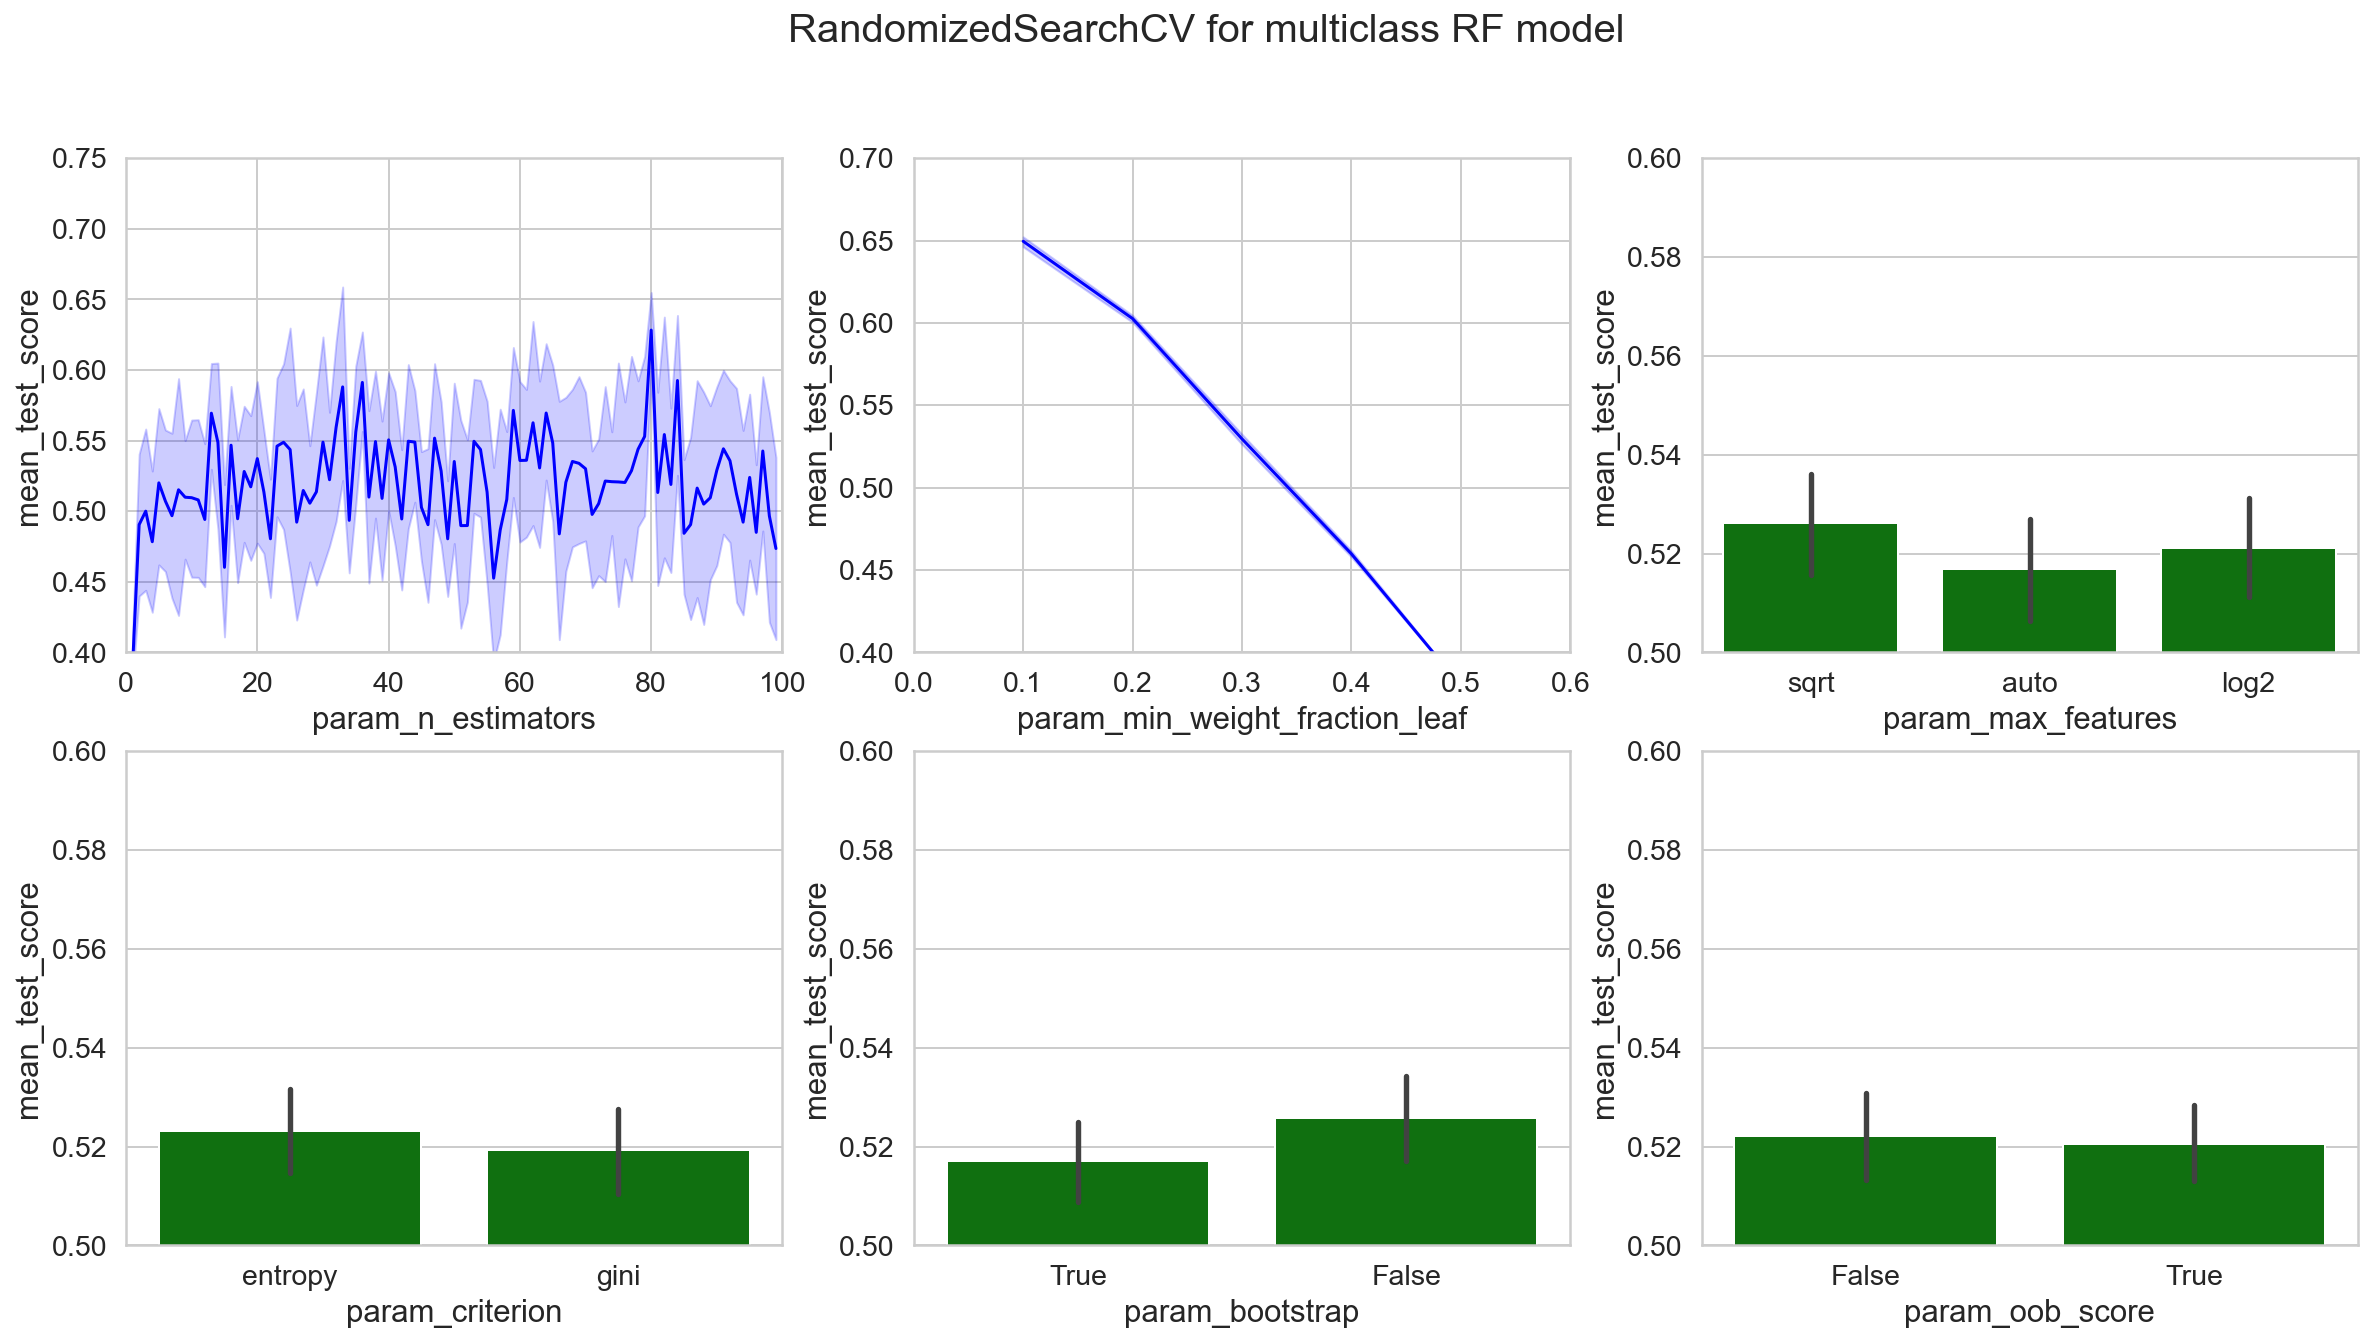

In [174]:
#Visualize results
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.3)
fig.set_size_inches(20,10)
fig.suptitle('RandomizedSearchCV for multiclass RF model', size = 20)

sns.lineplot(x = 'param_n_estimators', y = 'mean_test_score', data = randomsearch_rf_mul_tune_df, ax = axs[0,0], color = 'blue')
axs[0,0].set_ylim([.40,.75])
axs[0,0].set_xlim([0, 100])

sns.lineplot(x = 'param_min_weight_fraction_leaf', y = 'mean_test_score', data = randomsearch_rf_mul_tune_df, ax = axs[0,1], color='blue')
axs[0,1].set_ylim([.40, .70])
axs[0,1].set_xlim([0, 0.6])

sns.barplot(x = 'param_max_features', y = 'mean_test_score', data = randomsearch_rf_mul_tune_df, ax = axs[0,2], color='green')
axs[0,2].set_ylim([.50, .60])

sns.barplot(x = 'param_criterion', y = 'mean_test_score', data = randomsearch_rf_mul_tune_df, ax = axs[1,0], color = 'green')
axs[1,0].set_ylim([.50, .60])

sns.barplot(x = 'param_bootstrap', y = 'mean_test_score', data = randomsearch_rf_mul_tune_df, ax = axs[1,1], color = 'green')
axs[1,1].set_ylim([.50, .60])

sns.barplot(x = 'param_oob_score', y = 'mean_test_score', data = randomsearch_rf_mul_tune_df, ax = axs[1,2], color = 'green')
axs[1,2].set_ylim([.50, .60])

plt.savefig('rf_mul_tune.png', bbox_inches = 'tight')
plt.show()

In [176]:
#GridSearchCV Set-up
#Calculation Time: 10.9min
n_estimators = np.arange(70,90,1)
min_weight_fraction_leaf = [0.1, 0.2]
max_features = ["sqrt"]
criterion = ["entropy"]
bootstrap = ["False"]
oob_score = ["False"]
rf_mul_tune = RandomForestClassifier(random_state = random_state)
param_grid_rf_mul_tune = {'n_estimators': n_estimators, 'criterion': criterion, 'min_weight_fraction_leaf': min_weight_fraction_leaf, 'max_features': max_features, 'bootstrap': bootstrap, 'oob_score': oob_score}
#Execute GridSearchCv
gridsearch_rf_mul_tune = GridSearchCV(rf_mul_tune, param_grid_rf_mul_tune, cv = cv, verbose = 1, n_jobs = -1, scoring = 'recall_weighted').fit(x_trainval_resample, y_trainval_resample_arr)
#Create new RandomForest estimator with best parameters foound in GridSearchCV
rf_mul_tune = gridsearch_rf_mul_tune.best_estimator_
#Make predictions using the new rf estimator
y_pred_rf_mul_tune = rf_mul_tune.predict(x_test_mul_norm)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   18.8s finished


In [177]:
gridsearch_rf_mul_tune.best_estimator_

RandomForestClassifier(bootstrap='False', criterion='entropy',
                       max_features='sqrt', min_weight_fraction_leaf=0.1,
                       n_estimators=71, oob_score='False', random_state=14)

### Baseline Random Forest model with PCA reduced dimensionality

In [178]:
#Calculation Time: 1sec
y_pred_rf_mul_pca = RandomForestClassifier(random_state = random_state, n_jobs=-1).fit(x_trainval_resample_pca, y_trainval_resample_arr).predict(x_test_mul_norm_pca)

### Random Forest model with parameter tuning and PCA reduced dimensionality

In [180]:
%config InlineBackend.figure_formats = set(['retina'])
#RandomizedSearchCV Set-up
#Calculation Time: 4.2min
n_estimators = np.arange(1,100,1)
criterion = ["gini", "entropy"]
min_weight_fraction_leaf = [0.1, 0.2, 0.3, 0.4, 0.5]
max_features = ["auto", "sqrt", "log2"]
bootstrap = ["True","False"]
oob_score = ["True", "False"]
rf_mul_pca_tune = RandomForestClassifier(random_state = random_state)
param_grid_rf_mul_pca_tune = {'n_estimators': n_estimators, 'criterion': criterion, 'min_weight_fraction_leaf': min_weight_fraction_leaf, 'max_features': max_features, 'bootstrap': bootstrap, 'oob_score': oob_score}
#Execute RandomizedSearchCV
randomsearch_rf_mul_pca_tune = RandomizedSearchCV(rf_mul_pca_tune, param_grid_rf_mul_pca_tune, n_iter = 1000, cv = cv, verbose = 1, n_jobs = -1, random_state = random_state, scoring = 'recall_weighted').fit(x_trainval_resample_pca, y_trainval_resample_arr)
#save results to pd.DataFrame for future use
randomsearch_rf_mul_pca_tune_df = pd.DataFrame(randomsearch_rf_mul_pca_tune.cv_results_).sort_values('rank_test_score').reset_index(drop=True)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 924 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 1640 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 2948 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 4748 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 6948 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 9548 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 10000 out of 10000 | elapsed:  4.2min finished


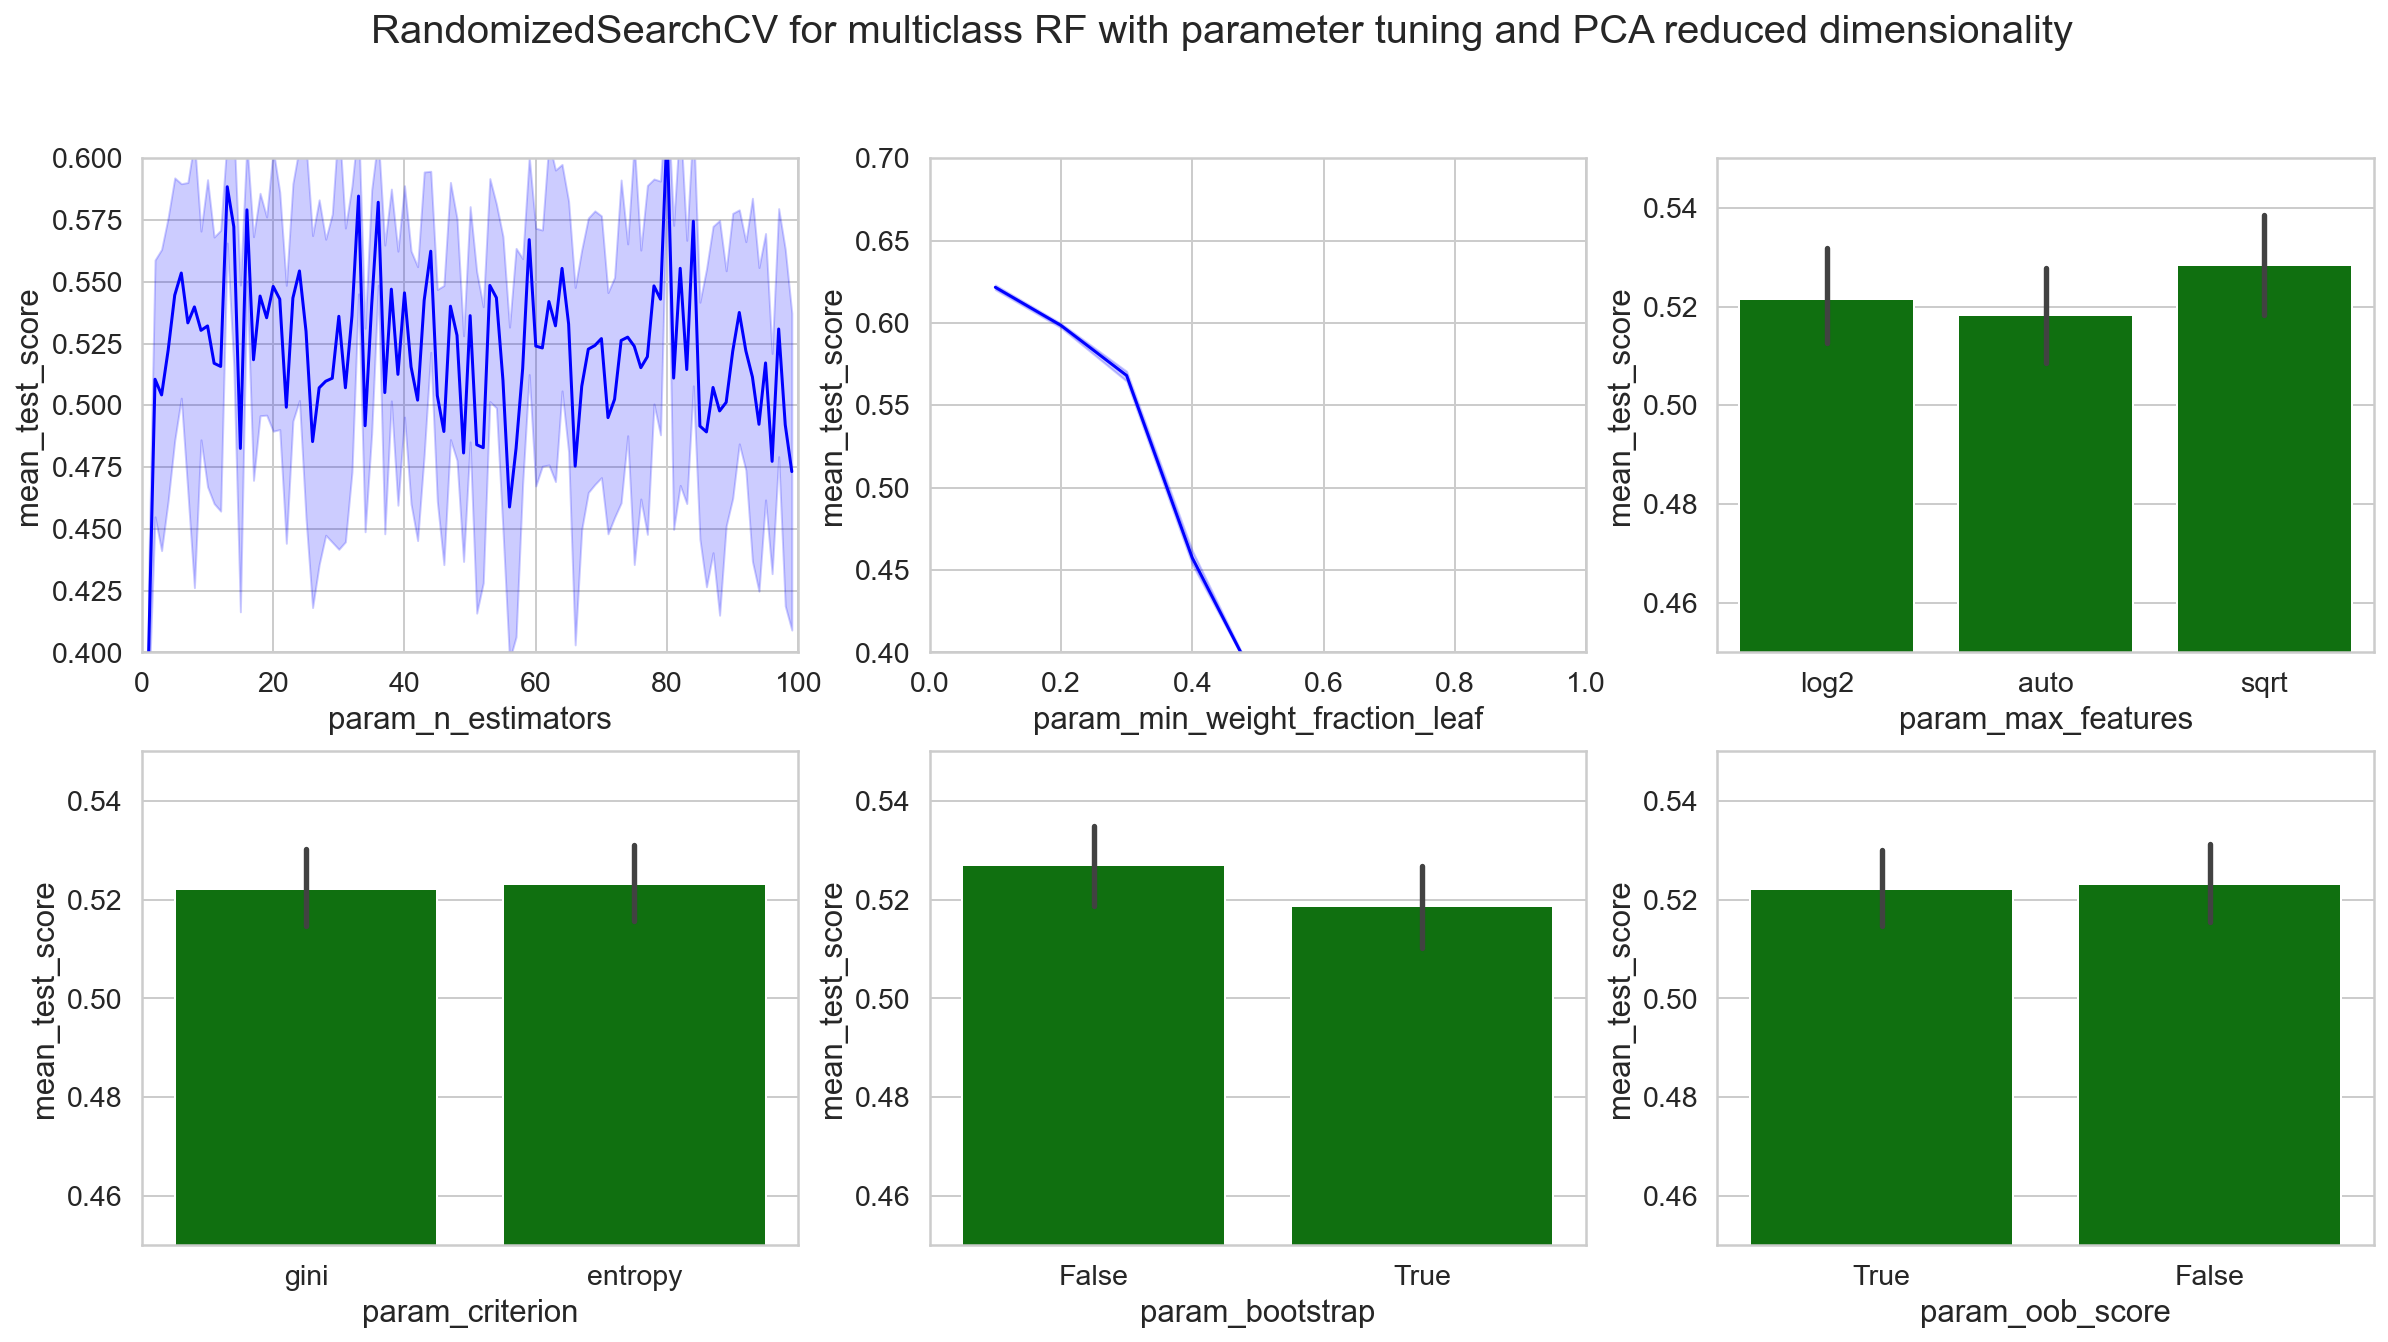

In [183]:
#Visualize results
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.3)
fig.set_size_inches(20,10)
fig.suptitle('RandomizedSearchCV for multiclass RF with parameter tuning and PCA reduced dimensionality', size = 20)

sns.lineplot(x = 'param_n_estimators', y = 'mean_test_score', data = randomsearch_rf_mul_pca_tune_df, ax = axs[0,0], color = 'blue')
axs[0,0].set_ylim([.40,.60])
axs[0,0].set_xlim([0, 100])

sns.lineplot(x = 'param_min_weight_fraction_leaf', y = 'mean_test_score', data = randomsearch_rf_mul_pca_tune_df, ax = axs[0,1], color='blue')
axs[0,1].set_ylim([.40, .70])
axs[0,1].set_xlim([0, 1])

sns.barplot(x = 'param_max_features', y = 'mean_test_score', data = randomsearch_rf_mul_pca_tune_df, ax = axs[0,2], color='green')
axs[0,2].set_ylim([.45, .55])

sns.barplot(x = 'param_criterion', y = 'mean_test_score', data = randomsearch_rf_mul_pca_tune_df, ax = axs[1,0], color = 'green')
axs[1,0].set_ylim([.45, .55])

sns.barplot(x = 'param_bootstrap', y = 'mean_test_score', data = randomsearch_rf_mul_pca_tune_df, ax = axs[1,1], color = 'green')
axs[1,1].set_ylim([.45, .55])

sns.barplot(x = 'param_oob_score', y = 'mean_test_score', data = randomsearch_rf_mul_pca_tune_df, ax = axs[1,2], color = 'green')
axs[1,2].set_ylim([.45, .55])

plt.savefig('rf_mul_pca_tune.png', bbox_inches = 'tight')
plt.show()

In [184]:
#GridSearchCV Set-up
#Calculation Time: 17sec
n_estimators = np.arange(70,90,1)
min_weight_fraction_leaf = [0.1,0.2]
max_features = ["sqrt"]
criterion = ["entropy"]
bootstrap = ["False"]
oob_score = ["False"]
rf_mul_pca_tune = RandomForestClassifier(random_state = random_state)
param_grid_rf_mul_pca_tune = {'n_estimators': n_estimators, 'criterion': criterion, 'min_weight_fraction_leaf': min_weight_fraction_leaf, 'max_features': max_features, 'bootstrap': bootstrap, 'oob_score': oob_score}
#Execute GridSearchCv
gridsearch_rf_mul_pca_tune = GridSearchCV(rf_mul_pca_tune, param_grid_rf_mul_pca_tune, cv = cv, verbose = 1, n_jobs = -1, scoring = 'recall_weighted').fit(x_trainval_resample_pca, y_trainval_resample_arr)
#Create new RandomForest estimator with best parameters found in GridSearchCV
rf_mul_pca_tune = gridsearch_rf_mul_pca_tune.best_estimator_
#Make predictions using the new rf estimator
y_pred_rf_mul_tune_pca = rf_mul_pca_tune.predict(x_test_mul_norm_pca)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   17.3s finished


### Performance Metrics: Random Forest for multiclass classification

In [185]:
#Confusion matrix:
conf_matrix_rf_mul_base = pd.DataFrame(confusion_matrix(y_test_mul, y_pred_rf_mul_base), index = ['actually healthy 0', 'actually ill 1', 'actually ill 2', 'actually ill 3', 'actually ill 4'], columns = ['predicted as healthy 0', 'predicted as ill 1', 'actually ill 2', 'actually ill 3', 'actually ill 4'])
conf_matrix_rf_mul_tune = pd.DataFrame(confusion_matrix(y_test_mul, y_pred_rf_mul_tune), index = ['actually healthy 0', 'actually ill 1', 'actually ill 2', 'actually ill 3', 'actually ill 4'], columns = ['predicted as healthy 0', 'predicted as ill 1', 'actually ill 2', 'actually ill 3', 'actually ill 4'])
conf_matrix_rf_mul_tune = pd.DataFrame(confusion_matrix(y_test_mul, y_pred_rf_mul_tune), index = ['actually healthy 0', 'actually ill 1', 'actually ill 2', 'actually ill 3', 'actually ill 4'], columns = ['predicted as healthy 0', 'predicted as ill 1', 'actually ill 2', 'actually ill 3', 'actually ill 4'])
conf_matrix_rf_mul_pca = pd.DataFrame(confusion_matrix(y_test_mul, y_pred_rf_mul_pca), index = ['actually healthy 0', 'actually ill 1', 'actually ill 2', 'actually ill 3', 'actually ill 4'], columns = ['predicted as healthy 0', 'predicted as ill 1', 'actually ill 2', 'actually ill 3', 'actually ill 4'])
conf_matrix_rf_mul_tune_pca = pd.DataFrame(confusion_matrix(y_test_mul, y_pred_rf_mul_tune_pca), index = ['actually healthy 0', 'actually ill 1', 'actually ill 2', 'actually ill 3', 'actually ill 4'], columns = ['predicted as healthy 0', 'predicted as ill 1', 'actually ill 2', 'actually ill 3', 'actually ill 4'])
#Classification report:
class_report_rf_mul_base = metrics.classification_report(y_test_mul, y_pred_rf_mul_base, zero_division = 0)
class_report_rf_mul_tune = metrics.classification_report(y_test_mul, y_pred_rf_mul_tune, zero_division = 0)
class_report_rf_mul_pca = metrics.classification_report(y_test_mul, y_pred_rf_mul_pca, zero_division = 0)
class_report_rf_mul_tune_pca = metrics.classification_report(y_test_mul, y_pred_rf_mul_tune_pca, zero_division = 0)
#Recall:
recall_rf_mul_base = metrics.recall_score(y_test_mul, y_pred_rf_mul_base, average = 'weighted')
recall_rf_mul_tune = metrics.recall_score(y_test_mul, y_pred_rf_mul_tune, average = 'weighted')
recall_rf_mul_pca = metrics.recall_score(y_test_mul, y_pred_rf_mul_pca, average = 'weighted')
recall_rf_mul_tune_pca = metrics.recall_score(y_test_mul, y_pred_rf_mul_tune_pca, average = 'weighted')
#Precision:
precision_rf_mul_base = metrics.precision_score(y_test_mul, y_pred_rf_mul_base, average = 'weighted', zero_division = 0)
precision_rf_mul_tune = metrics.precision_score(y_test_mul, y_pred_rf_mul_tune, average = 'weighted', zero_division = 0)
precision_rf_mul_pca = metrics.precision_score(y_test_mul, y_pred_rf_mul_pca, average = 'weighted', zero_division = 0)
precision_rf_mul_tune_pca = metrics.precision_score(y_test_mul, y_pred_rf_mul_tune_pca, average = 'weighted', zero_division = 0)
#Fscore:
fscore_rf_mul_base = metrics.f1_score(y_test_mul, y_pred_rf_mul_base, average = 'weighted')
fscore_rf_mul_tune = metrics.f1_score(y_test_mul, y_pred_rf_mul_tune, average = 'weighted')
fscore_rf_mul_pca = metrics.f1_score(y_test_mul, y_pred_rf_mul_pca, average = 'weighted')
fscore_rf_mul_tune_pca = metrics.f1_score(y_test_mul, y_pred_rf_mul_tune_pca, average = 'weighted')

In [186]:
print("Recall Score:")
print("Baseline Random Forest: {:.2f}%".format(recall_rf_mul_base*100))
print("Baseline Random Forest and PCA reduced dimensionality: {:.2f}%".format(recall_rf_mul_pca*100))
print("Random Forest with parameter tuning: {:.2f}%".format(recall_rf_mul_tune*100))
print("Random Forest with parameter tuning and PCA reduced dimensionality: {:.2f}%".format(recall_rf_mul_tune_pca*100))

Recall Score:
Baseline Random Forest: 55.56%
Baseline Random Forest and PCA reduced dimensionality: 51.11%
Random Forest with parameter tuning: 56.67%
Random Forest with parameter tuning and PCA reduced dimensionality: 56.67%


In [187]:
print("Confusion Matrix:")
print("Baseline Random Forest:")
display(conf_matrix_rf_mul_base)
print(class_report_rf_mul_base)
print("Baseline Random Forest and PCA reduced dimensionality:")
display(conf_matrix_rf_mul_pca)
print(class_report_rf_mul_pca)
print("Random Forest with parameter tuning:")
display(conf_matrix_rf_mul_tune)
print(class_report_rf_mul_tune)
print("Random Forest with parameter tuning and PCA reduced dimensionality:")
display(conf_matrix_rf_mul_tune_pca)
print(class_report_rf_mul_tune_pca)

Confusion Matrix:
Baseline Random Forest:


,predicted as healthy 0,predicted as ill 1,actually ill 2,actually ill 3,actually ill 4
actually healthy 0,41,7,0,0,0
actually ill 1,4,3,5,4,0
actually ill 2,4,0,4,2,1
actually ill 3,4,3,3,1,0
actually ill 4,0,2,1,0,1


              precision    recall  f1-score   support

           0       0.77      0.85      0.81        48
           1       0.20      0.19      0.19        16
           2       0.31      0.36      0.33        11
           3       0.14      0.09      0.11        11
           4       0.50      0.25      0.33         4

    accuracy                           0.56        90
   macro avg       0.38      0.35      0.36        90
weighted avg       0.53      0.56      0.54        90

Baseline Random Forest and PCA reduced dimensionality:


,predicted as healthy 0,predicted as ill 1,actually ill 2,actually ill 3,actually ill 4
actually healthy 0,38,9,1,0,0
actually ill 1,2,4,4,6,0
actually ill 2,5,0,1,4,1
actually ill 3,3,1,4,3,0
actually ill 4,0,2,1,1,0


              precision    recall  f1-score   support

           0       0.79      0.79      0.79        48
           1       0.25      0.25      0.25        16
           2       0.09      0.09      0.09        11
           3       0.21      0.27      0.24        11
           4       0.00      0.00      0.00         4

    accuracy                           0.51        90
   macro avg       0.27      0.28      0.27        90
weighted avg       0.50      0.51      0.51        90

Random Forest with parameter tuning:


,predicted as healthy 0,predicted as ill 1,actually ill 2,actually ill 3,actually ill 4
actually healthy 0,48,0,0,0,0
actually ill 1,10,0,2,3,1
actually ill 2,4,0,0,4,3
actually ill 3,7,0,2,2,0
actually ill 4,1,0,1,1,1


              precision    recall  f1-score   support

           0       0.69      1.00      0.81        48
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        11
           3       0.20      0.18      0.19        11
           4       0.20      0.25      0.22         4

    accuracy                           0.57        90
   macro avg       0.22      0.29      0.25        90
weighted avg       0.40      0.57      0.47        90

Random Forest with parameter tuning and PCA reduced dimensionality:


,predicted as healthy 0,predicted as ill 1,actually ill 2,actually ill 3,actually ill 4
actually healthy 0,48,0,0,0,0
actually ill 1,10,0,1,5,0
actually ill 2,6,0,0,4,1
actually ill 3,6,0,1,3,1
actually ill 4,0,0,0,4,0


              precision    recall  f1-score   support

           0       0.69      1.00      0.81        48
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        11
           3       0.19      0.27      0.22        11
           4       0.00      0.00      0.00         4

    accuracy                           0.57        90
   macro avg       0.17      0.25      0.21        90
weighted avg       0.39      0.57      0.46        90



In [78]:
print("Classification Report:")
print("Baseline Random Forest:")
print(class_report_rf_mul_base)
print("Baseline Random Forest and PCA reduced dimensionality:")
print(class_report_rf_mul_pca)
print("Random Forest with parameter tuning:")
print(class_report_rf_mul_tune)
print("Random Forest with parameter tuning and PCA reduced dimensionality:")
print(class_report_rf_mul_tune_pca)

Classification Report:
Baseline Random Forest:
              precision    recall  f1-score   support

           0       0.81      0.73      0.77        48
           1       0.17      0.25      0.20        16
           2       0.23      0.27      0.25        11
           3       0.17      0.09      0.12        11
           4       0.25      0.25      0.25         4

    accuracy                           0.49        90
   macro avg       0.33      0.32      0.32        90
weighted avg       0.52      0.49      0.50        90

Baseline Random Forest and PCA reduced dimensionality:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        48
           1       0.19      0.19      0.19        16
           2       0.08      0.09      0.09        11
           3       0.21      0.27      0.24        11
           4       0.00      0.00      0.00         4

    accuracy                           0.50        90
   macro avg       0.26      